# Fiducial model exploration

In [1]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd
import seaborn as sns

from importlib import reload

In [2]:
import sys
sys.path.append("../src")
import plotting

In [3]:
import h5py as h5

In [4]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Grab the data

In [5]:
%%time
p = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/feedback-variations/fiducial.h5")

CPU times: user 4.26 s, sys: 1.86 s, total: 6.12 s
Wall time: 15.2 s


In [6]:
%%time
plotting.set_sn_subpop_masks(p);

16426 283504 182812 378076
CPU times: user 3.23 s, sys: 606 ms, total: 3.84 s
Wall time: 3.75 s


In [7]:
f = np.load("/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-fiducial.npz")
p.primary_sn_distances, p.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [99]:
%%time
q = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/feedback-variations/ce-10.0.h5")

CPU times: user 3.88 s, sys: 1.81 s, total: 5.69 s
Wall time: 17.8 s


In [100]:
%%time
plotting.set_sn_subpop_masks(q);

16358 314403 231198 179955
CPU times: user 3.14 s, sys: 495 ms, total: 3.64 s
Wall time: 3.56 s


In [101]:
f = np.load("/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-ce-10.0.npz")
q.primary_sn_distances, q.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [9]:
%%time
singles = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/feedback-variations/singles.h5")

CPU times: user 3.42 s, sys: 2.52 s, total: 5.94 s
Wall time: 17.2 s


In [10]:
plotting.set_sn_subpop_masks(singles);

779102 0 0 0


In [11]:
f = np.load("/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-singles.npz")
singles.primary_sn_distances, singles.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc
singles.primary_sn_locs, singles.secondary_sn_locs = f["arr_2"] * u.kpc, f["arr_3"] * u.kpc

In [12]:
singles_sn_times = plotting.get_data_and_weights(singles, "time", [1])[0][-1]
singles_sn_dists = plotting.get_data_and_weights(singles, "distance", [1])[0][-1]

In [13]:
len(singles.secondary_sn_locs)

248816

# Distances

In [52]:
dists = plotting.get_data_and_weights(p, "distance", [])[0]

In [34]:
for i in range(len(dists)):
    print(plotting.labels[i], np.percentile(dists[i], [5, 50, 90]), (dists[i] > 100).sum() / len(dists[i]), (dists[i] > 500).sum() / len(dists[i]))

Merger Product [  8.92507866  48.55539303 127.23294702] 0.17242399784772666 0.0006994888350820554
Secondary [  9.60067257  53.04280702 212.6354094 ] 0.25453226976069615 0.04122273665420874
Primary [ 4.56493391 17.67664494 48.1367998 ] 0.004409585426681606 7.228828568330503e-05
Effectively Single [ 3.91828312 15.17129542 55.56848839] 0.007859733978234583 0.0


In [54]:
(np.concatenate(dists) > 100).sum() / len(np.concatenate(dists))

0.1318841877871138

In [55]:
sn_rows = p.bpp[((p.bpp["evol_type"] == 15) | (p.bpp["evol_type"] == 16)) & ~p.bpp["bin_num"].isin(p.duplicate_sn)]
    
primary_sn_rows = sn_rows[sn_rows["evol_type"] == 15]
secondary_sn_rows = sn_rows[sn_rows["evol_type"] == 16]

In [56]:
(secondary_sn_rows["kstar_2"].isin([7,8,9]) & p.sn_1).sum()

95718

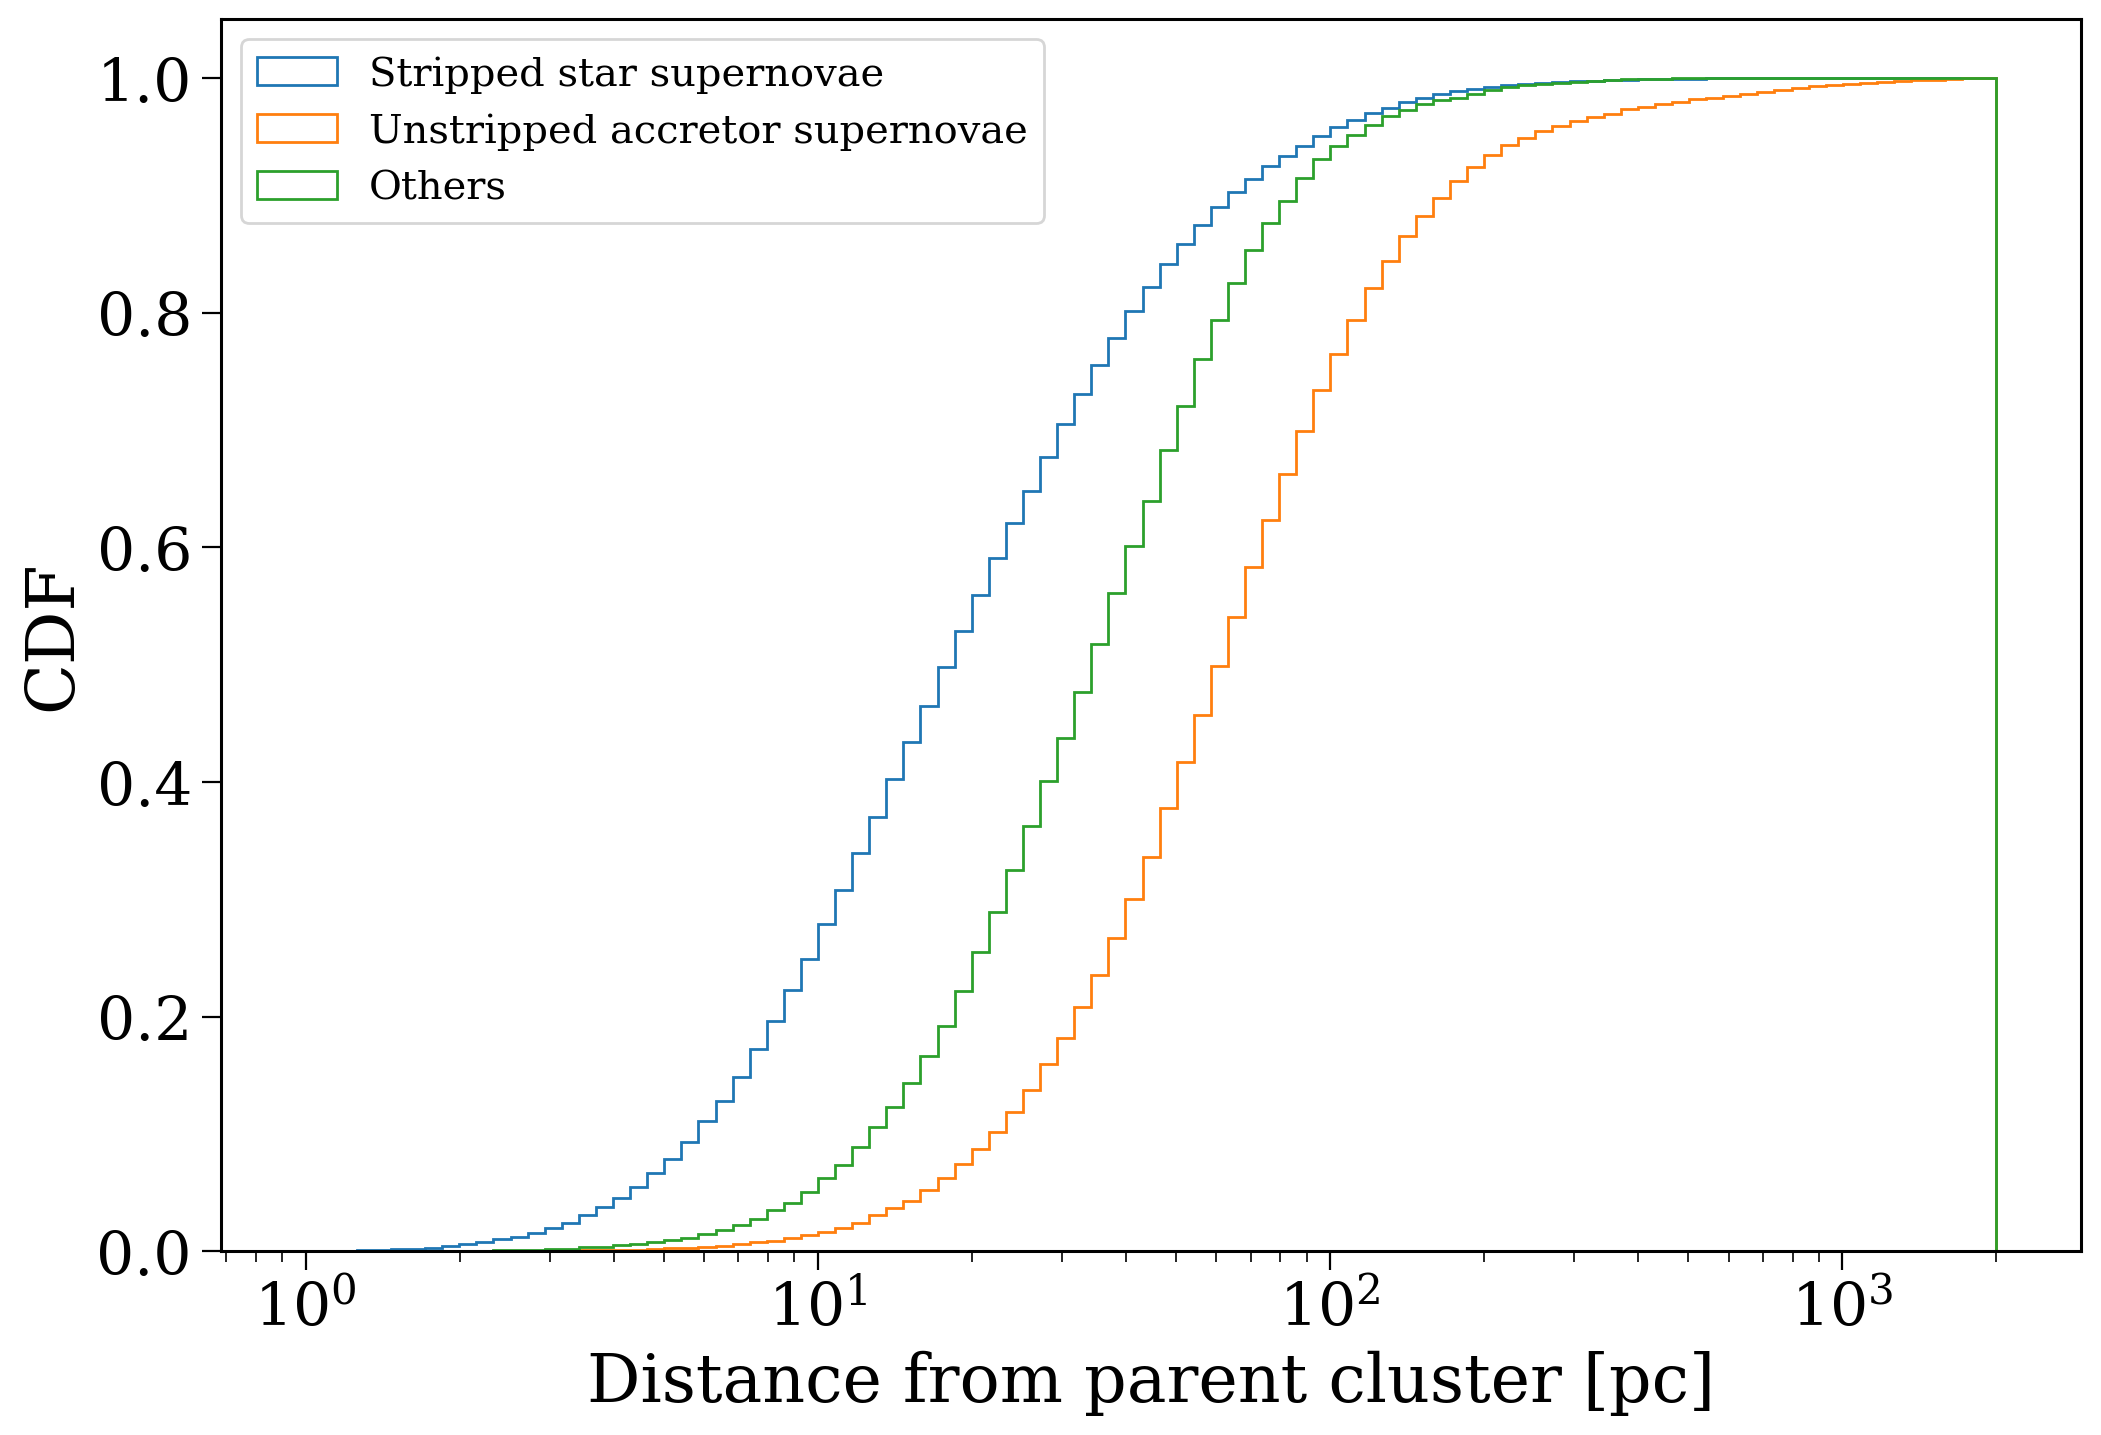

In [50]:
x = np.concatenate((p.primary_sn_distances[primary_sn_rows["kstar_1"].isin([7,8,9])].to(u.pc).value,
                         p.secondary_sn_distances[secondary_sn_rows["kstar_1"].isin([7,8,9])
                                                  | secondary_sn_rows["kstar_2"].isin([7,8,9])].to(u.pc).value))
y = p.secondary_sn_distances[~secondary_sn_rows["kstar_1"].isin([7,8,9]) & ~secondary_sn_rows["kstar_2"].isin([7,8,9])].to(u.pc).value
z = p.primary_sn_distances[~(primary_sn_rows["kstar_1"].isin([7,8,9]))].to(u.pc).value

plt.hist(x,
         cumulative=True, bins=np.geomspace(1e0, 2e3, 100), histtype="step", density=True, label="Stripped star supernovae");
plt.hist(y, 
         cumulative=True, bins=np.geomspace(1e0, 2e3, 100), histtype="step", density=True, label="Unstripped accretor supernovae");
plt.hist(z,
         cumulative=True, bins=np.geomspace(1e0, 2e3, 100), histtype="step", density=True, label="Others");
plt.xscale("log")

plt.legend(loc="upper left", fontsize=0.6*fs)

plt.xlabel("Distance from parent cluster [pc]")
plt.ylabel("CDF")
plt.show()

In [57]:
print(len(x) / 51573, len(y) / 51573, len(z) / 51573)

0.45145715781513585 0.37151222538925405 0.18052081515521687


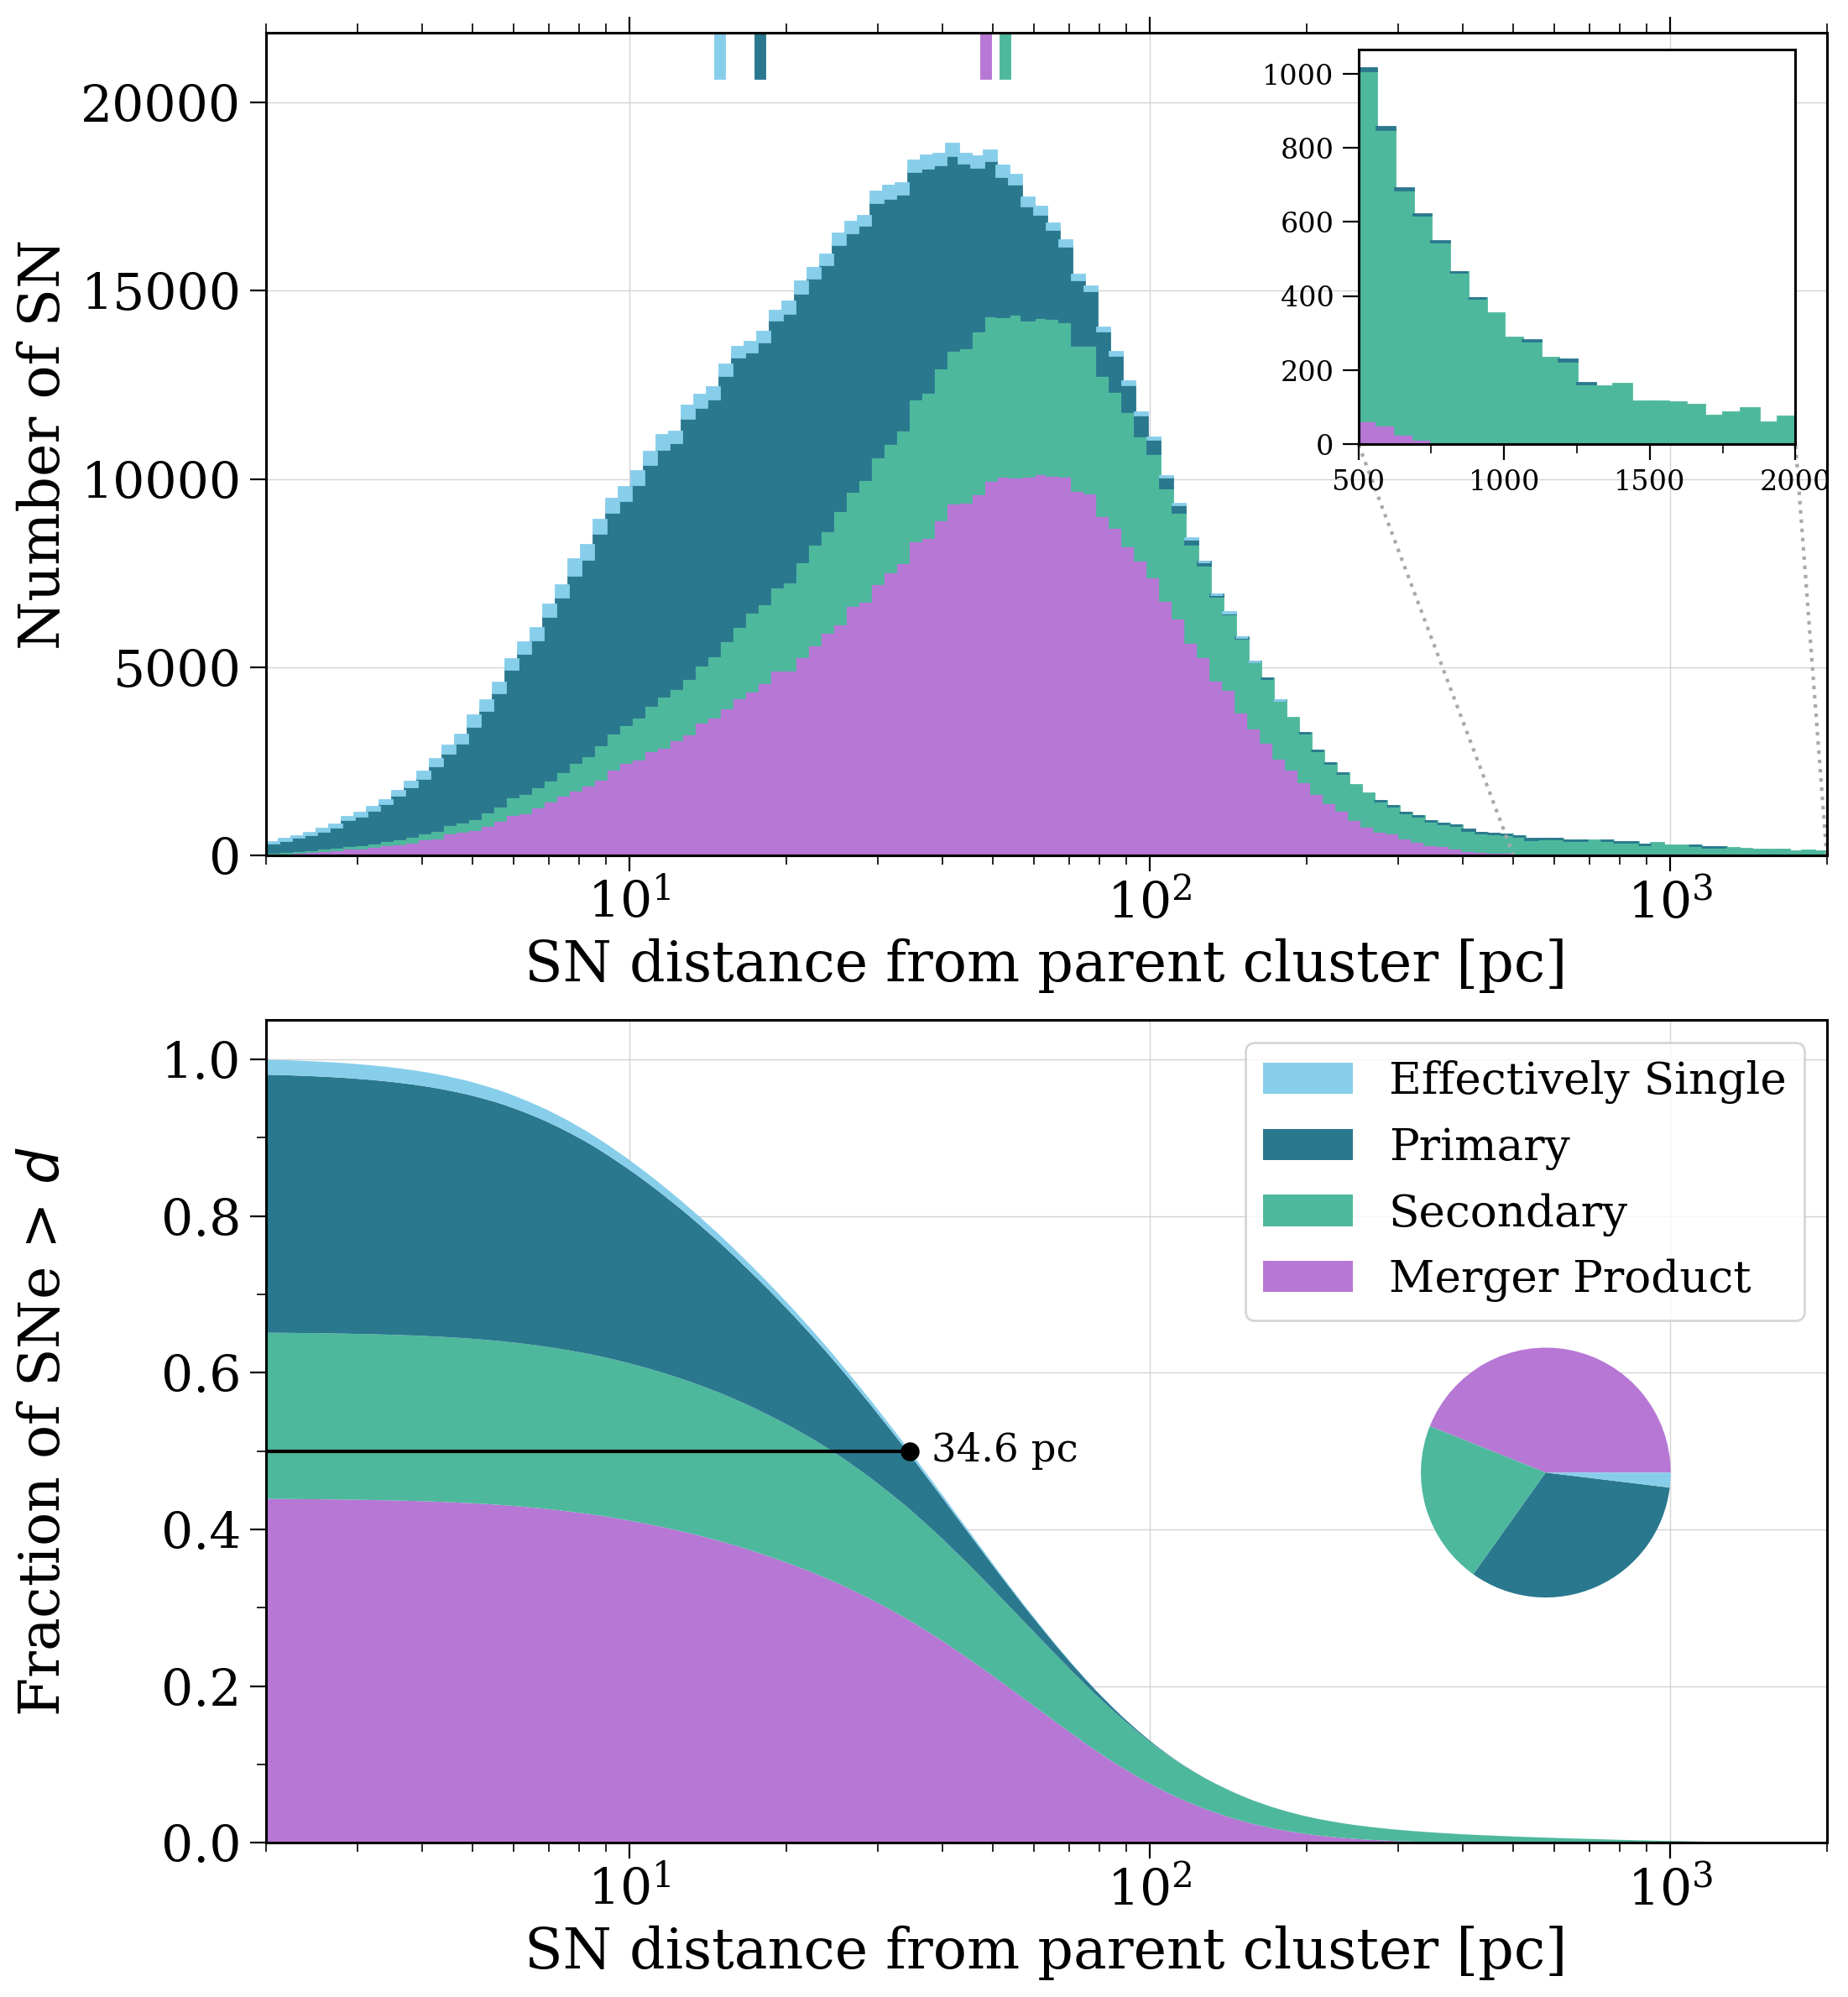

(<Figure size 1200x1400 with 3 Axes>,
 array([<Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Number of SN'>,
        <Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Fraction of SNe > $d$'>],
       dtype=object))

In [61]:
##### reload(plotting)
plotting.sandpile(p, bins=np.geomspace(2e0, 2e3, 125), inset_n_bins=25, save_path="../plots/sn_dists_fiducial.pdf")

## What if we hadn't used a galactic potential

In [460]:
# get everything that disrupted and had two SN
dis_nums = p.bin_nums[p.disrupted]
dis_nums = dis_nums[np.isin(dis_nums, p.sn_1[p.sn_1].index)
                    & np.isin(dis_nums, p.sn_2[p.sn_2].index)]

# find the ejection velocity and time
v_ej = p.kick_info[p.kick_info["star"] == 1]["vsys_2_total"].loc[dis_nums]
t_ej = p.bpp[p.bpp["evol_type"] == 15]["tphys"].loc[dis_nums]
t_SN = p.bpp[p.bpp["evol_type"] == 16]["tphys"].loc[dis_nums]

mask = v_ej > 0
dis_nums = dis_nums[mask]

# find the SN time
analytic_dist = v_ej * (t_SN - t_ej)
analytic_dist = (analytic_dist[mask].values * u.km / u.s * u.Myr).to(u.pc)

real_dist = p.secondary_sn_distances[p.sn_2 & np.isin(p.sn_2.index, dis_nums)].to(u.pc)
diff = analytic_dist.value - real_dist.value

In [420]:
from scipy.stats import cauchy, norm

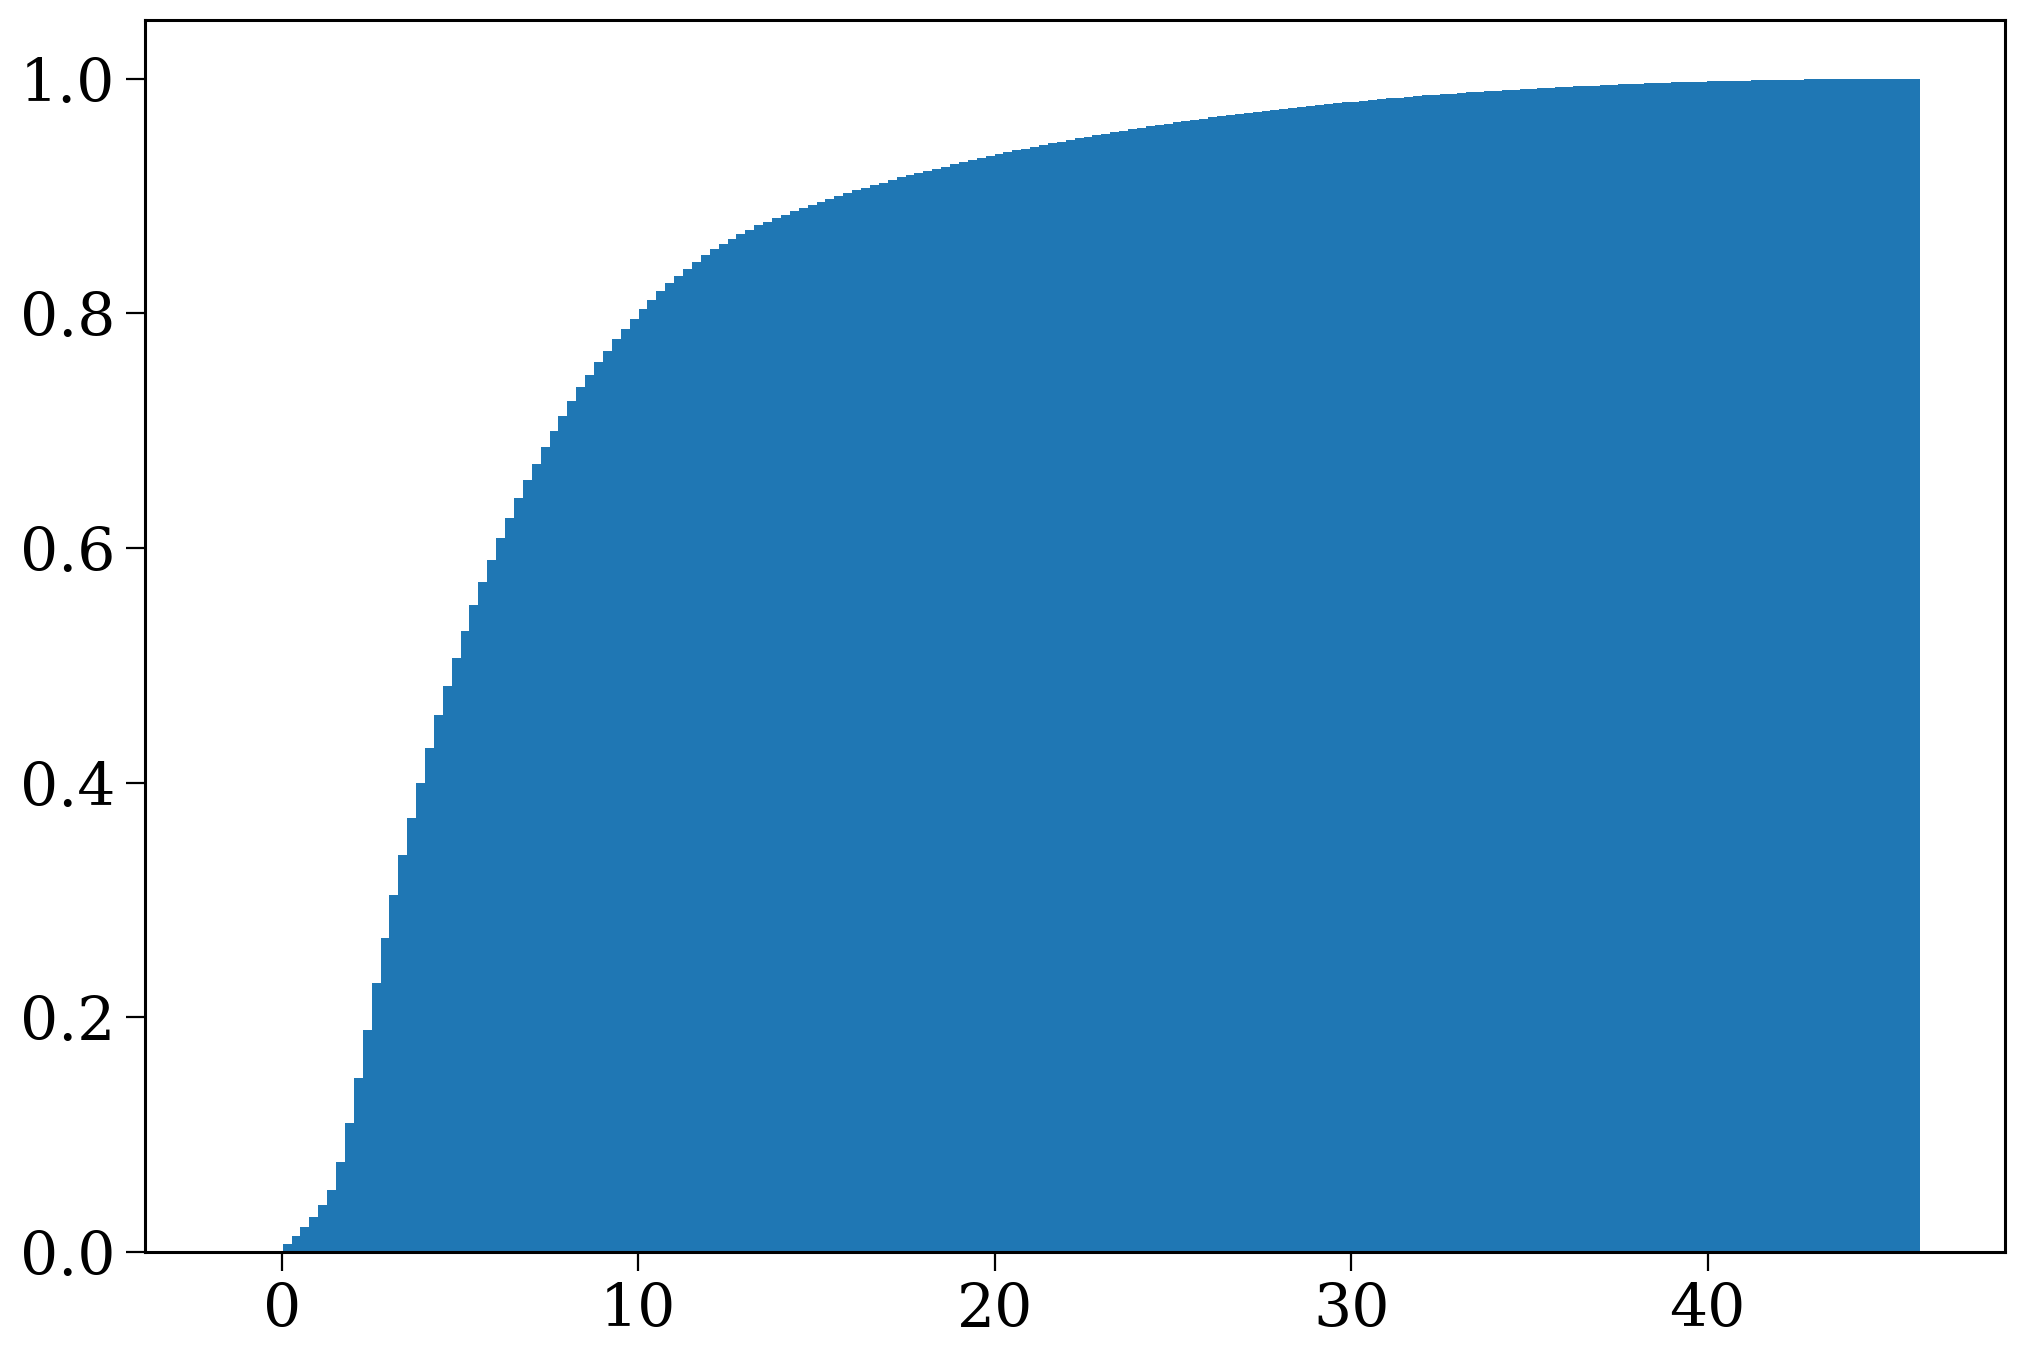

In [531]:
plt.hist((t_SN - t_ej)[mask], bins="fd", cumulative=True, density=True)
plt.show()

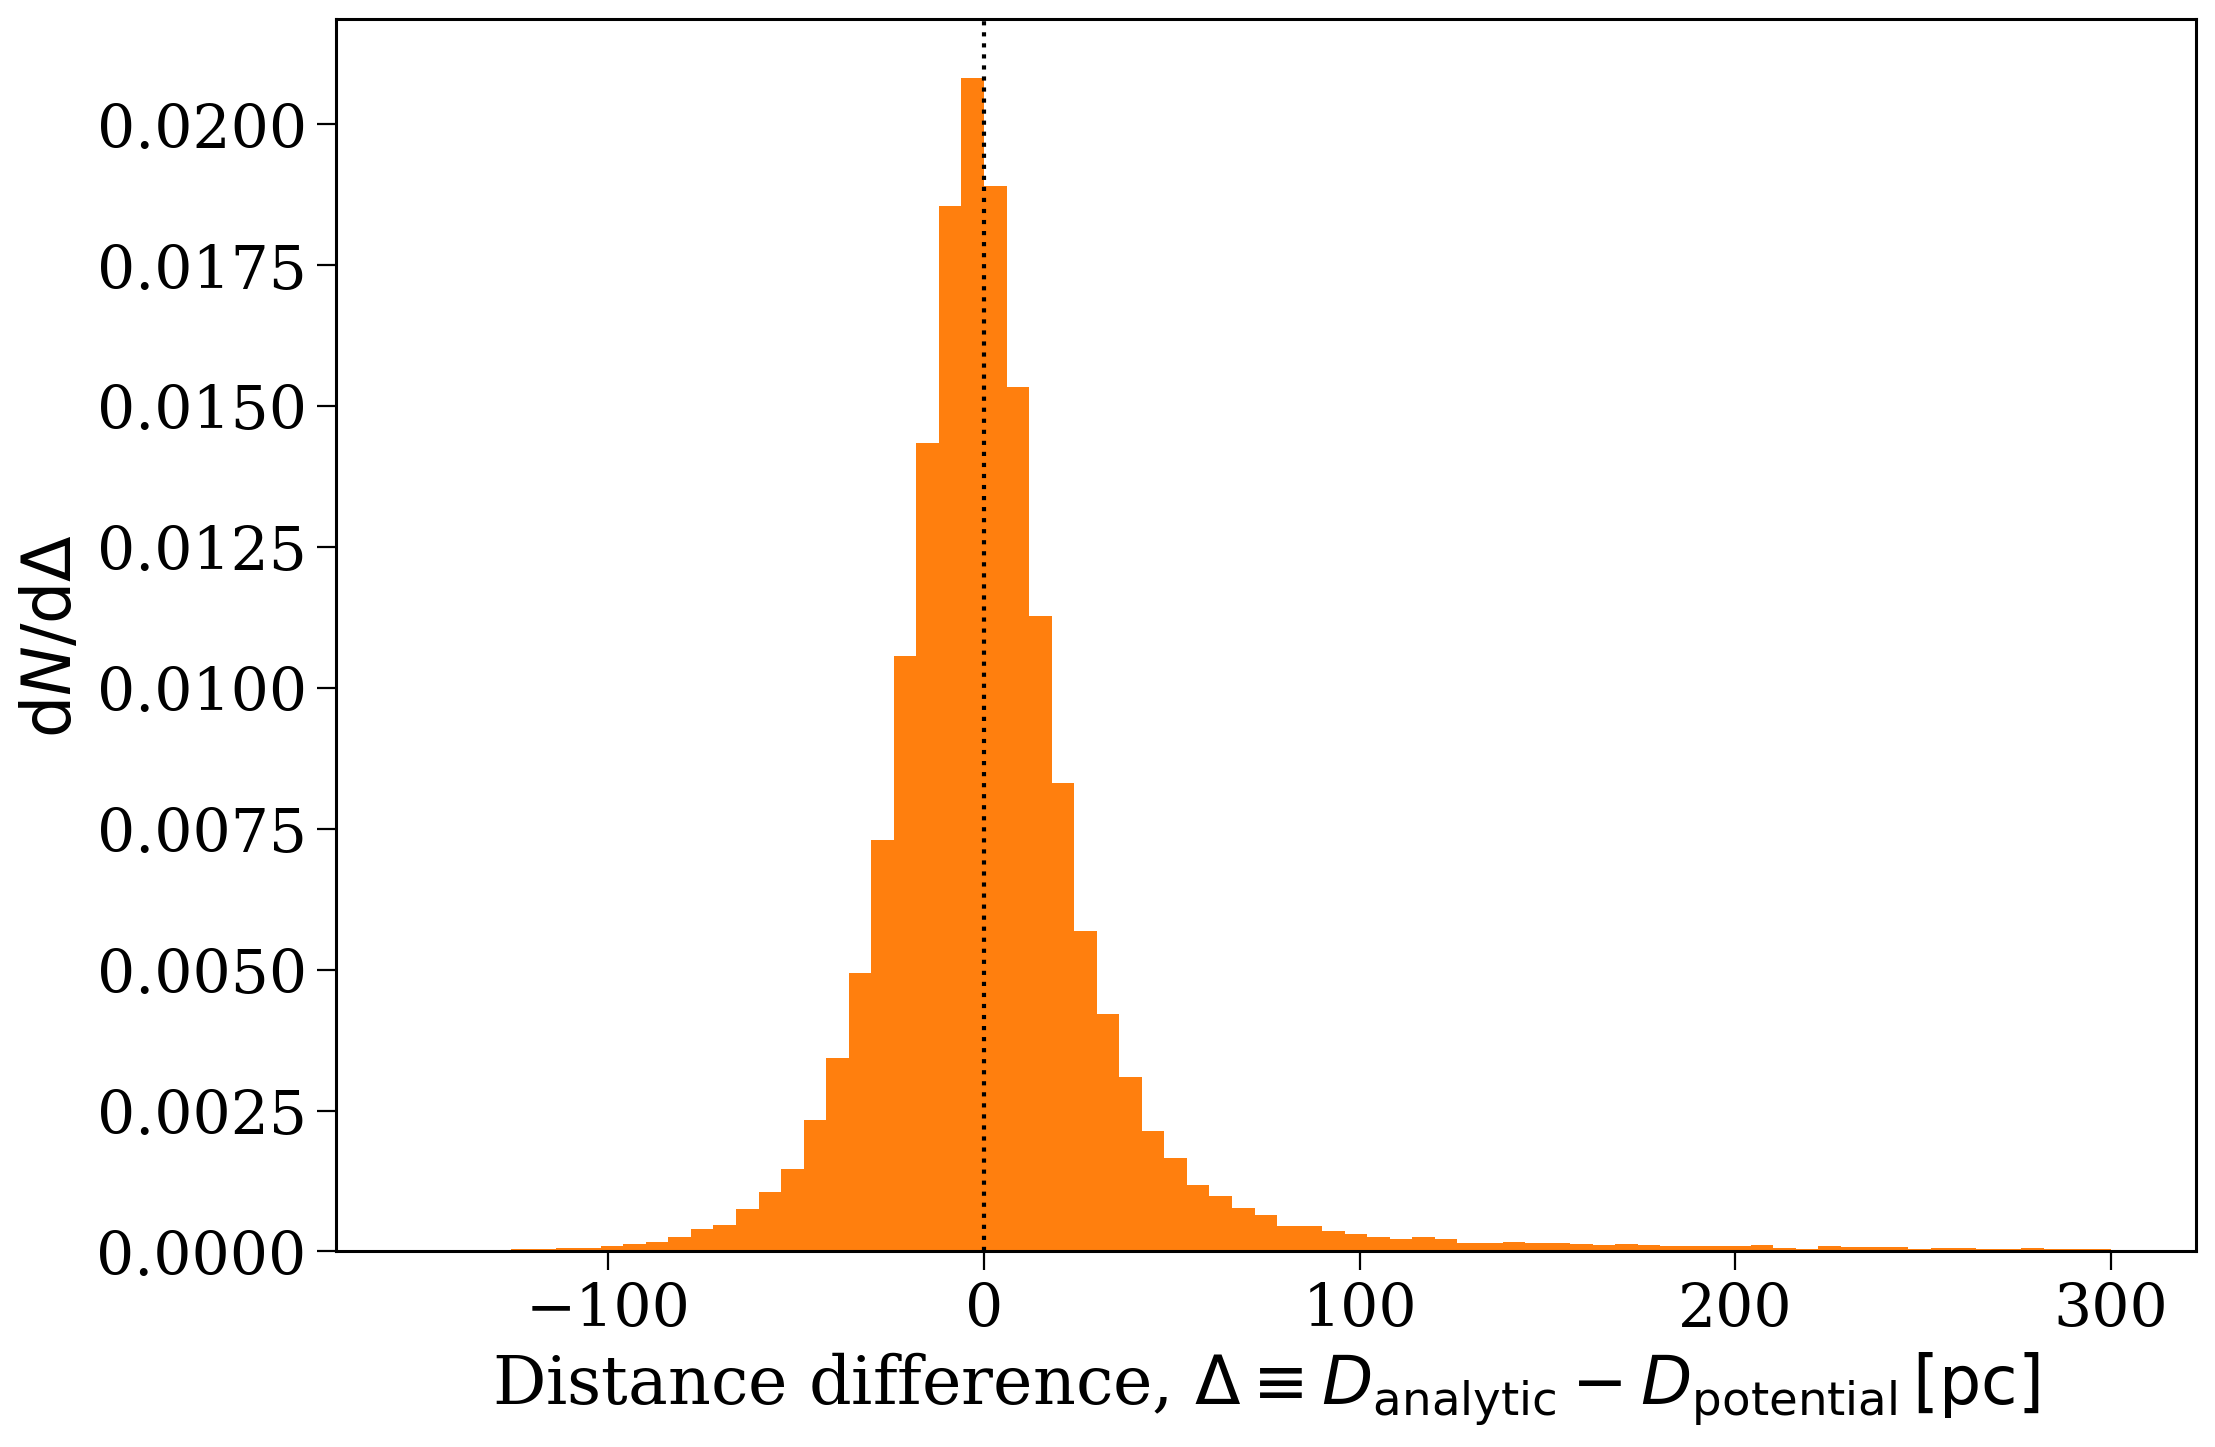

In [481]:
fig, ax = plt.subplots()

bins = np.linspace(-150, 300, 76)
x_range = np.linspace(min(bins), max(bins), 1000)

ax.hist(diff, bins=bins, density=True, color="tab:orange")
ax.axvline(0.0, color='k', linestyle="dotted")
# ax.axvline(-5, color='k')

# ax.plot(x_range, cauchy(loc=0, scale=12).pdf(x_range), label="Cauchy(-5, 10.5)", color="k")

ax.set(xlabel=r"Distance difference, $\Delta \equiv D_{\rm analytic} - D_{\rm potential} \, [\rm pc]$",
       ylabel=r"$\mathrm{d}N/\mathrm{d}\Delta$")

# ax.legend()

plt.show()

In [501]:
np.sort(abs(diff))[int(len(diff) * 0.68)], np.sort(abs(diff))[int(len(diff) * 0.90)], np.sort(abs(diff))[int(len(diff) * 0.975)]

(22.677959769937218, 48.4598123664758, 130.25087490112764)

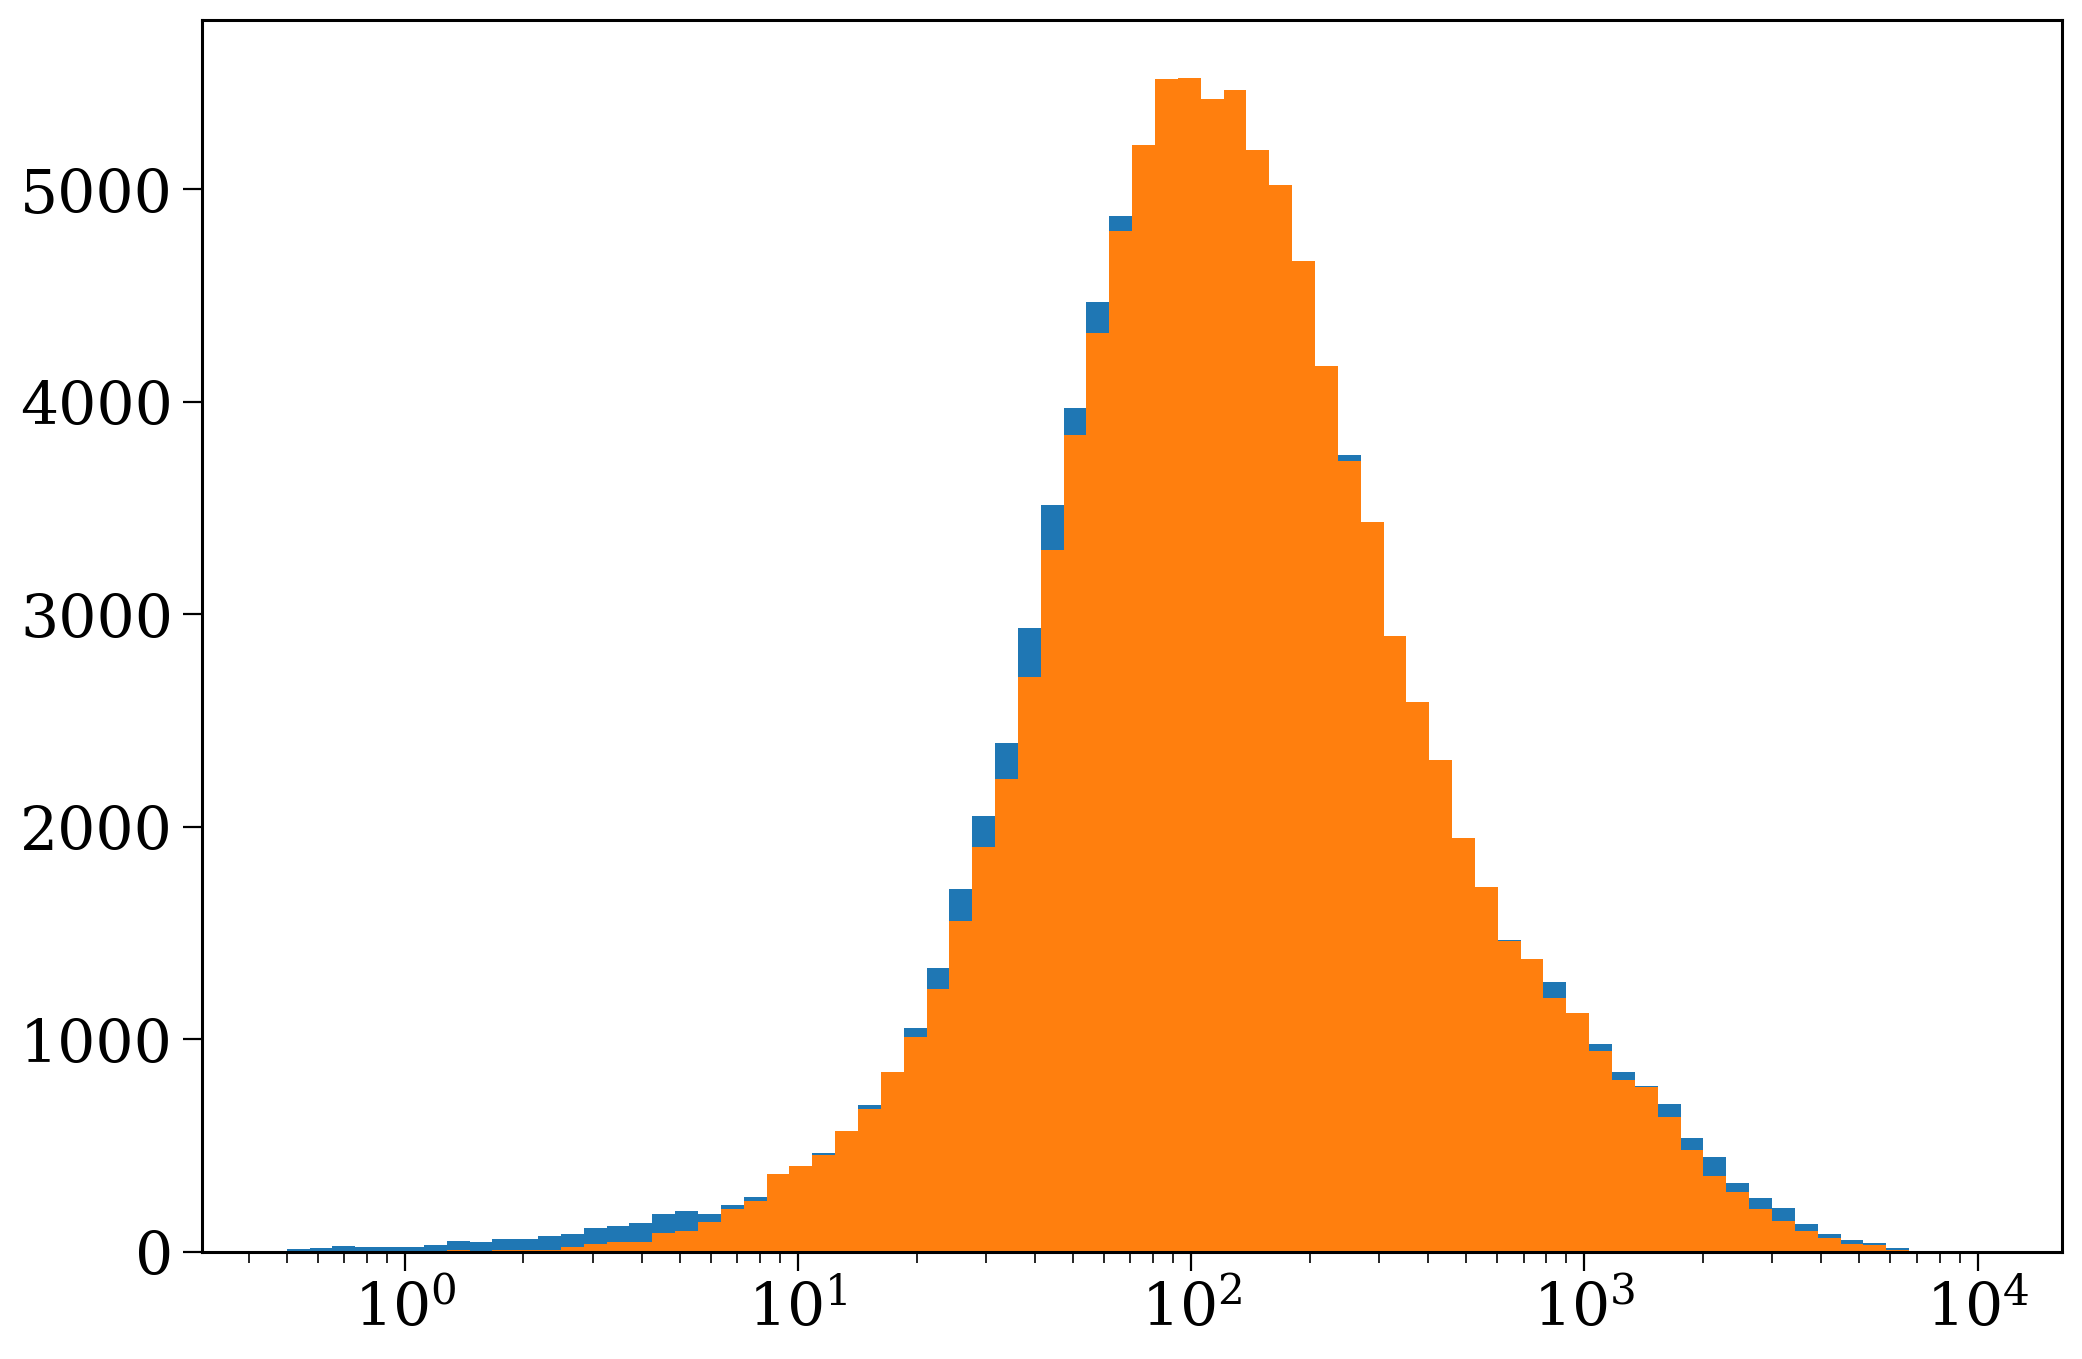

In [502]:
for d in [analytic_dist, p.secondary_sn_distances[p.sn_2 & np.isin(p.sn_2.index, dis_nums)]]:
    plt.hist(d.to(u.pc).value, bins=np.geomspace(5e-1, 1e4, 75))
plt.xscale("log")

# Ejecta mass

In [132]:
dists, ejecta = plotting.get_data_and_weights(p, "ejecta_mass", [1])
all_dists, all_ejecta = np.concatenate(dists), np.concatenate(ejecta)

In [138]:
"Fraction of primary star progenitors", sum(ejecta[2]) / sum(all_ejecta)

('Fraction of primary star progenitors', 0.2507961391996258)

In [139]:
"Fraction far", sum(all_ejecta[all_dists > 100]) / sum(all_ejecta)

('Fraction far', 0.14562466555273185)

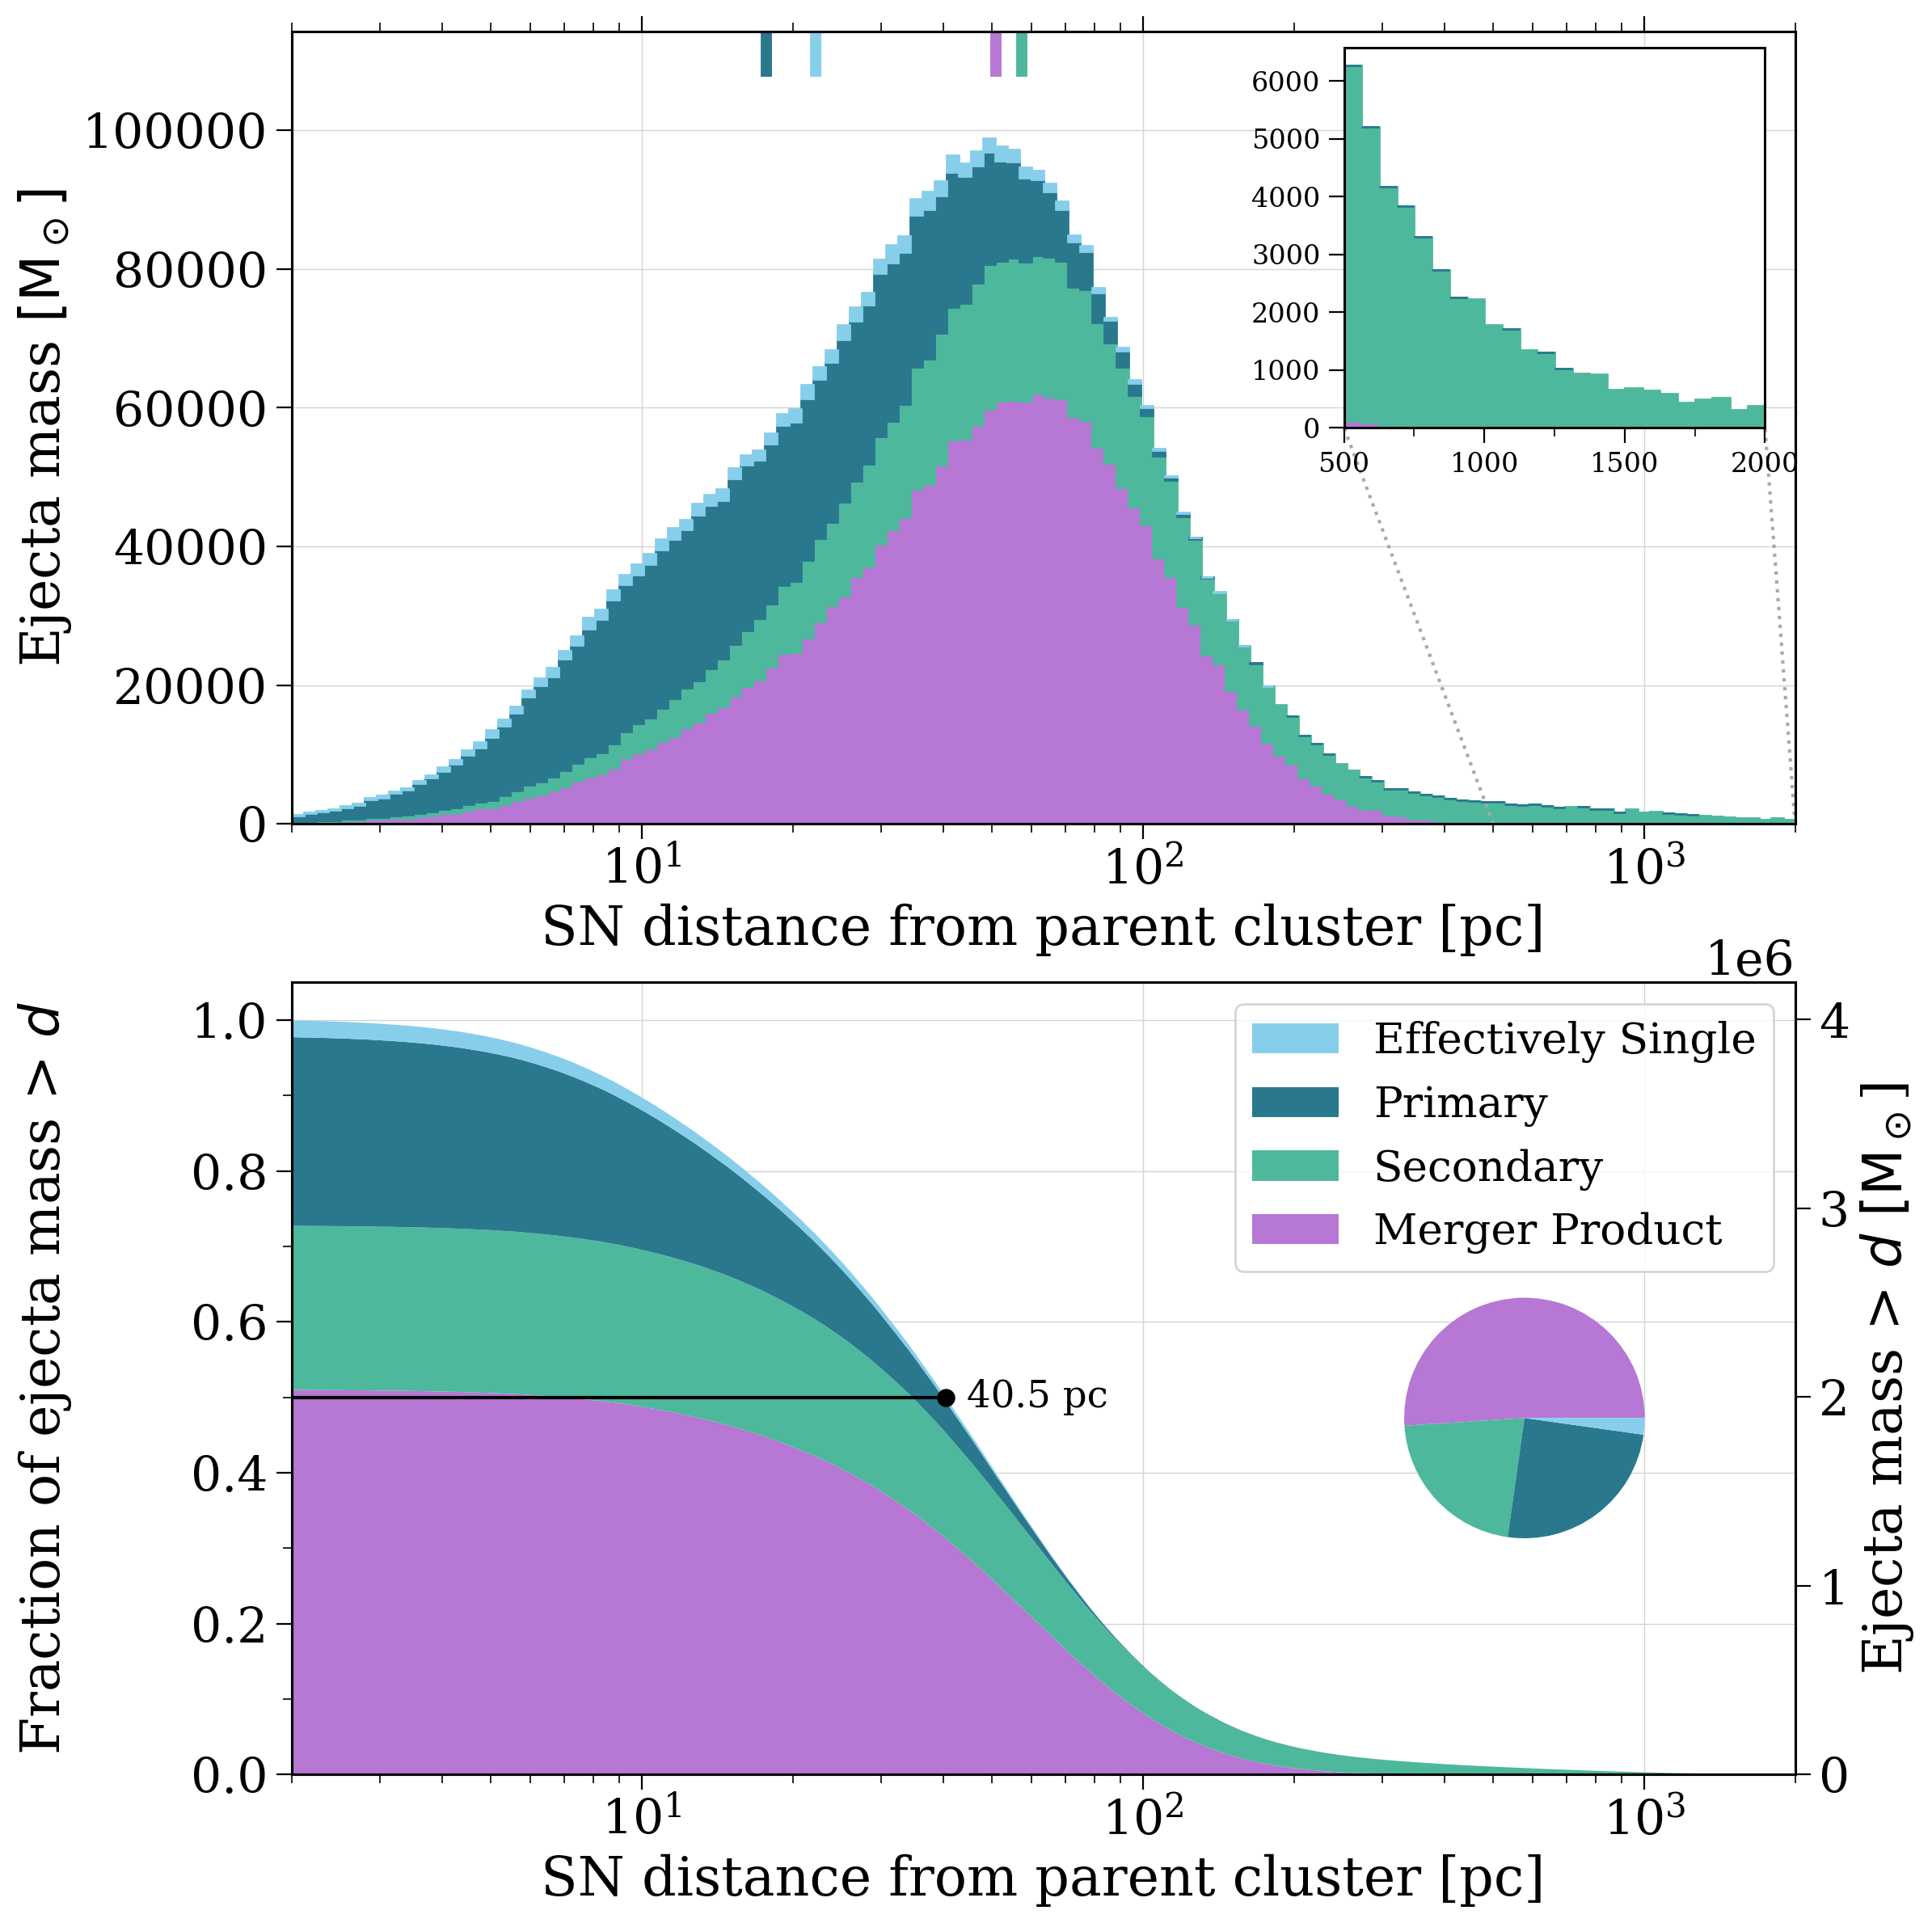

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Ejecta mass $[\\rm M_\\odot]$'>,
        <Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Fraction of ejecta mass > $d$'>],
       dtype=object))

In [78]:
reload(plotting)
plotting.sandpile(p, bins=np.geomspace(2e0, 2e3, 125), inset_n_bins=25,
                  var="ejecta_mass", save_path="../plots/sn_ejecta_fiducial.pdf")

### Heavily-processed ejecta

In [141]:
dists, ejecta = plotting.get_data_and_weights(p, "ejecta_mass", [1], ejecta_mass_col="massc")
all_dists, all_ejecta = np.concatenate(dists), np.concatenate(ejecta)

In [145]:
"Fraction of secondary/MP progenitors", (sum(ejecta[0]) + sum(ejecta[1])) / sum(all_ejecta)

('Fraction of secondary/MP progenitors', 0.9659327250419005)

In [146]:
"Fraction far", sum(all_ejecta[all_dists > 100]) / sum(all_ejecta)

('Fraction far', 0.15308158544157546)

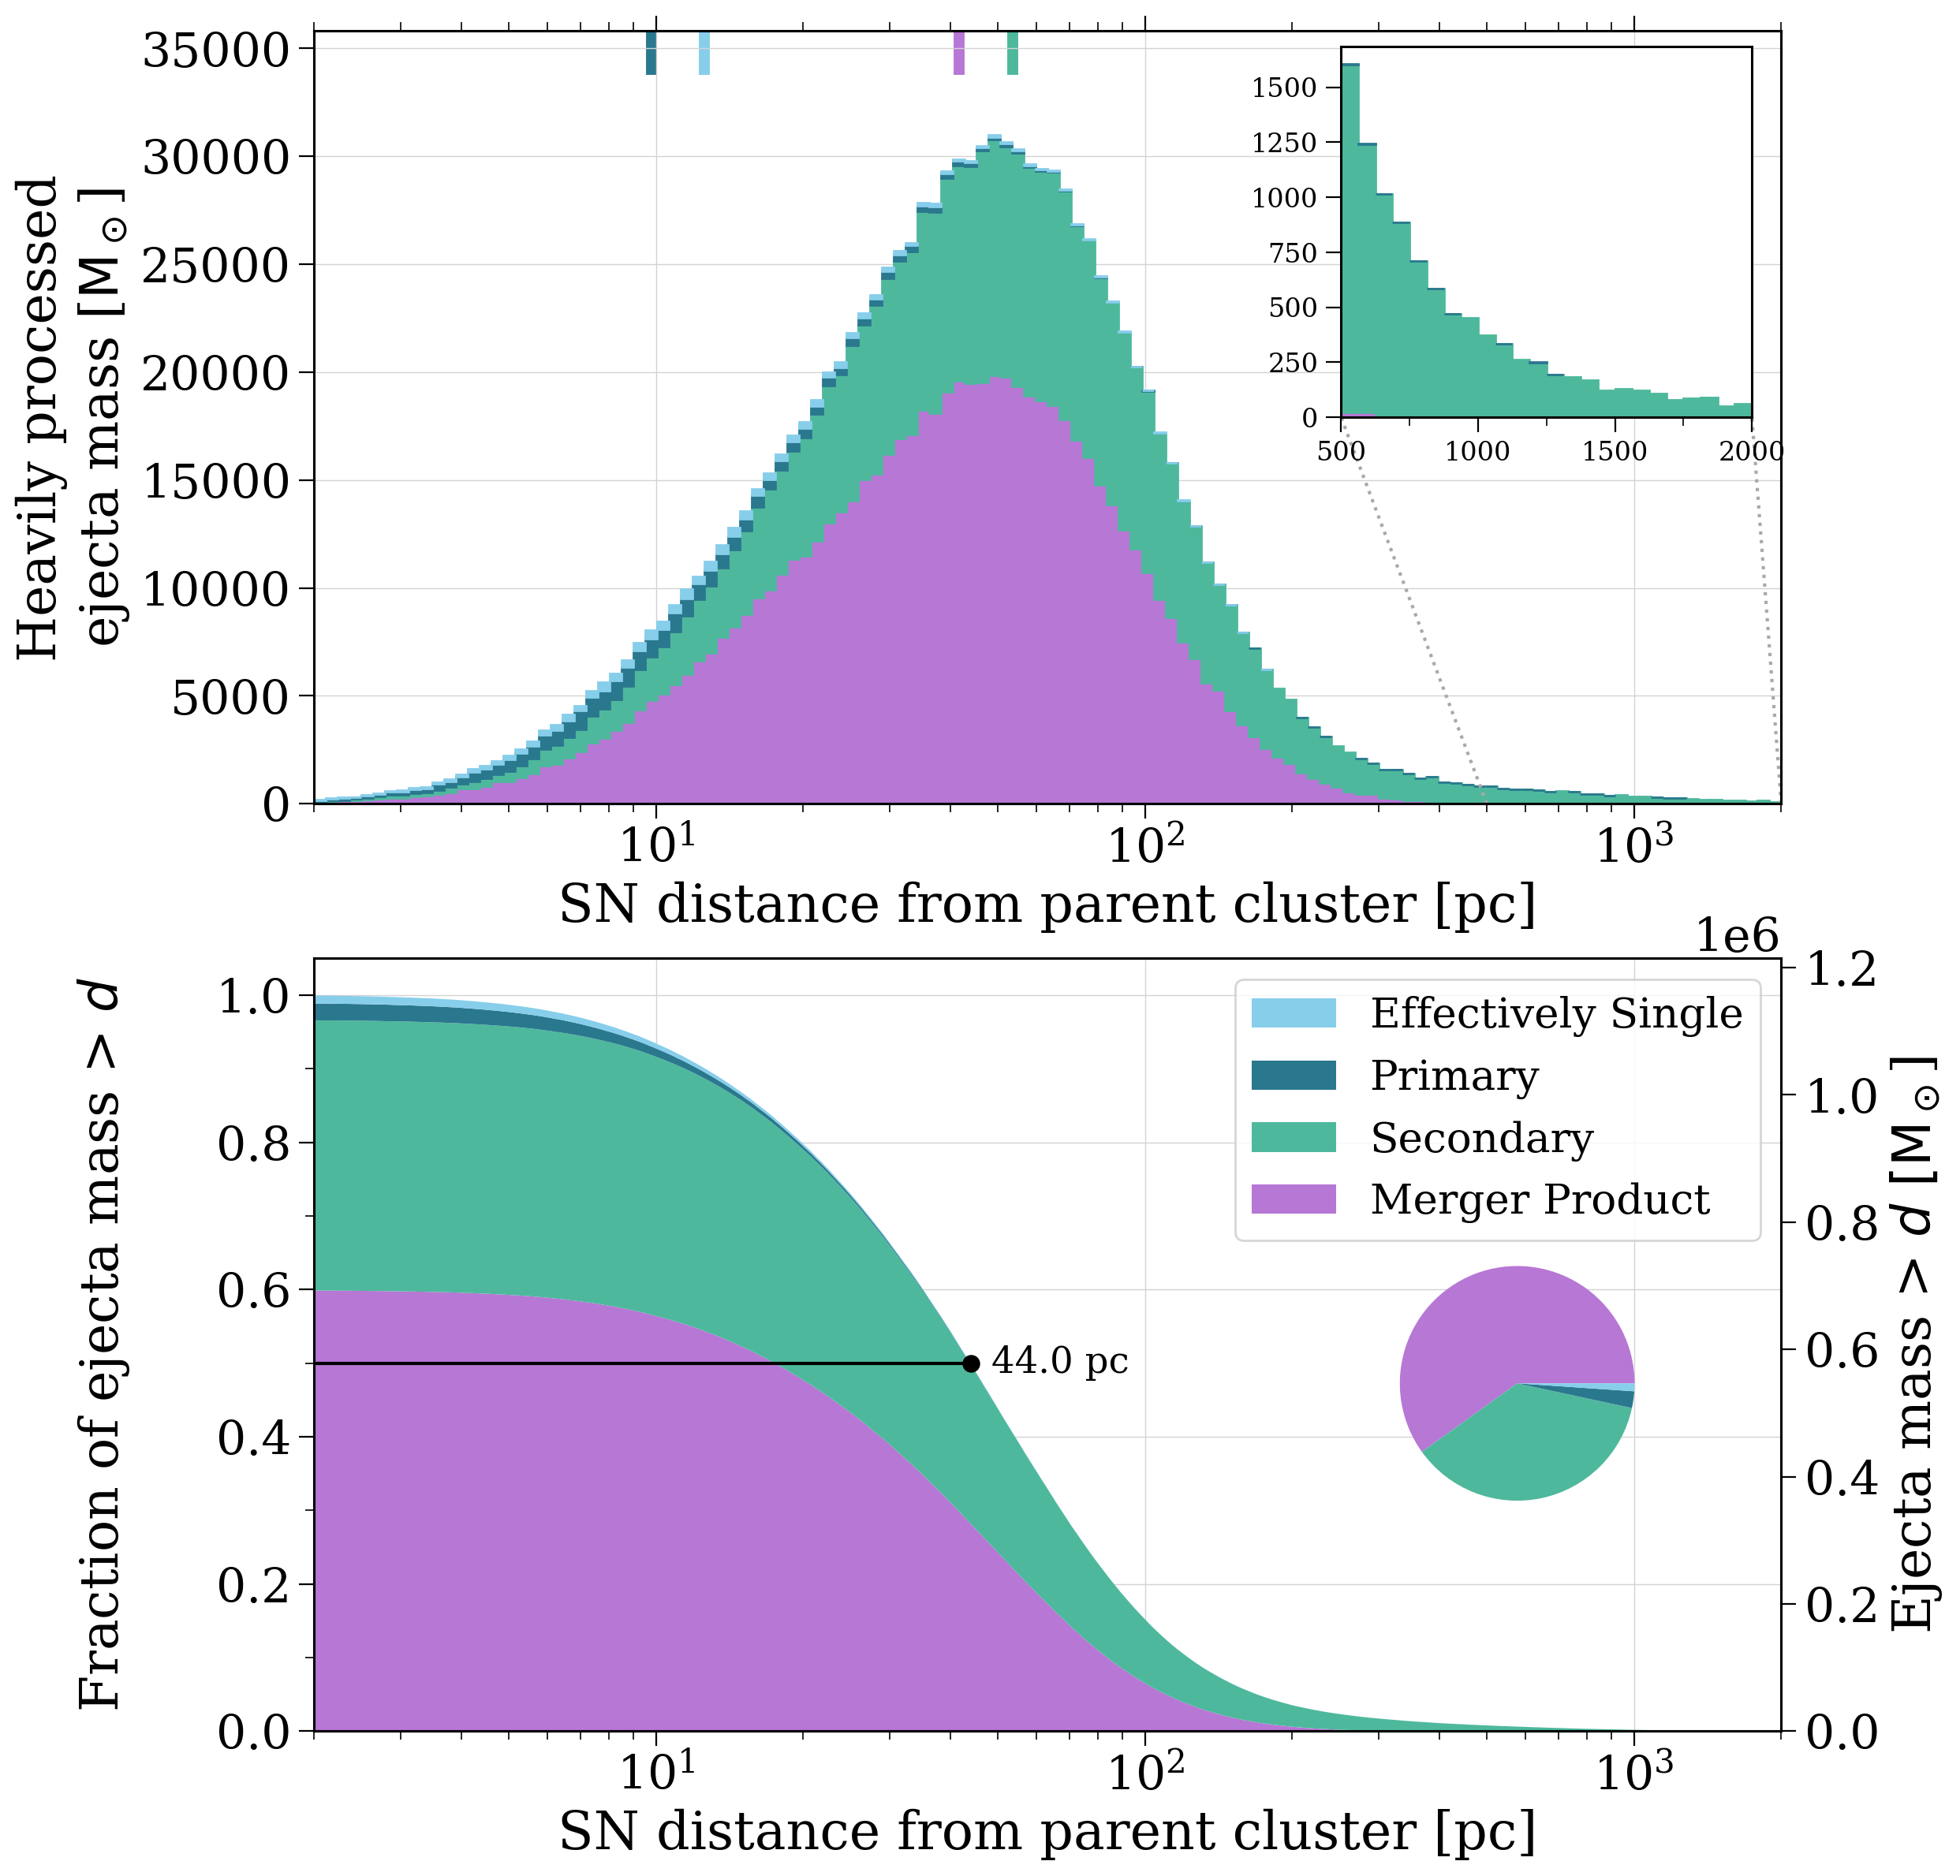

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Heavily processed\nejecta mass [$\\rm M_\\odot$]'>,
        <Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Fraction of ejecta mass > $d$'>],
       dtype=object))

In [110]:
reload(plotting)
plotting.sandpile(p, bins=np.geomspace(2e0, 2e3, 125), inset_n_bins=25,
                  var="ejecta_mass", ejecta_mass_col="massc", save_path="../plots/sn_ejecta_processed_fiducial.pdf")

# Times

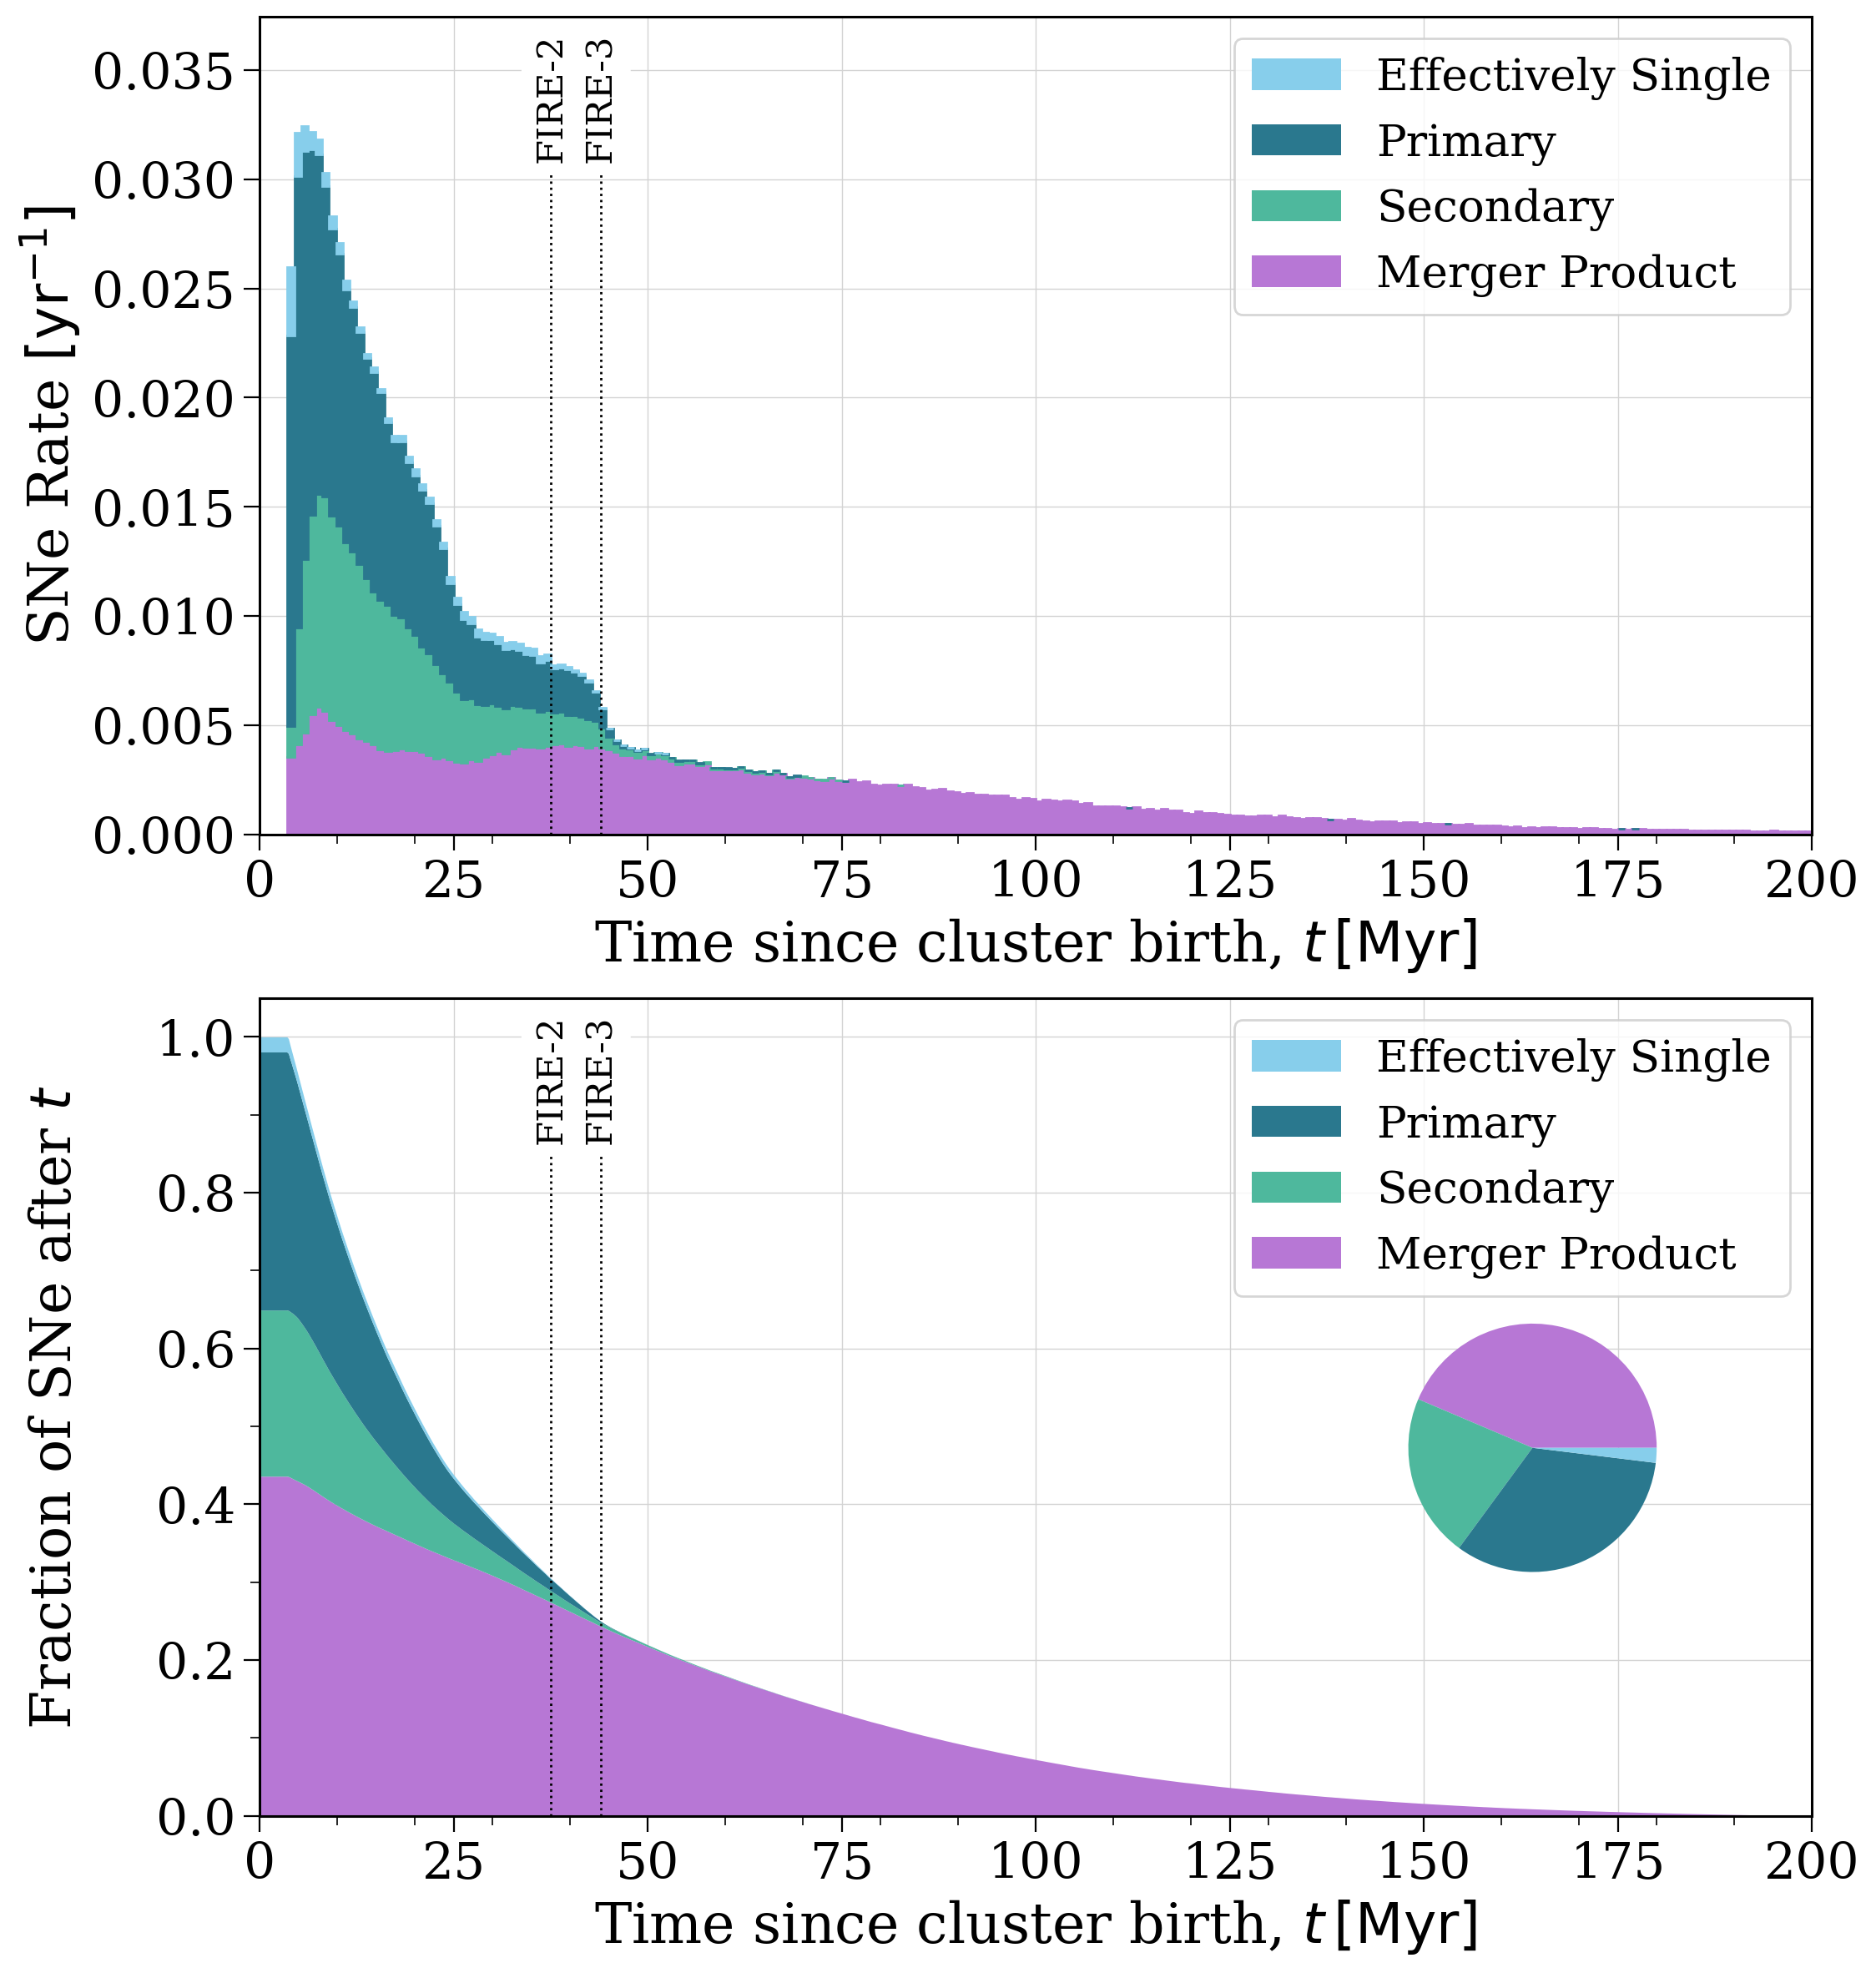

(<Figure size 1200x1400 with 2 Axes>,
 array([<Axes: xlabel='Time since cluster birth, $t \\, [\\rm Myr]$', ylabel='SNe Rate $\\rm [yr^{-1}]$'>,
        <Axes: xlabel='Time since cluster birth, $t \\, [\\rm Myr]$', ylabel='Fraction of SNe after $t$'>],
       dtype=object))

In [15]:
reload(plotting)
plotting.sandpile(p, bins=np.linspace(0, 2e2, 225), var="time",
                  FIRE_lines=[(37.53, "FIRE-2"), (44, "FIRE-3")],
                  save_path="../plots/sn_times_fiducial.pdf")

In [14]:
all_times = np.concatenate(plotting.get_data_and_weights(p, "time", widths=[1])[0])

In [15]:
(all_times > 37.5).sum() / len(all_times)

0.3093011530892709

In [16]:
(all_times > 44).sum() / len(all_times)

0.2540688043233297

In [17]:
(all_times > 50).sum() / len(all_times)

0.22340378570150718

# 2D distributions

In [18]:
sn_rows_1 = p.bpp[p.bpp["evol_type"] == 15]
sn_rows_2 = p.bpp[p.bpp["evol_type"] == 16]

In [19]:
sn_times_1 = sn_rows_1["tphys"]
sn_times_2 = sn_rows_2["tphys"]

In [20]:
sn_type_1 = np.repeat("primary", len(sn_times_1))
sn_type_1[p.sn_1_merger] = "merger"
sn_type_1[p.sn_1_singles] = "single"

sn_type_2 = np.repeat("secondary", len(sn_times_2))
sn_type_2[p.sn_2_merger] = "merger"

In [21]:
colours = plotting.colours.copy()
colours[1] = "#67C1AA"
colours[2] = "#2a788e"

In [22]:
ro = np.random.permutation(len(sn_times_1) + len(sn_times_2))

sn_times = np.concatenate((sn_times_1, sn_times_2))[ro]
sn_dists = np.concatenate((p.primary_sn_distances, p.secondary_sn_distances)).to(u.pc)[ro]
sn_types = np.concatenate((sn_type_1, sn_type_2))[ro]
sn_colours = np.repeat("#2a788e", len(sn_types)).astype(str)
for i, t in enumerate(["merger", "secondary", "primary", "single"]):
    sn_colours[sn_types == t] = colours[i]

#B777D5
#67C1AA
#2a788e
skyblue


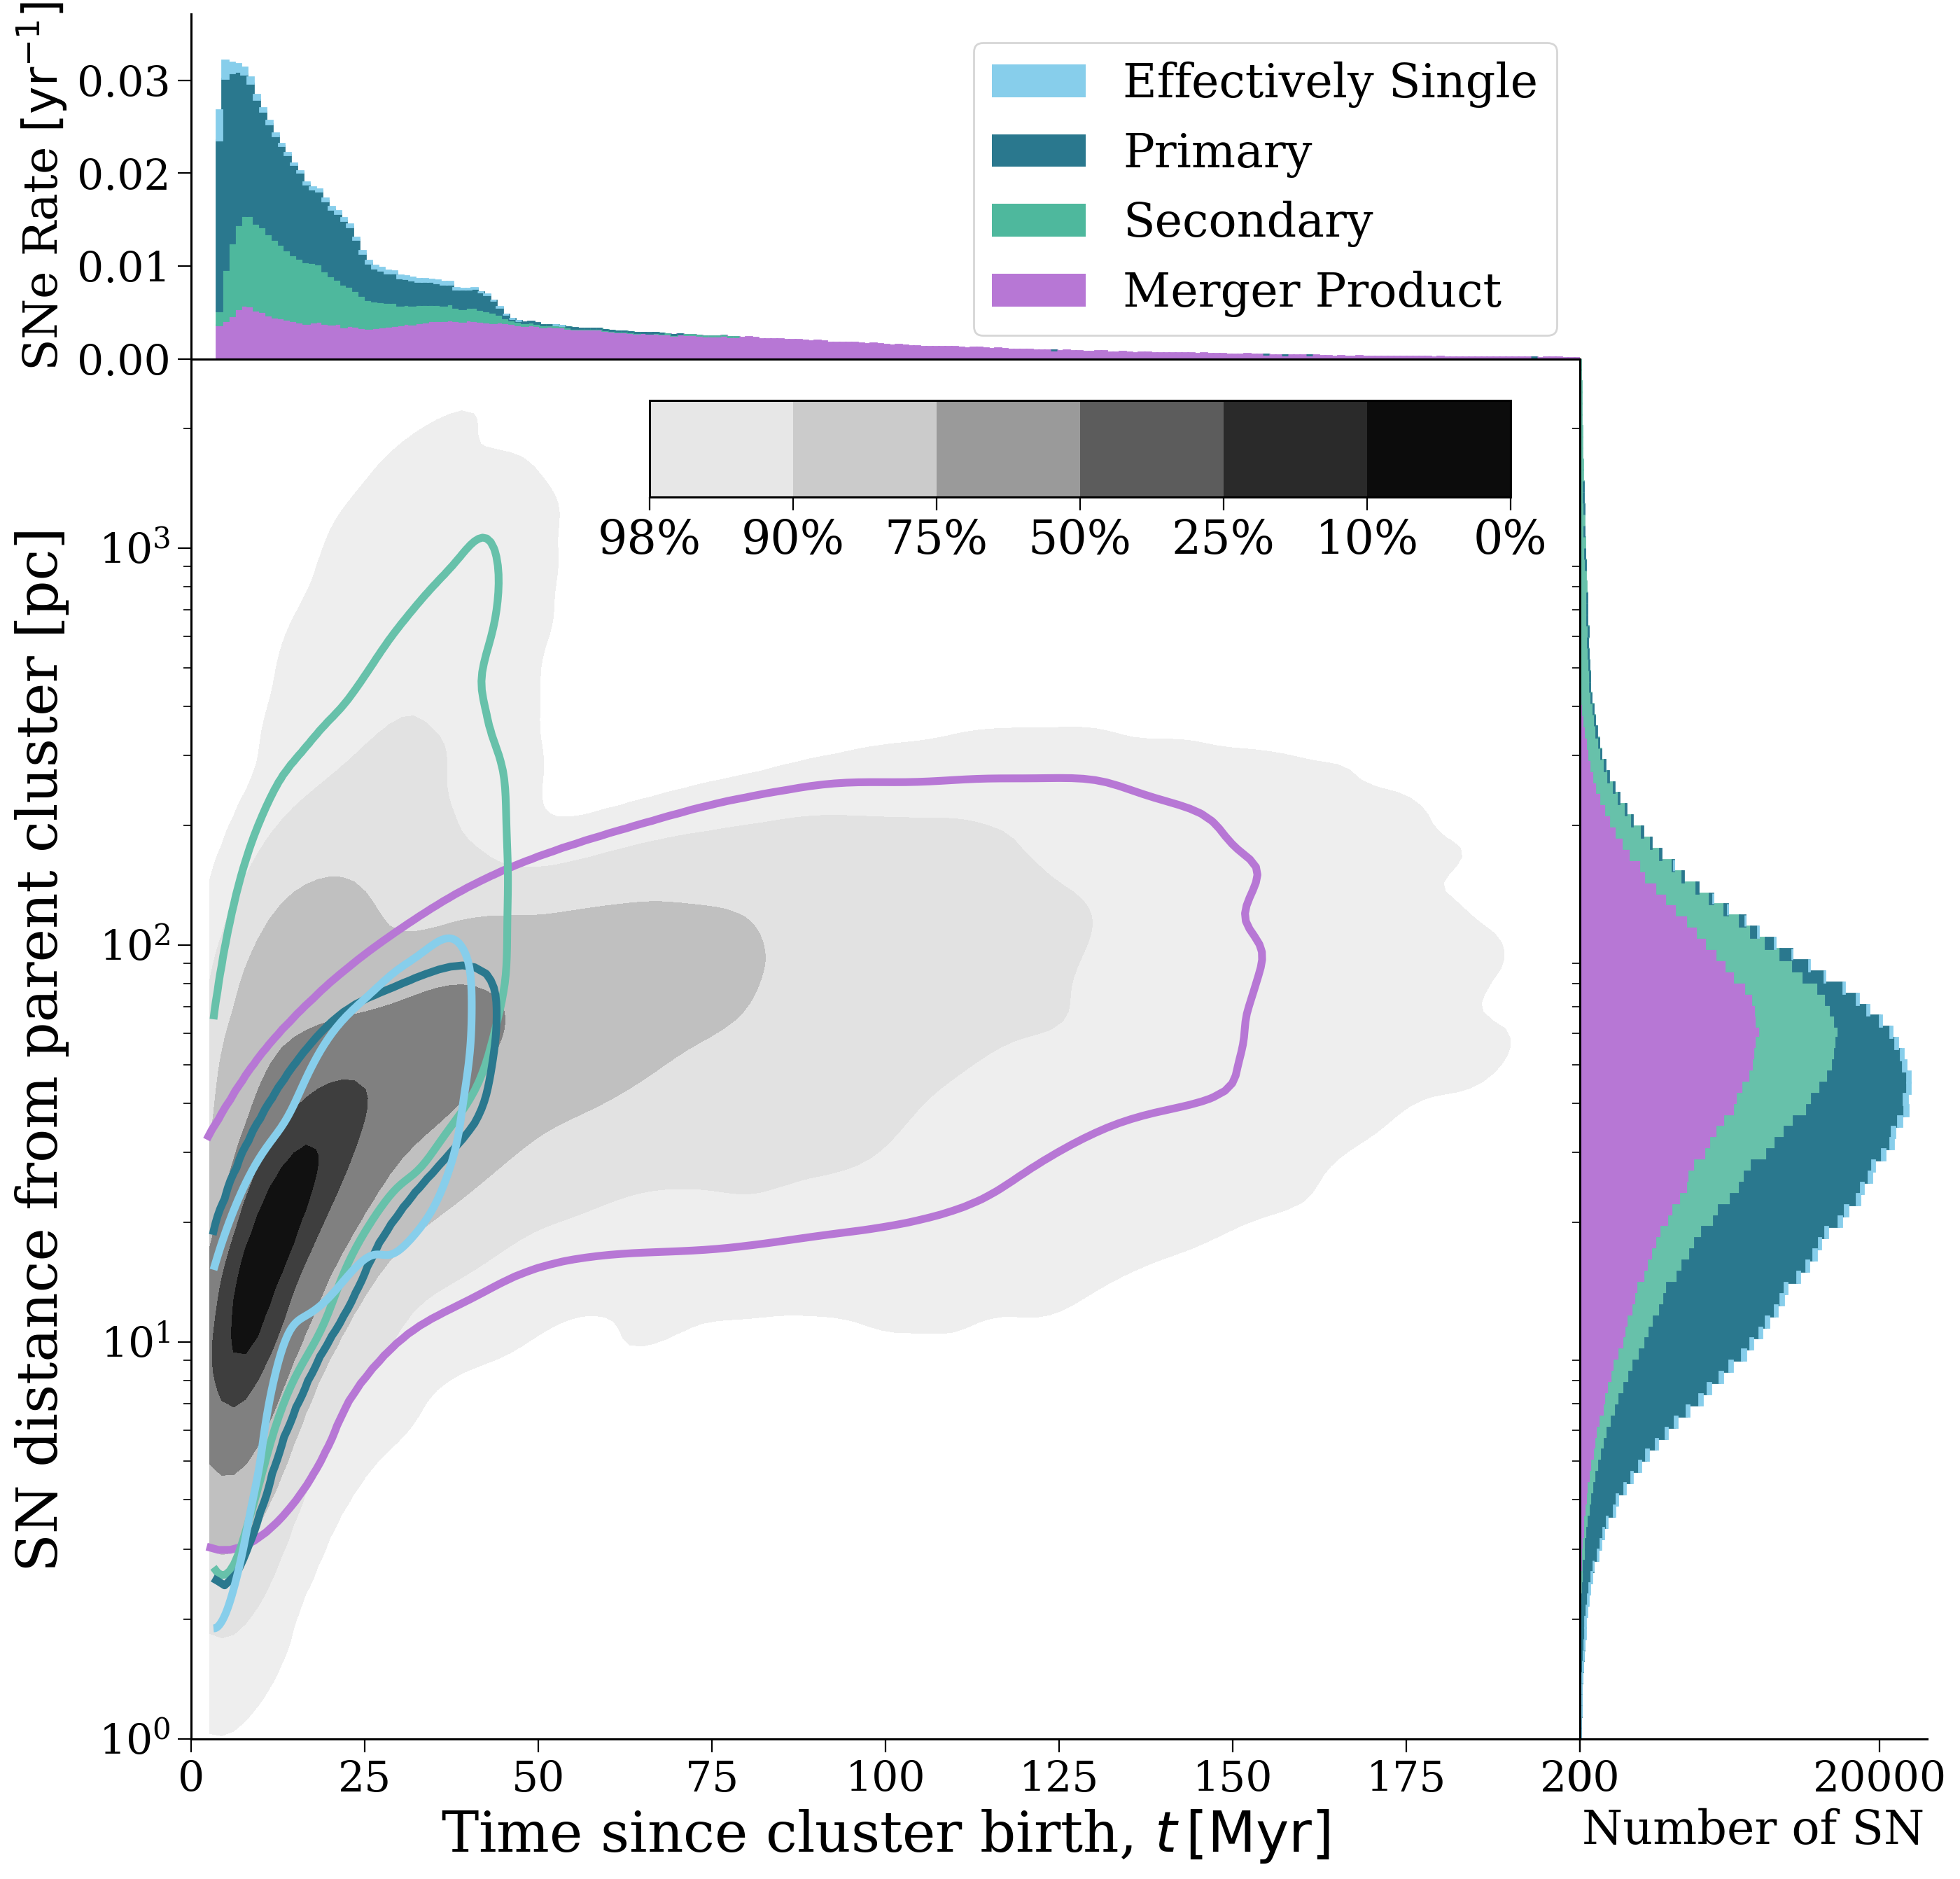

CPU times: user 3min 20s, sys: 1.43 s, total: 3min 21s
Wall time: 3min 20s


In [63]:
%%time
reload(plotting)
fig, axes = plt.subplots(2, 2, figsize=(16, 16), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})

fig.subplots_adjust(wspace=0.0, hspace=0.0)

y_max = 3e3

xedges = np.concatenate((np.linspace(0, 10, 6),
                         np.linspace(15, 200, 18)))
yedges = np.geomspace(1, y_max, 25)
every = 5

for colour in colours:
    
    print(colour)
    x = sn_times[sn_colours == colour]
    y = sn_dists.value[sn_colours == colour]

    every_c = every if colour != "skyblue" else 1
    
    sns.kdeplot(x=x[::every_c], y=y[::every_c], levels=[0.1], color=colour, linewidths=4, fill=False, ax=axes[1, 0],
                log_scale=(False, True), cut=0.2)

plotting.sandpile(p, bins=np.linspace(0, 201, 225), var="time", FIRE_lines=[], fig=fig, axes=[axes[0,0]], show=False, show_cdf=False, show_grid=False,)
counts, _, patches = axes[1, 1].hist([sn_dists.value[sn_colours == colour] for colour in colours],
                          stacked=True, bins=np.geomspace(1e0, y_max, 125), 
                          orientation="horizontal", color=colours, rasterized=True)
plotting.remove_white_stripes(counts, patches)

levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
level_labels = ["98%", "90%", "75%", "50%", "25%", "10%", "0%"]

cmap = sns.light_palette("black", as_cmap=True)
scatter = axes[1, 0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
inset_ax = axes[1, 0].inset_axes([0.33, 0.9, 0.62, 0.07])
cbar = fig.colorbar(scatter, ax=axes[1, 0], cax=inset_ax, boundaries=levels,
                    orientation="horizontal")
cbar.set_ticklabels(level_labels)
cbar.ax.tick_params(labelsize=fs)

sns.kdeplot(x=sn_times[::every], y=sn_dists[::every], log_scale=(False, True),
            levels=levels,
            cmap=cmap, fill=True, ax=axes[1, 0], zorder=-1, cut=0.2, bw_adjust=0.9)
axes[0, 0].set(xlim=(0, 200), ylabel=plotting.top_ylabel["time"], xticks=[])
axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 1].axis("off")
axes[1, 0].set(yscale="log", xlim=(0, 200), ylim=(1, y_max))
axes[1, 0].set_xlabel(plotting.xlabel["time"], fontsize=1.2*fs)
axes[1, 0].set_ylabel(plotting.xlabel["distance"], fontsize=1.2*fs)
axes[1, 1].set(yscale="log", ylim=(1, y_max), xlabel=plotting.top_ylabel["distance"], yticks=[])
axes[1, 1].spines[['right', 'top']].set_visible(False)

fig.align_ylabels()

plt.savefig("../plots/time_dist_2d.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

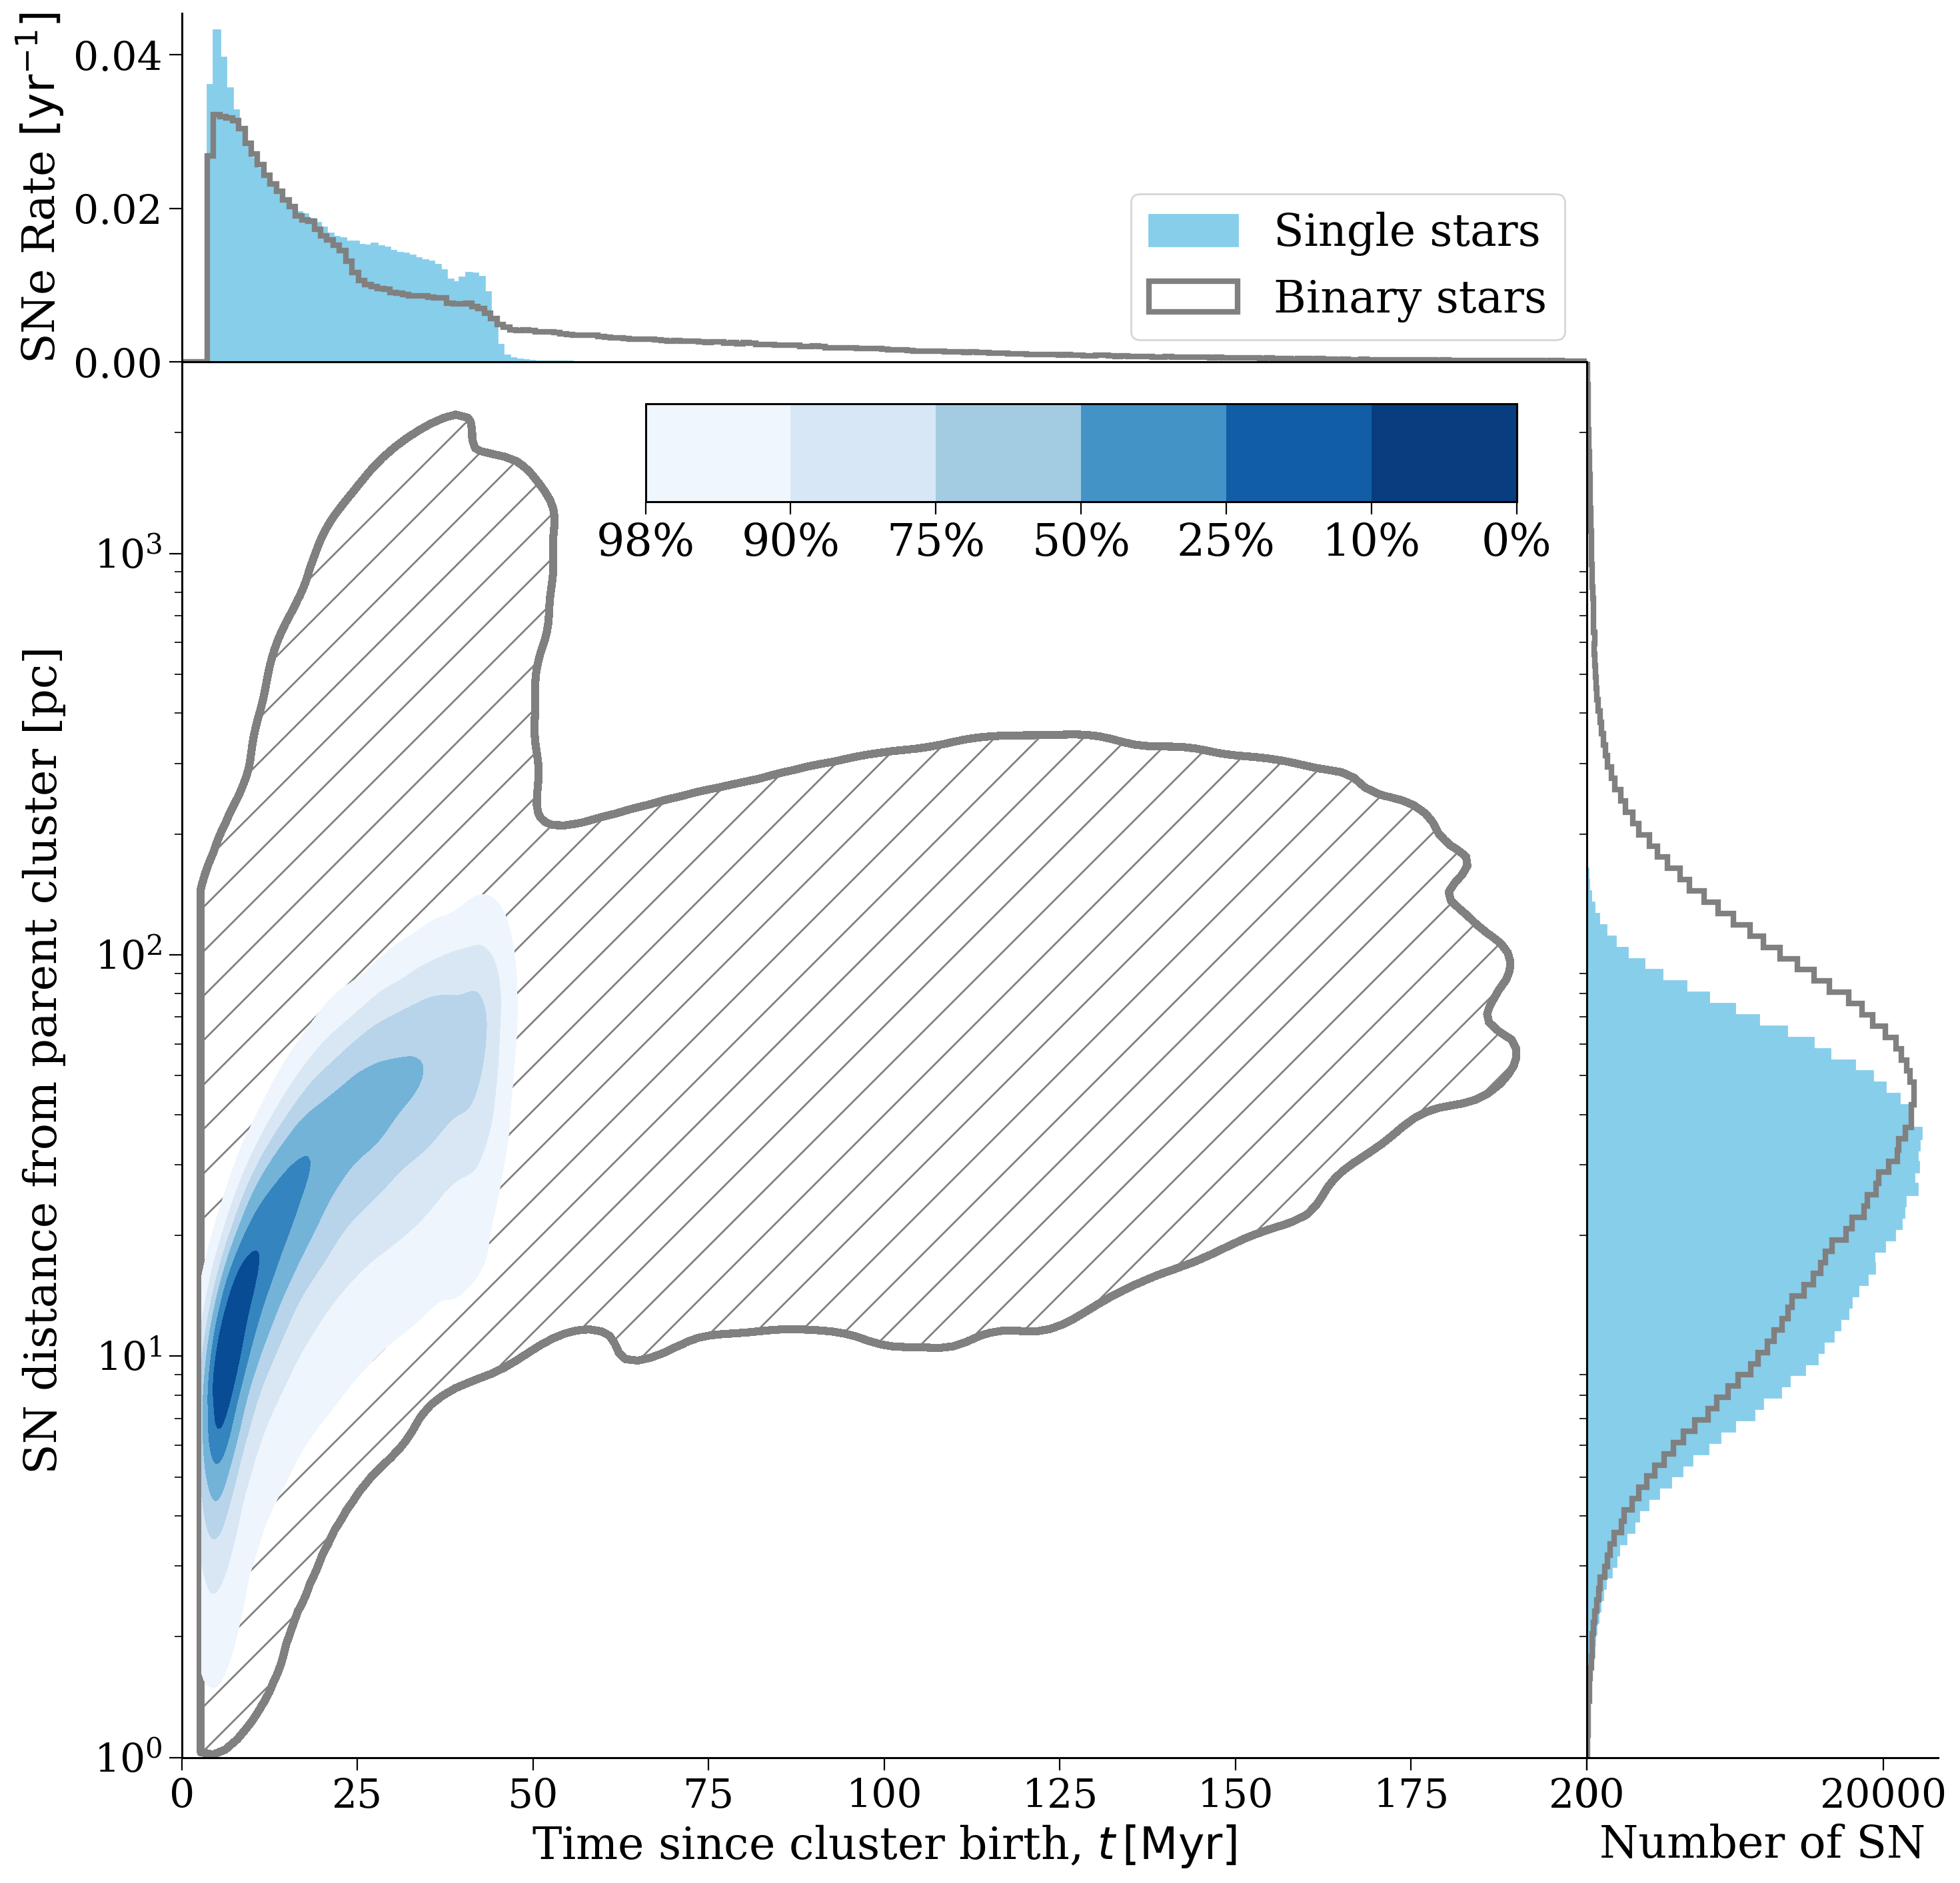

CPU times: user 3min 4s, sys: 1.35 s, total: 3min 5s
Wall time: 3min 4s


In [62]:
%%time
fig, axes = plt.subplots(2, 2, figsize=(17, 17), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})

fig.subplots_adjust(wspace=0.0, hspace=0.0)

x = sn_times
y = sn_dists.value

y_max = 3e3

xedges = np.concatenate((np.linspace(0, 10, 6),
                         np.linspace(15, 200, 18)))
yedges = np.geomspace(1, y_max, 25)

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])    
hist_norm = hist / np.sum(hist)

# flatten the histogram and sort it in descending order
hist_flat = hist_norm.flatten()
hist_sorted = np.sort(hist_flat)[::-1]

# compute the cumulative sum
cumulative_sum = np.cumsum(hist_sorted)

# find the 50% contour level
contour_level = hist_sorted[np.searchsorted(cumulative_sum, 0.98)]

# create meshgrid for the histogram
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xcenters, ycenters)

w = plotting.get_data_and_weights(p, "time", [np.linspace(0, 201, 225)[1]])[1][-1][0]
patches = axes[0, 0].hist(singles_sn_times, bins=np.linspace(0, 201, 225),
                          weights=np.repeat(w, len(singles_sn_times)),
                          color=plotting.colours[-1],
                          rasterized=True, label="Single stars")[-1]
plotting.remove_white_stripes(None, [patches])
patches = axes[0, 0].hist(sn_times, bins=np.linspace(0, 201, 225),
                          weights=np.repeat(w, len(sn_times)),
                          color="grey", histtype="step",
                          rasterized=True, lw=3, label="Binary stars")[-1]
# plotting.remove_white_stripes([patches])
patches = axes[1, 1].hist(singles_sn_dists, bins=np.geomspace(1e0, y_max, 125),
                          color=plotting.colours[-1],
                          orientation="horizontal", rasterized=True)[-1]
plotting.remove_white_stripes(None, [patches])
patches = axes[1, 1].hist(sn_dists.to(u.pc).value, bins=np.geomspace(1e0, y_max, 125),
                          color="grey", histtype="step", lw=3,
                          orientation="horizontal", rasterized=True)[-1]

axes[0, 0].legend(fontsize=fs, loc="lower right")

levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
level_labels = ["98%", "90%", "75%", "50%", "25%", "10%", "0%"]

cmap = "Blues"
scatter = axes[1, 0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
inset_ax = axes[1, 0].inset_axes([0.33, 0.9, 0.62, 0.07])
cbar = fig.colorbar(scatter, ax=axes[1, 0], cax=inset_ax, boundaries=levels,
                    orientation="horizontal")
cbar.set_ticklabels(level_labels)
cbar.ax.tick_params(labelsize=fs)

every = 5
sns.kdeplot(x=singles_sn_times[::every], y=singles_sn_dists[::every], log_scale=(False, True),
            levels=levels,
            cmap=cmap, fill=True, ax=axes[1, 0], zorder=10, cut=0.5)
            # extent=(3, 200, np.log10(1e0), np.log10(2e3)))

sns.kdeplot(x=sn_times[::every], y=sn_dists[::every], log_scale=(False, True),
            levels=[0.02, 1],
            color="grey", fill=True, ax=axes[1, 0], zorder=-1, cut=0.2, bw_adjust=0.9)
axes[1, 0].collections[-1].set_hatch("/")
axes[1, 0].collections[-1].set_facecolor("none")
axes[1, 0].collections[-1].set_edgecolor("grey")
axes[1, 0].collections[-1].set_linewidth(4)

# fig.colorbar(hexbin, cax=inset_ax, orientation='horizontal')

axes[0, 0].set(xlim=(0, 200), ylabel=plotting.top_ylabel["time"], xticks=[])
axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 1].axis("off")
axes[1, 0].set(yscale="log", xlim=(0, 200), ylim=(1, y_max), xlabel=plotting.xlabel["time"], ylabel=plotting.xlabel["distance"])
axes[1, 1].set(yscale="log", ylim=(1, y_max), xlabel=plotting.top_ylabel["distance"], yticks=[])
axes[1, 1].spines[['right', 'top']].set_visible(False)

fig.align_ylabels()

plt.savefig("../plots/time_dist_2d_singles.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

In [61]:
len(np.load("../data/subset.npy"))

1000

In [36]:
len(sn_times) / len(singles_sn_times)

1.1189163934889141

# What's happening with the times

## Mass transfer type

In [21]:
def get_mt_1_type(p):
    mt_1_type = pd.Series(np.zeros(len(p)), index=p.bin_nums)

    kstar_mt_1 = p.bpp[(p.bpp["evol_type"] == 3) & (p.bpp["RRLO_1"] >= 1)].drop_duplicates(subset="bin_num", keep="first")["kstar_1"]
    
    for low, high, t in [(-np.inf, 1, 1), (1, 4, 2), (4, 6, 3)]:
        mt_1_type.loc[kstar_mt_1[(kstar_mt_1 > low) & (kstar_mt_1 <= high)].index] = t
    return mt_1_type

In [22]:
mt_1_type = get_mt_1_type(p)

In [23]:
sn_time_1 = p.bpp["tphys"][(p.bpp["evol_type"] == 15) & (~p.bpp["bin_num"].isin(p.duplicate_sn))]
sn_time_2 = p.bpp["tphys"][(p.bpp["evol_type"] == 16) & (~p.bpp["bin_num"].isin(p.duplicate_sn))]

In [24]:
def t_MS(m, Z):
    """ Get the main sequence lifetime of a star with mass m and metallicity Z using Hurley+2000 """
    
    def tBGB(m, Z):
        zeta = np.log10(Z / 0.02)

        a1 = 1.593890e3 + 2.053038e3 * zeta + 1.231226e3 * zeta**2 + 2.327785e2 * zeta**3
        a2 = 2.706708e3 + 1.483131e3 * zeta + 5.772723e2 * zeta**2 + 7.411230e1 * zeta**3
        a3 = 1.466143e2 - 1.048442e2 * zeta - 6.795374e1 * zeta**2 - 1.391127e1 * zeta**3
        a4 = 4.141960e-2 + 4.564888e-2 * zeta + 2.958542e-2 * zeta**2 + 5.571483e-3 * zeta**3
        a5 = 3.426349e-1
        return (a1 + a2 * m**4 + a3 * m**(5.5) + m**7) / (a4 * m**2 + a5 * m**7)
    
    def mu_t(m, Z):
        zeta = np.log10(Z / 0.02)

        a6 = 1.949814e1 + 1.758178e0 * zeta - 6.008212e0 * zeta**2 - 4.470533e0 * zeta**3
        a7 = 4.903830e0
        a8 = 5.212154e-2 + 3.166411e-2 * zeta - 2.750074e-3 * zeta**2 - 2.271549e-3 * zeta**3
        a9 = 1.312179e0 - 3.294936e-1 * zeta + 9.231860e-2 * zeta**2 + 2.610989e-2 * zeta**3
        a10 = 8.073972e-1

        return np.maximum(0.5, 1.0 - 0.01 * np.maximum(a6 / m**a7, a8 + a9 / m**a10))
    
    def x_t(Z):
        zeta = np.log10(Z / 0.02)
        return np.maximum(0.95, np.minimum(0.95 - 0.03 * (zeta + 0.30103), 0.99))
    
    tbgb = tBGB(m, Z)
    return np.maximum(mu_t(m, Z) * tbgb, x_t(Z) * tbgb)

In [25]:
from scipy.interpolate import UnivariateSpline

In [30]:
order = np.argsort(start["mass_1"][p.sn_1][mt == 0].values)
spline = UnivariateSpline(start["mass_1"][mt == 0].values[order],
                          sn_time_1[p.sn_1][mt == 0].values[order],
                          k=3, s=500)

In [409]:
from copy import copy

In [504]:
from matplotlib.colors import ColorConverter

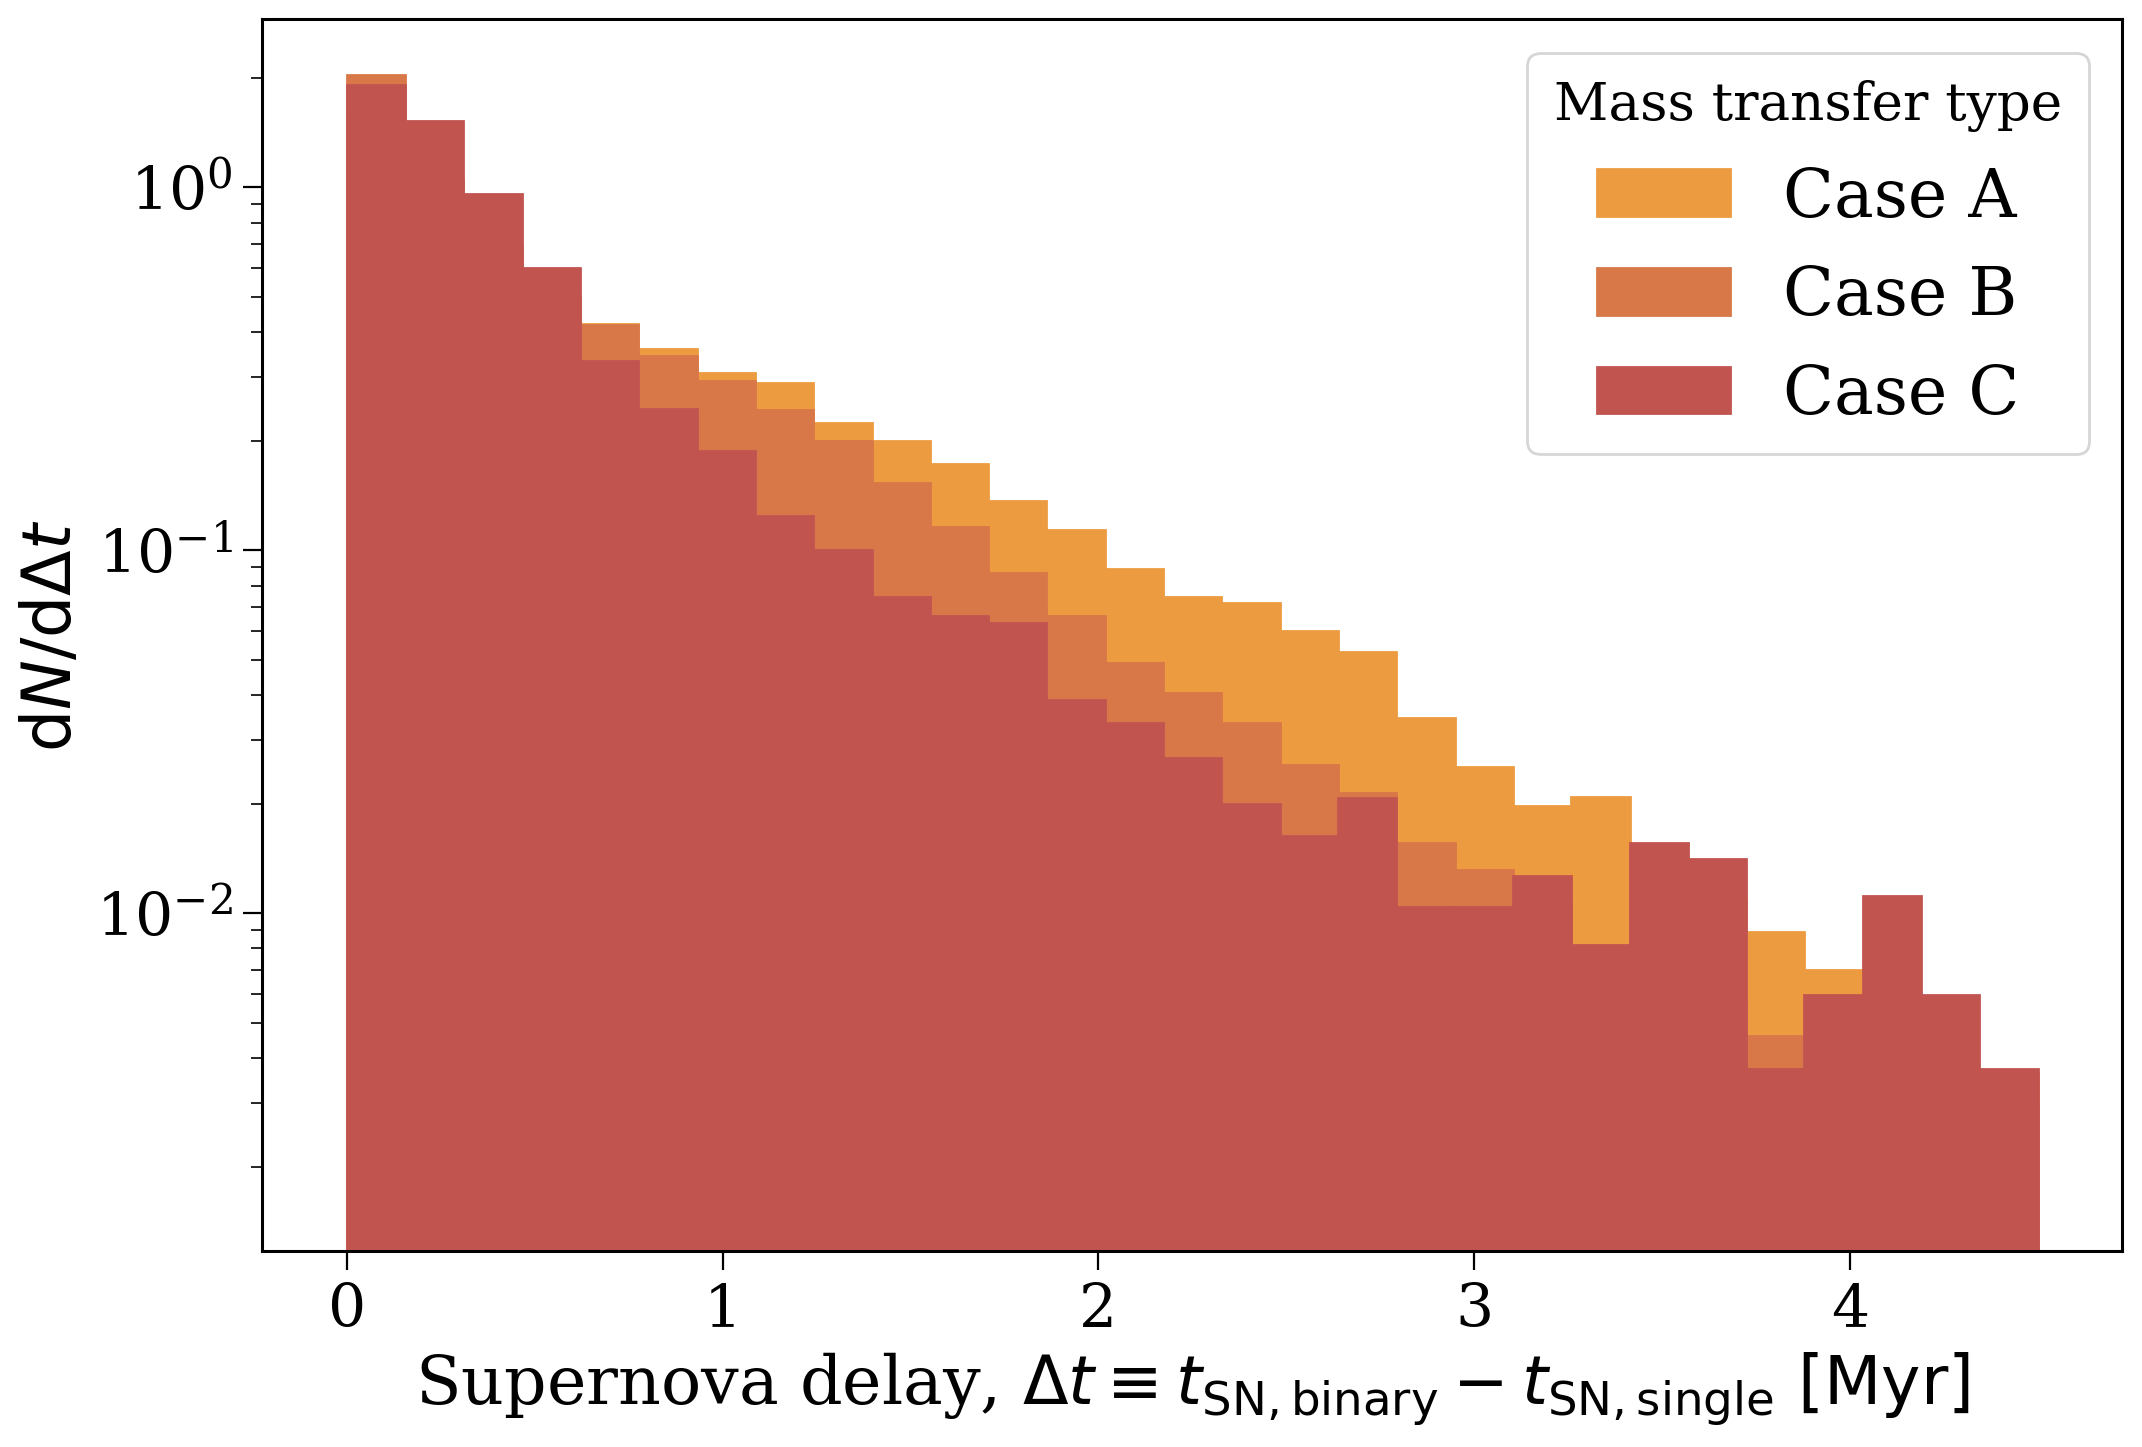

In [31]:
fig, ax = plt.subplots()

bins = np.linspace(0, 4.5, 30)

for i, col, case in zip(range(1,4), ["#ED9B40", "#D87848", "#c25450"], "ABC"):
    difference = sn_time_1[p.sn_1][mt == i].values - spline(start["mass_1"][p.sn_1][mt == i])
    difference = difference[sn_time_1[p.sn_1][mt == i].values < 50]
    patches = plt.hist(difference, bins=bins, density=True, color=col, label=f"Case {case}")[-1]
    plotting.remove_white_stripes(None, [patches])

ax.set(yscale="log",
       xlabel=r"Supernova delay, $\Delta t \equiv t_{\rm SN, binary} - t_{\rm SN, single} \,\, [\rm Myr]$",
       ylabel=r"${\rm d}N/{\rm d}\Delta t$")

# handles, labels = ax.get_legend_handles_labels()
# new_handles = []
# for handle, col in zip(handles, ["#ED9B40", "#D87848", "#c25450"]):
#     new_handle = copy(handle)
#     new_handle.set_alpha(0.8)
#     new_handle.set_facecolor(col + "80")
#     new_handle.set_edgecolor(col)
#     new_handle.set_linewidth(3)
#     new_handles.append(new_handle)
leg = ax.legend(title="Mass transfer type", title_fontsize=0.8*fs)

plt.savefig("../plots/sn_delay_by_mt_type.pdf", bbox_inches="tight")

plt.show()

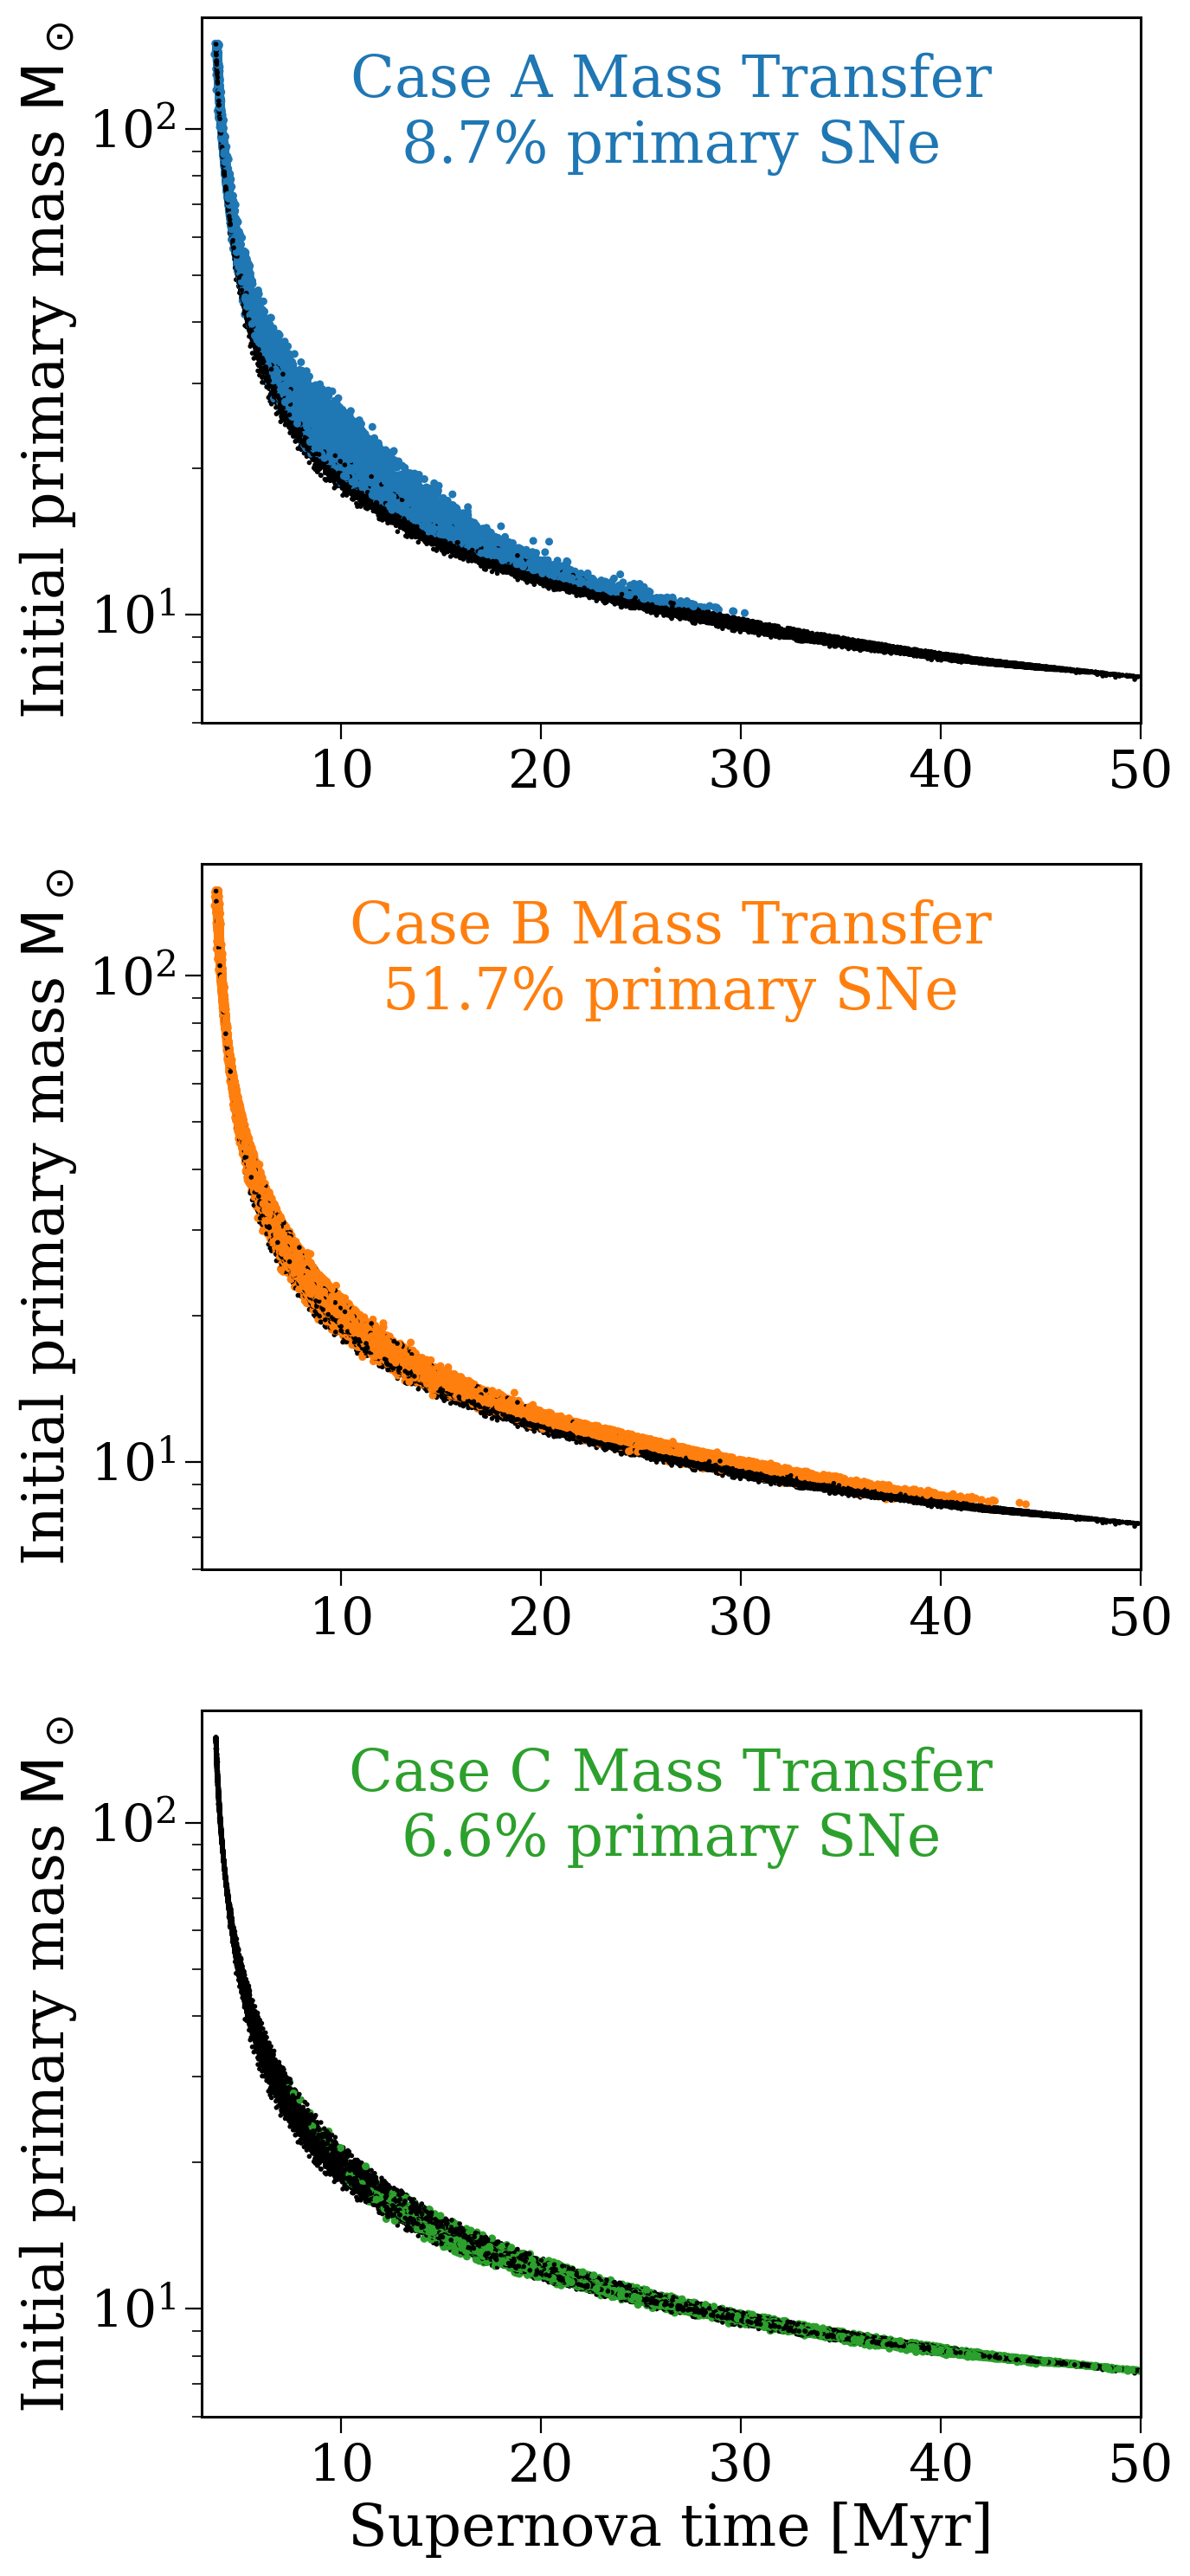

In [28]:
start = p.bpp.drop_duplicates(subset='bin_num', keep='first').loc[p.sn_1[p.sn_1].index]
mt = mt_1_type.loc[p.sn_1[p.sn_1].index]
mt_cols = np.array([f"C{int(i - 1)}" if i > 0 else "black" for i in mt])

fig, axes = plt.subplots(3, 1, figsize=(7, 18))

for i, ax in zip(range(1, 4), axes):
    
    mask = (mt == 0) | (mt == i)
    
    ax.scatter(sn_time_1[p.sn_1][mask], start["mass_1"][mask], c=mt_cols[mask], s=np.where(mt[mask] == 0, 1, 5),
              rasterized=True)

    # mass_range = np.geomspace(7, 150, 100)
    # ax.plot(t_MS(mass_range, 0.02) * 1.05, mass_range, color="grey", linestyle="--")
    # ax.plot(t_MS(mass_range, 0.002) * 1.05, mass_range, color="grey", linestyle="--")

    ax.annotate(f"Case {chr(ord('A') + i - 1)} Mass Transfer\n{(mt == i).sum() / len(mt) * 100:1.1f}% primary SNe", xy=(0.5, 0.95),
                xycoords="axes fraction", ha="center", va="top", fontsize=fs, color=f"C{i - 1}")
        
    ax.set(ylabel=r"Initial primary mass $\rm M_\odot$", yscale="log", xlim=(3, 50), ylim=(6, 170))
axes[-1].set_xlabel("Supernova time [Myr]")

# plt.savefig("../plots/sn1_time_vs_init_mass.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [32]:
ms_masses = np.linspace(6, 150, 1000)
ms_times = [t_MS(m, p.initC["metallicity"].mean()) for m in ms_masses]

In [33]:
from scipy.interpolate import interp1d

[37.4571822  29.85364243 24.61762682 18.04476011  8.85544728  5.91395881
  4.79940803  4.23966548  3.91202849  3.70077656]


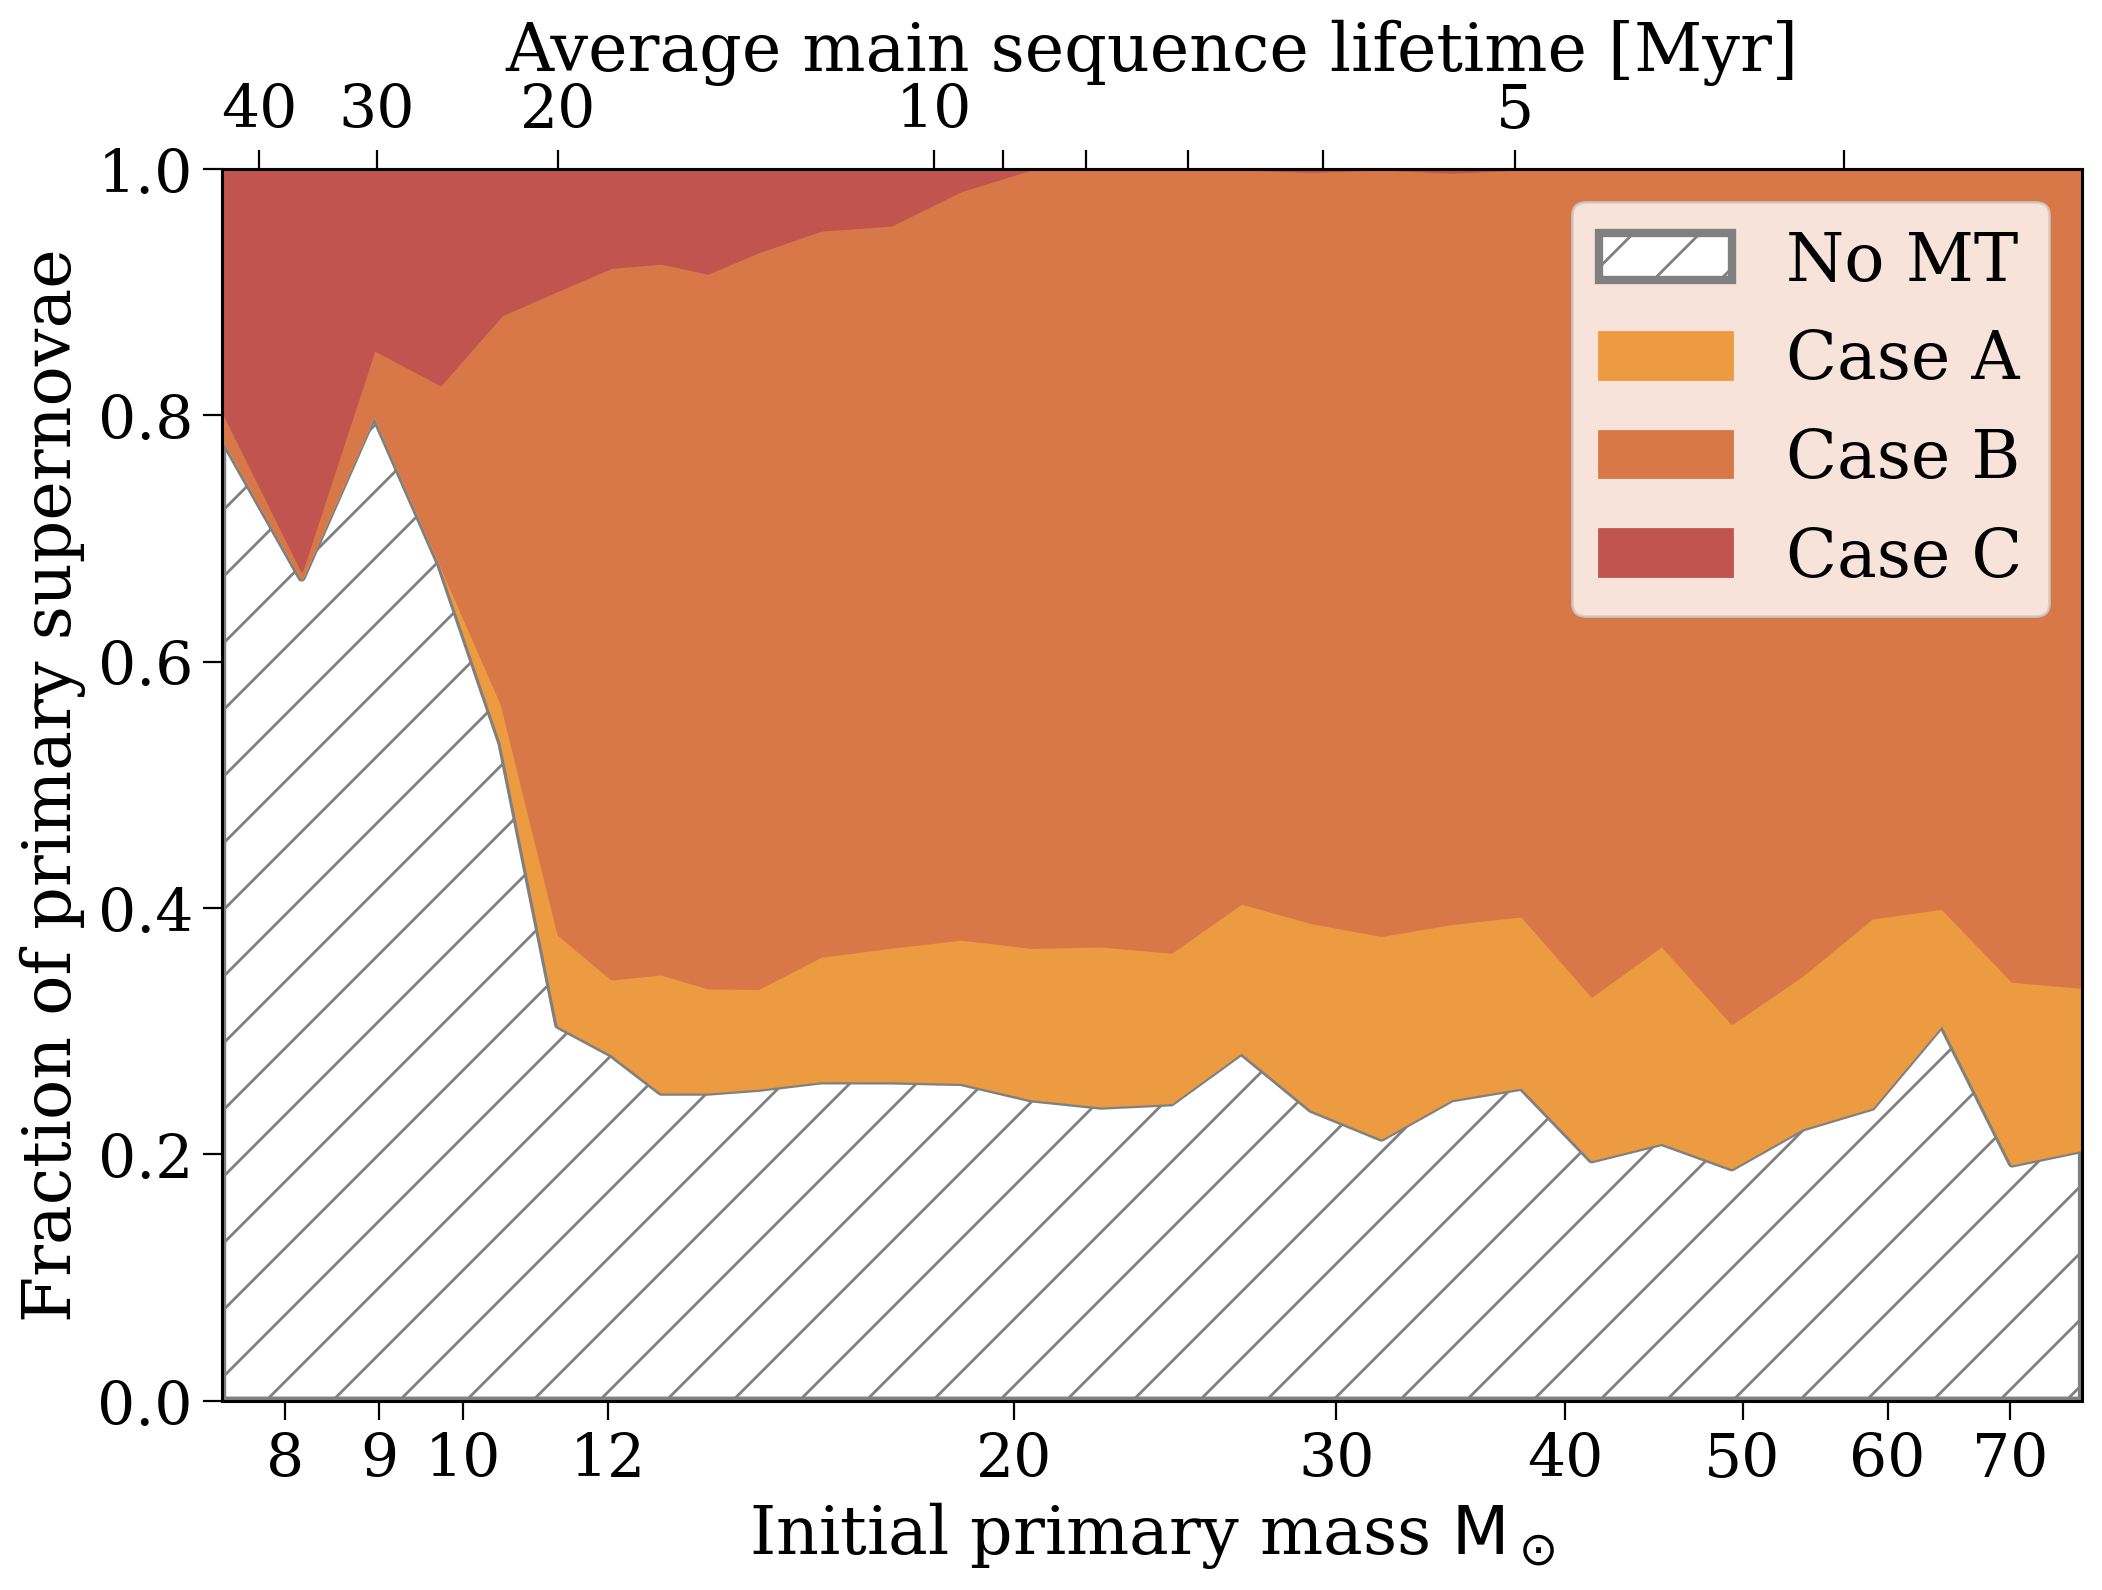

In [21]:
start = p.bpp.drop_duplicates(subset='bin_num', keep='first').loc[p.sn_1[p.sn_1].index]
mt = mt_1_type.loc[p.sn_1[p.sn_1].index]
mt_cols = np.array([f"C{int(i - 1)}" if i > 0 else "black" for i in mt])

mt_cols = ["black", "#ffc0b6", "#ff8981", "#c25450"]
mt_cols = ["black", "#ED9B40", "#D87848", "#c25450"]

bins = np.concatenate((np.linspace(7, 14, 10), np.geomspace(15, 80, 20)))
bin_centres = bins[:-1] + (bins[1:] - bins[:-1]) / 2

hs = np.array([np.histogram(start["mass_1"][mt == i], bins=bins)[0] for i in range(4)])
norm_hs = hs / hs.sum(axis=0)
cn_hs = np.cumsum(norm_hs, axis=0)

fig, ax = plt.subplots()

ax.fill_between(bin_centres, 0, cn_hs[0], facecolor="white", edgecolor="grey", hatch="/", label="No MT", linewidth=3)
for i in range(1, len(cn_hs)):
    ax.fill_between(bin_centres, cn_hs[i - 1], cn_hs[i], label=f"Case {chr(ord('A') + i - 1)}", color=mt_cols[i])
ax.set(xlim=(bin_centres[0], bin_centres[-1]),
       ylim=(0, 1),
       xscale="log",
       xlabel=r"Initial primary mass $\rm M_\odot$", 
       ylabel="Fraction of primary supernovae",
       xticks=[8,9,10,12,20,30,40,50,60,70],
       xticklabels=[8,9,10,12,20,30,40,50,60,70])
ax.legend()

# top_ax = ax.twiny()
top_ticks = np.asarray([t_MS(t, p.initC["metallicity"].mean()) for t in [8,9,10,12,20,30,40,50,60,70]])
print(top_ticks)

top_ticks = [40,30,20,10,9,8,7,6,5,4,3]
top_ticks_labels = [40,30,20,10,"","","","",5,"",""]

# top_ax = ax.twiny()
top_ax = ax.secondary_xaxis('top', functions=(interp1d(ms_masses, ms_times, bounds_error=False), interp1d(ms_times, ms_masses, bounds_error=False)))
top_ax.set(
    # xlim=(t_MS(bin_centres[0], p.initC["metallicity"].mean()), t_MS(bin_centres[-1], p.initC["metallicity"].mean())),
    # xscale="log",
    xlabel="Average main sequence lifetime [Myr]",
    xticks=top_ticks,
    xticklabels=top_ticks_labels,
)
# top_ax.set_xlabel('X-axis (Fahrenheit)')

# ax.axvline(12, color="white")

# ax.fill_between([9.7, 10.3], [0.68, 0.565], [1, 1], color="white", alpha=0.2)

# plt.savefig("../plots/mt_type_by_mass.pdf", format="pdf", bbox_inches="tight")

plt.show()

[37.45367215 29.84981957 24.61379356 18.04123867  8.85333124  5.91270335
  4.79856422  4.23905088  3.91155592  3.70039888]


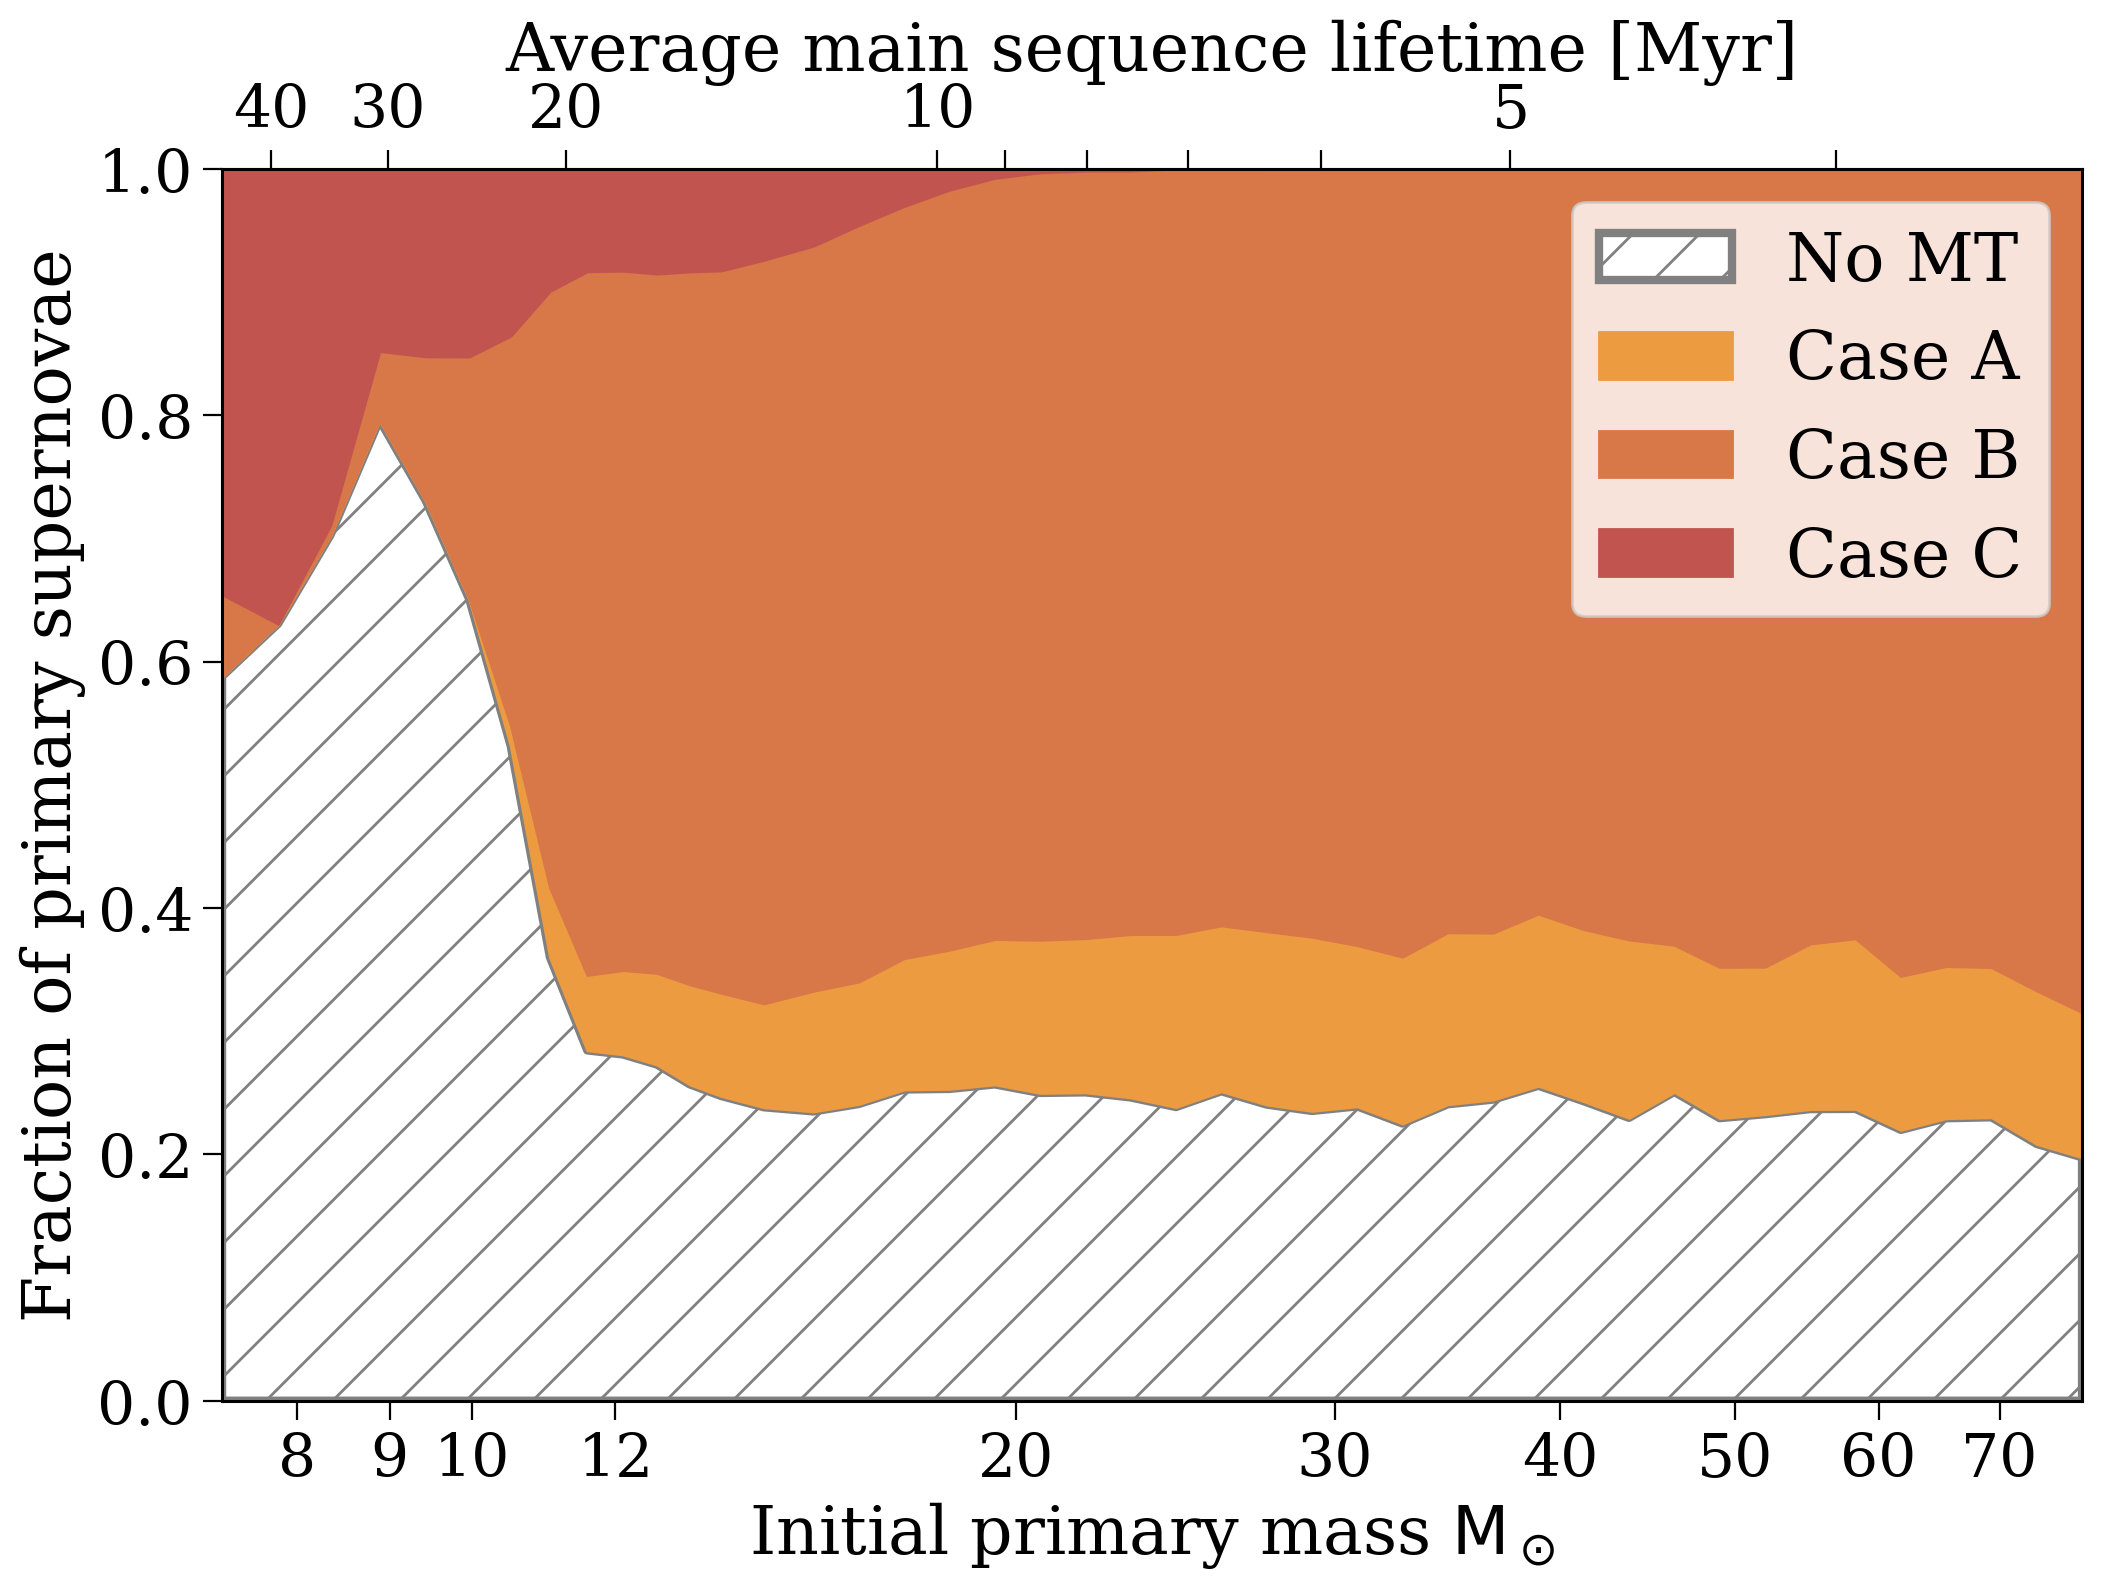

In [49]:
start = p.bpp.drop_duplicates(subset='bin_num', keep='first').loc[p.sn_1[p.sn_1].index]
mt = mt_1_type.loc[p.sn_1[p.sn_1].index]
mt_cols = np.array([f"C{int(i - 1)}" if i > 0 else "black" for i in mt])

mt_cols = ["black", "#ffc0b6", "#ff8981", "#c25450"]
mt_cols = ["black", "#ED9B40", "#D87848", "#c25450"]

bins = np.concatenate((np.linspace(7, 14, 14), np.geomspace(15, 80, 30)))
bin_centres = bins[:-1] + (bins[1:] - bins[:-1]) / 2

hs = np.array([np.histogram(start["mass_1"][mt == i], bins=bins)[0] for i in range(4)])
norm_hs = hs / hs.sum(axis=0)
cn_hs = np.cumsum(norm_hs, axis=0)

fig, ax = plt.subplots()

ax.fill_between(bin_centres, 0, cn_hs[0], facecolor="white", edgecolor="grey", hatch="/", label="No MT", linewidth=3)
for i in range(1, len(cn_hs)):
    ax.fill_between(bin_centres, cn_hs[i - 1], cn_hs[i], label=f"Case {chr(ord('A') + i - 1)}", color=mt_cols[i])
ax.set(xlim=(bin_centres[0], bin_centres[-1]),
       ylim=(0, 1),
       xscale="log",
       xlabel=r"Initial primary mass $\rm M_\odot$", 
       ylabel="Fraction of primary supernovae",
       xticks=[8,9,10,12,20,30,40,50,60,70],
       xticklabels=[8,9,10,12,20,30,40,50,60,70])
ax.legend()

# top_ax = ax.twiny()
top_ticks = np.asarray([t_MS(t, p.initC["metallicity"].mean()) for t in [8,9,10,12,20,30,40,50,60,70]])
print(top_ticks)

top_ticks = [40,30,20,10,9,8,7,6,5,4,3]
top_ticks_labels = [40,30,20,10,"","","","",5,"",""]

# top_ax = ax.twiny()
top_ax = ax.secondary_xaxis('top', functions=(interp1d(ms_masses, ms_times, bounds_error=False), interp1d(ms_times, ms_masses, bounds_error=False)))
top_ax.set(
    # xlim=(t_MS(bin_centres[0], p.initC["metallicity"].mean()), t_MS(bin_centres[-1], p.initC["metallicity"].mean())),
    # xscale="log",
    xlabel="Average main sequence lifetime [Myr]",
    xticks=top_ticks,
    xticklabels=top_ticks_labels,
)
# top_ax.set_xlabel('X-axis (Fahrenheit)')

# ax.axvline(12, color="white")

# ax.fill_between([9.7, 10.3], [0.68, 0.565], [1, 1], color="white", alpha=0.2)

plt.savefig("../plots/mt_type_by_mass.pdf", format="pdf", bbox_inches="tight")

plt.show()

# Mass transfer efficiency

In [34]:
p.had_ce = np.isin(p.bin_nums, p.bpp[p.bpp["evol_type"] == 7]["bin_num"].unique())

In [46]:
smt_bpp = p.bpp.loc[p.bin_nums[~p.had_ce & (p.final_bpp["sep"] != 0.0)]]

In [56]:
smt_start = smt_bpp[smt_bpp["evol_type"] == 3]
smt_end = smt_bpp[smt_bpp["evol_type"] == 4]

In [87]:
betas = np.zeros(len(smt_end))
bns = np.zeros(len(smt_end)).astype(int)
offset = 0
i = 0
for bn, row in smt_start.iterrows():
    erow = smt_end.iloc[i]
    if bn == erow["bin_num"]:
        if row["RRLO_1"] >= 1.0:
            betas[i] = (erow["mass_2"] - row["mass_2"]) / (row["mass_1"] - erow["mass_1"])
        else:
            betas[i] = (erow["mass_1"] - row["mass_1"]) / (row["mass_2"] - erow["mass_2"])
        bns[i] = bn
        i += 1

In [93]:
np.mean(betas[(betas >= 0.0) & (betas <= 1.0)])

0.7672852938520023

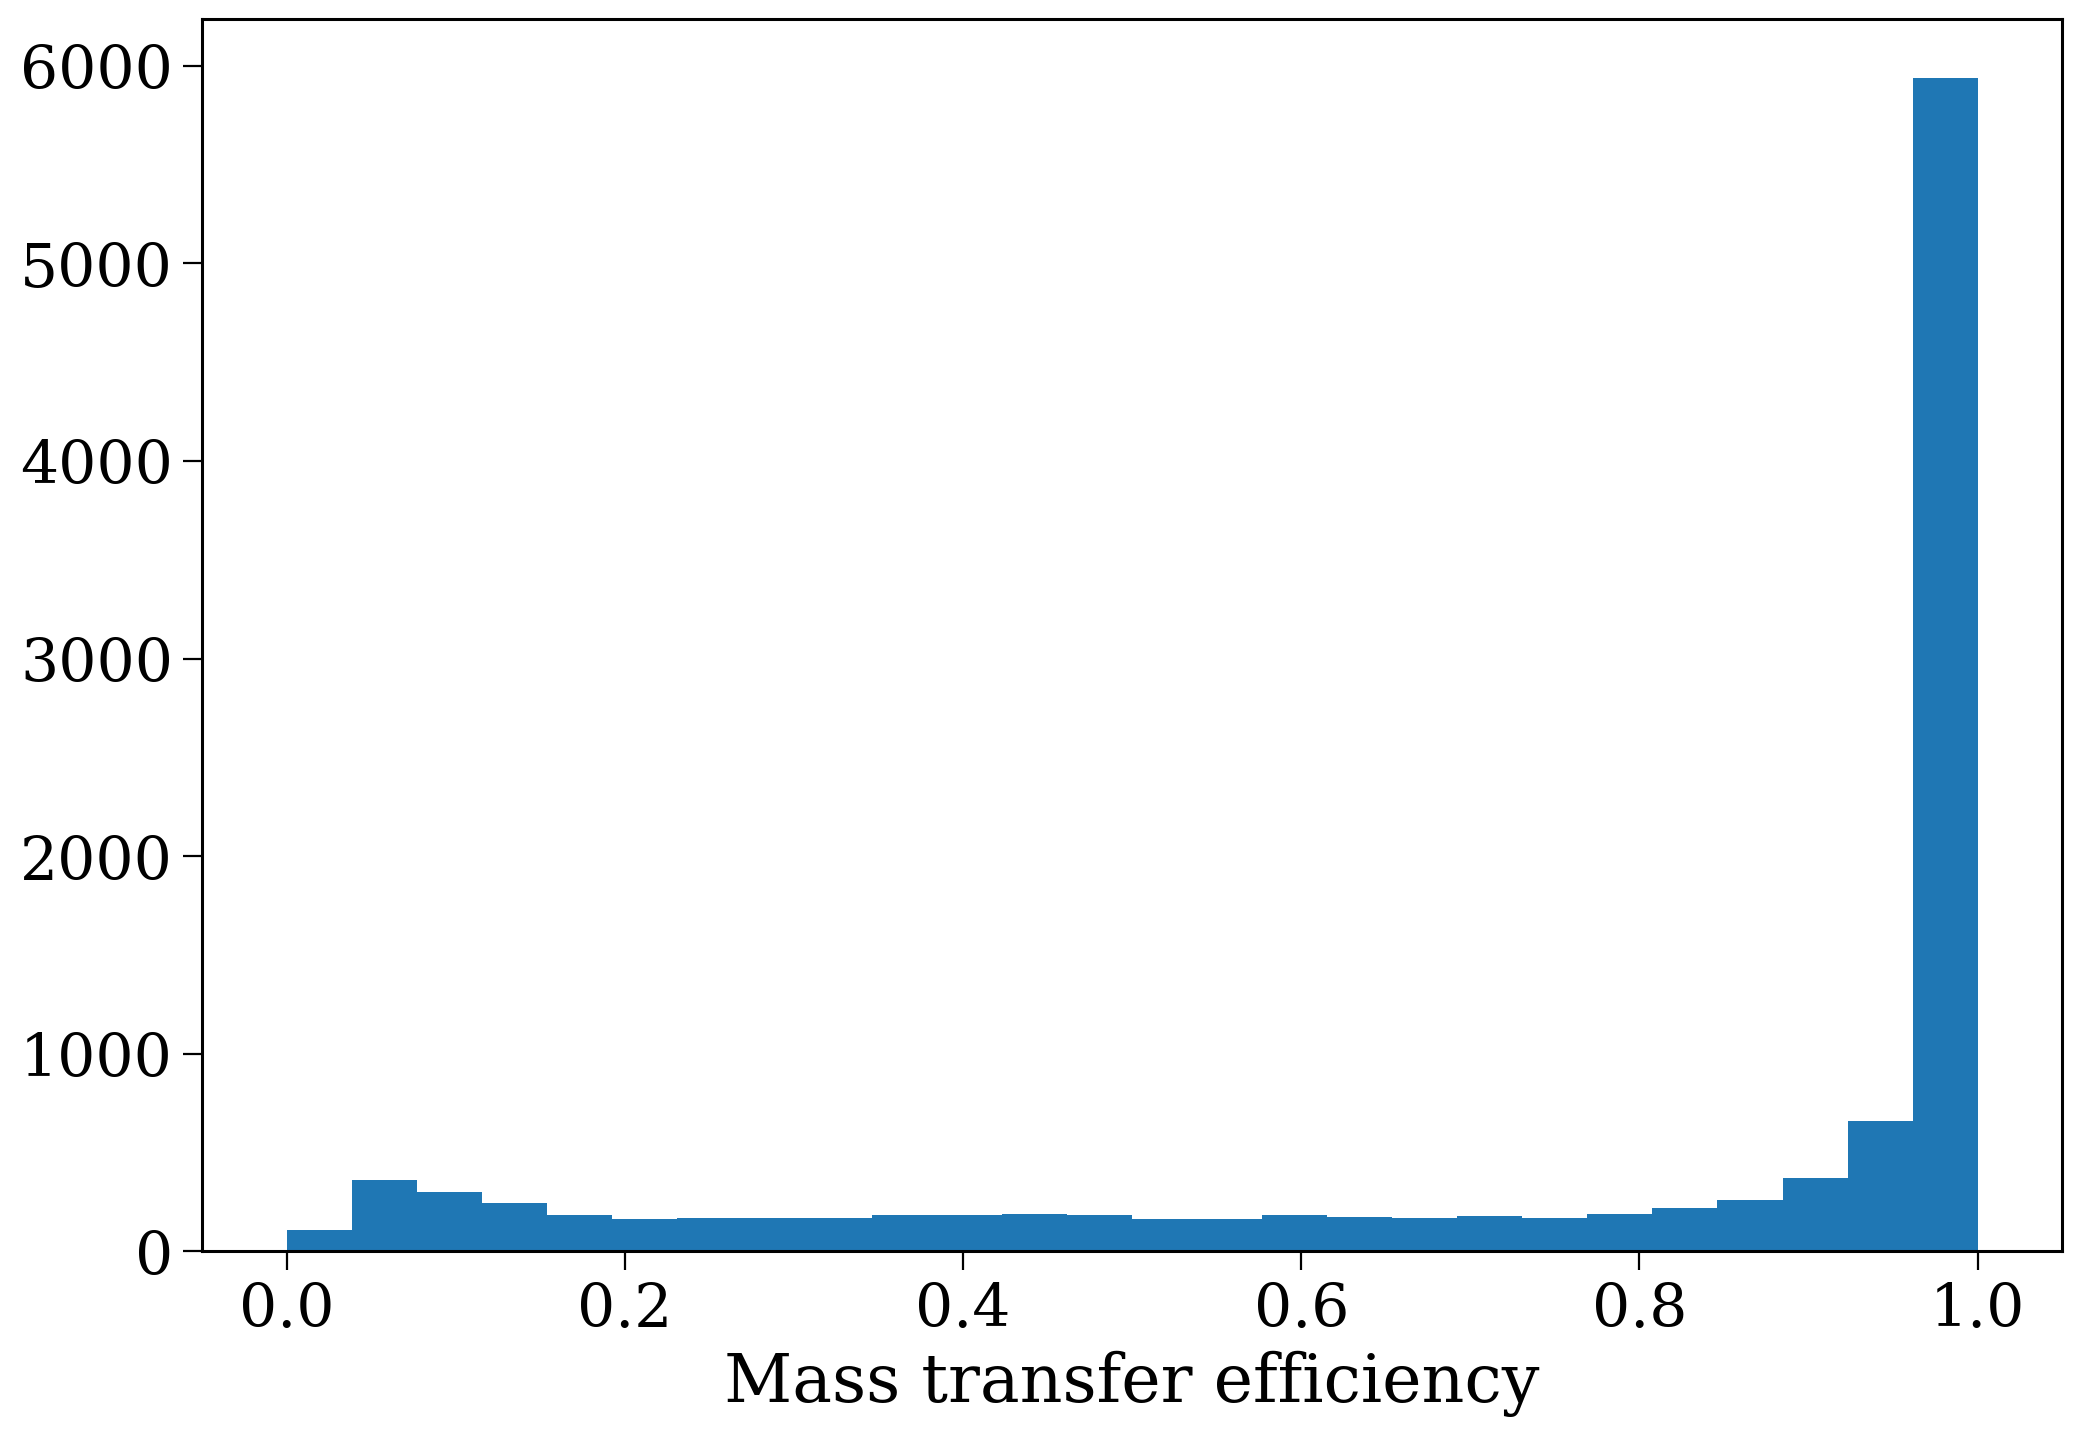

In [94]:
plt.hist(betas, range=(0, 1), bins="fd")
plt.xlabel("Mass transfer efficiency")
plt.show()

# Fractions

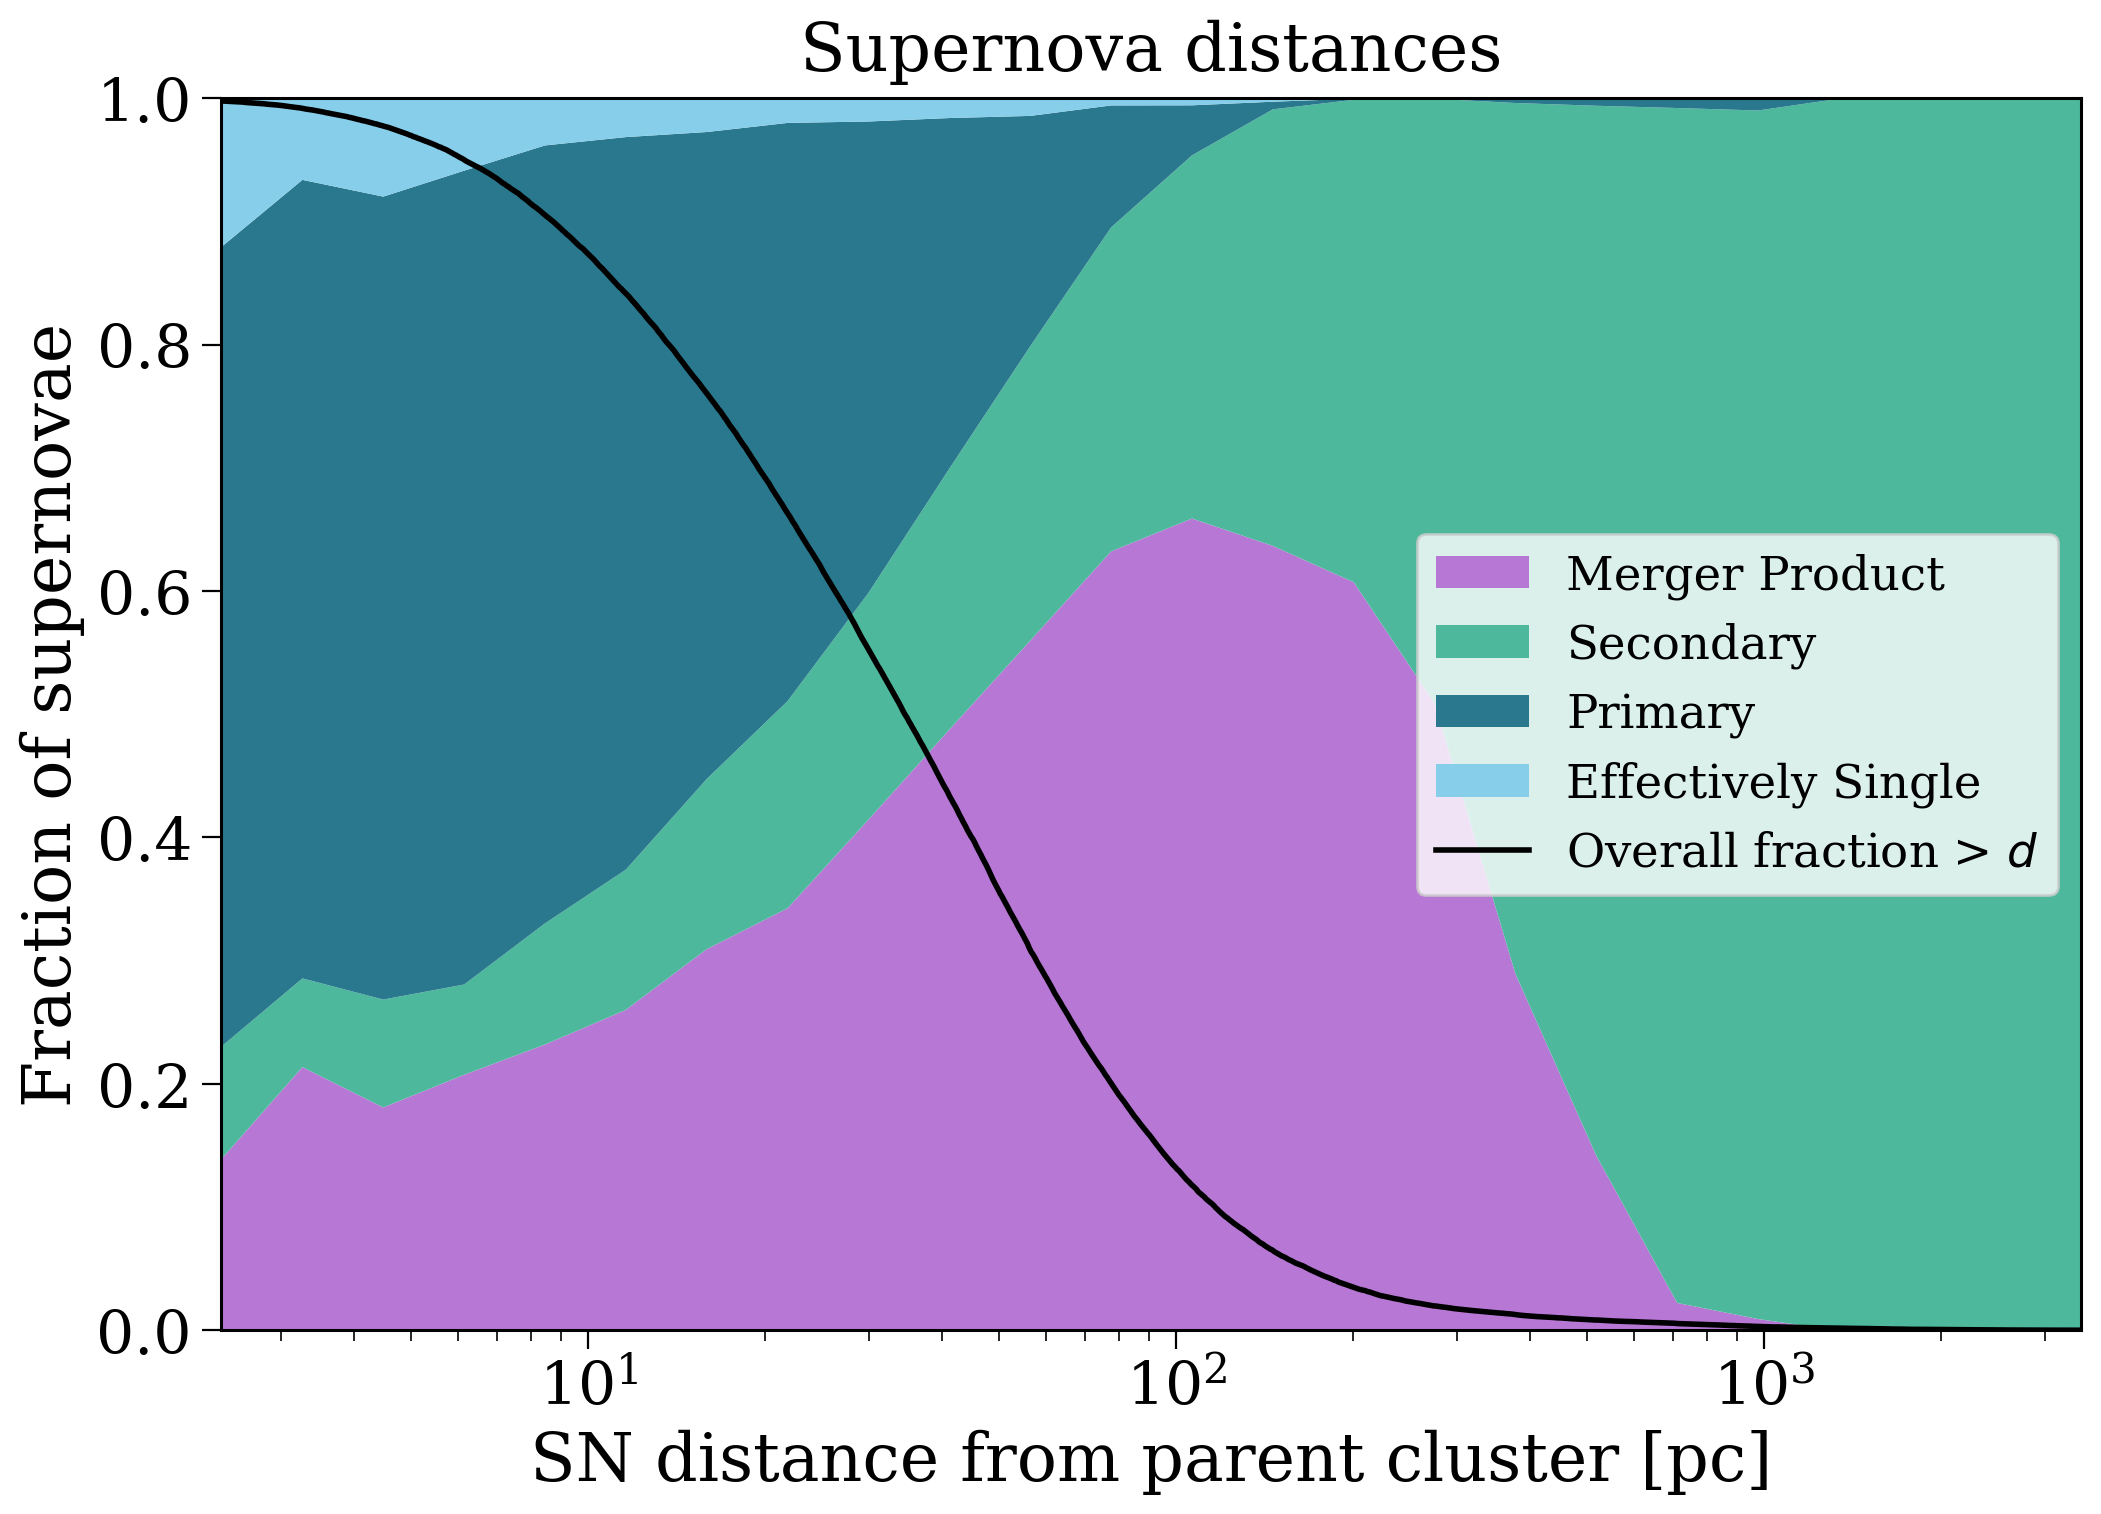

In [145]:
fig, ax = plt.subplots()

bins = np.geomspace(2e0, 4e3, 25)
bin_centres, widths = plotting.get_centres_widths(bins)

data, weights = plotting.get_data_and_weights(p, "distance")

hists = np.array([np.histogram(d, weights=w, bins=bins)[0].astype(float) for d, w in zip(data, weights)])
norm_hists = hists / hists.sum(axis=0)

bottom = np.zeros(hists.shape[1])
for h, c, l in zip(norm_hists, plotting.colours, plotting.labels):
    ax.fill_between(x=bin_centres, y1=bottom, y2=h + bottom, color=c, label=l, lw=0)
    bottom += h
    
detail_bins = np.geomspace(bins[0], bins[-1], 1000)
detail_bin_centres, _ = plotting.get_centres_widths(detail_bins)

hists = np.array([np.histogram(d, bins=detail_bins)[0].astype(float) for d in data])
chist = np.sum([np.sum(h) - np.cumsum(h) for h in hists], axis=0)
chist /= chist[0]

ax.plot(detail_bin_centres, chist, color="black", lw=2, label=r"Overall fraction > $d$")
    
ax.set(xscale="log", xlim=bin_centres[[0, -1]], ylim=(0, 1),
       xlabel=plotting.xlabel["distance"], ylabel="Fraction of supernovae")
ax.legend(loc="center right", fontsize=0.7*fs)
ax.set_title("Supernova distances", fontsize=fs, pad=10)
plt.show()

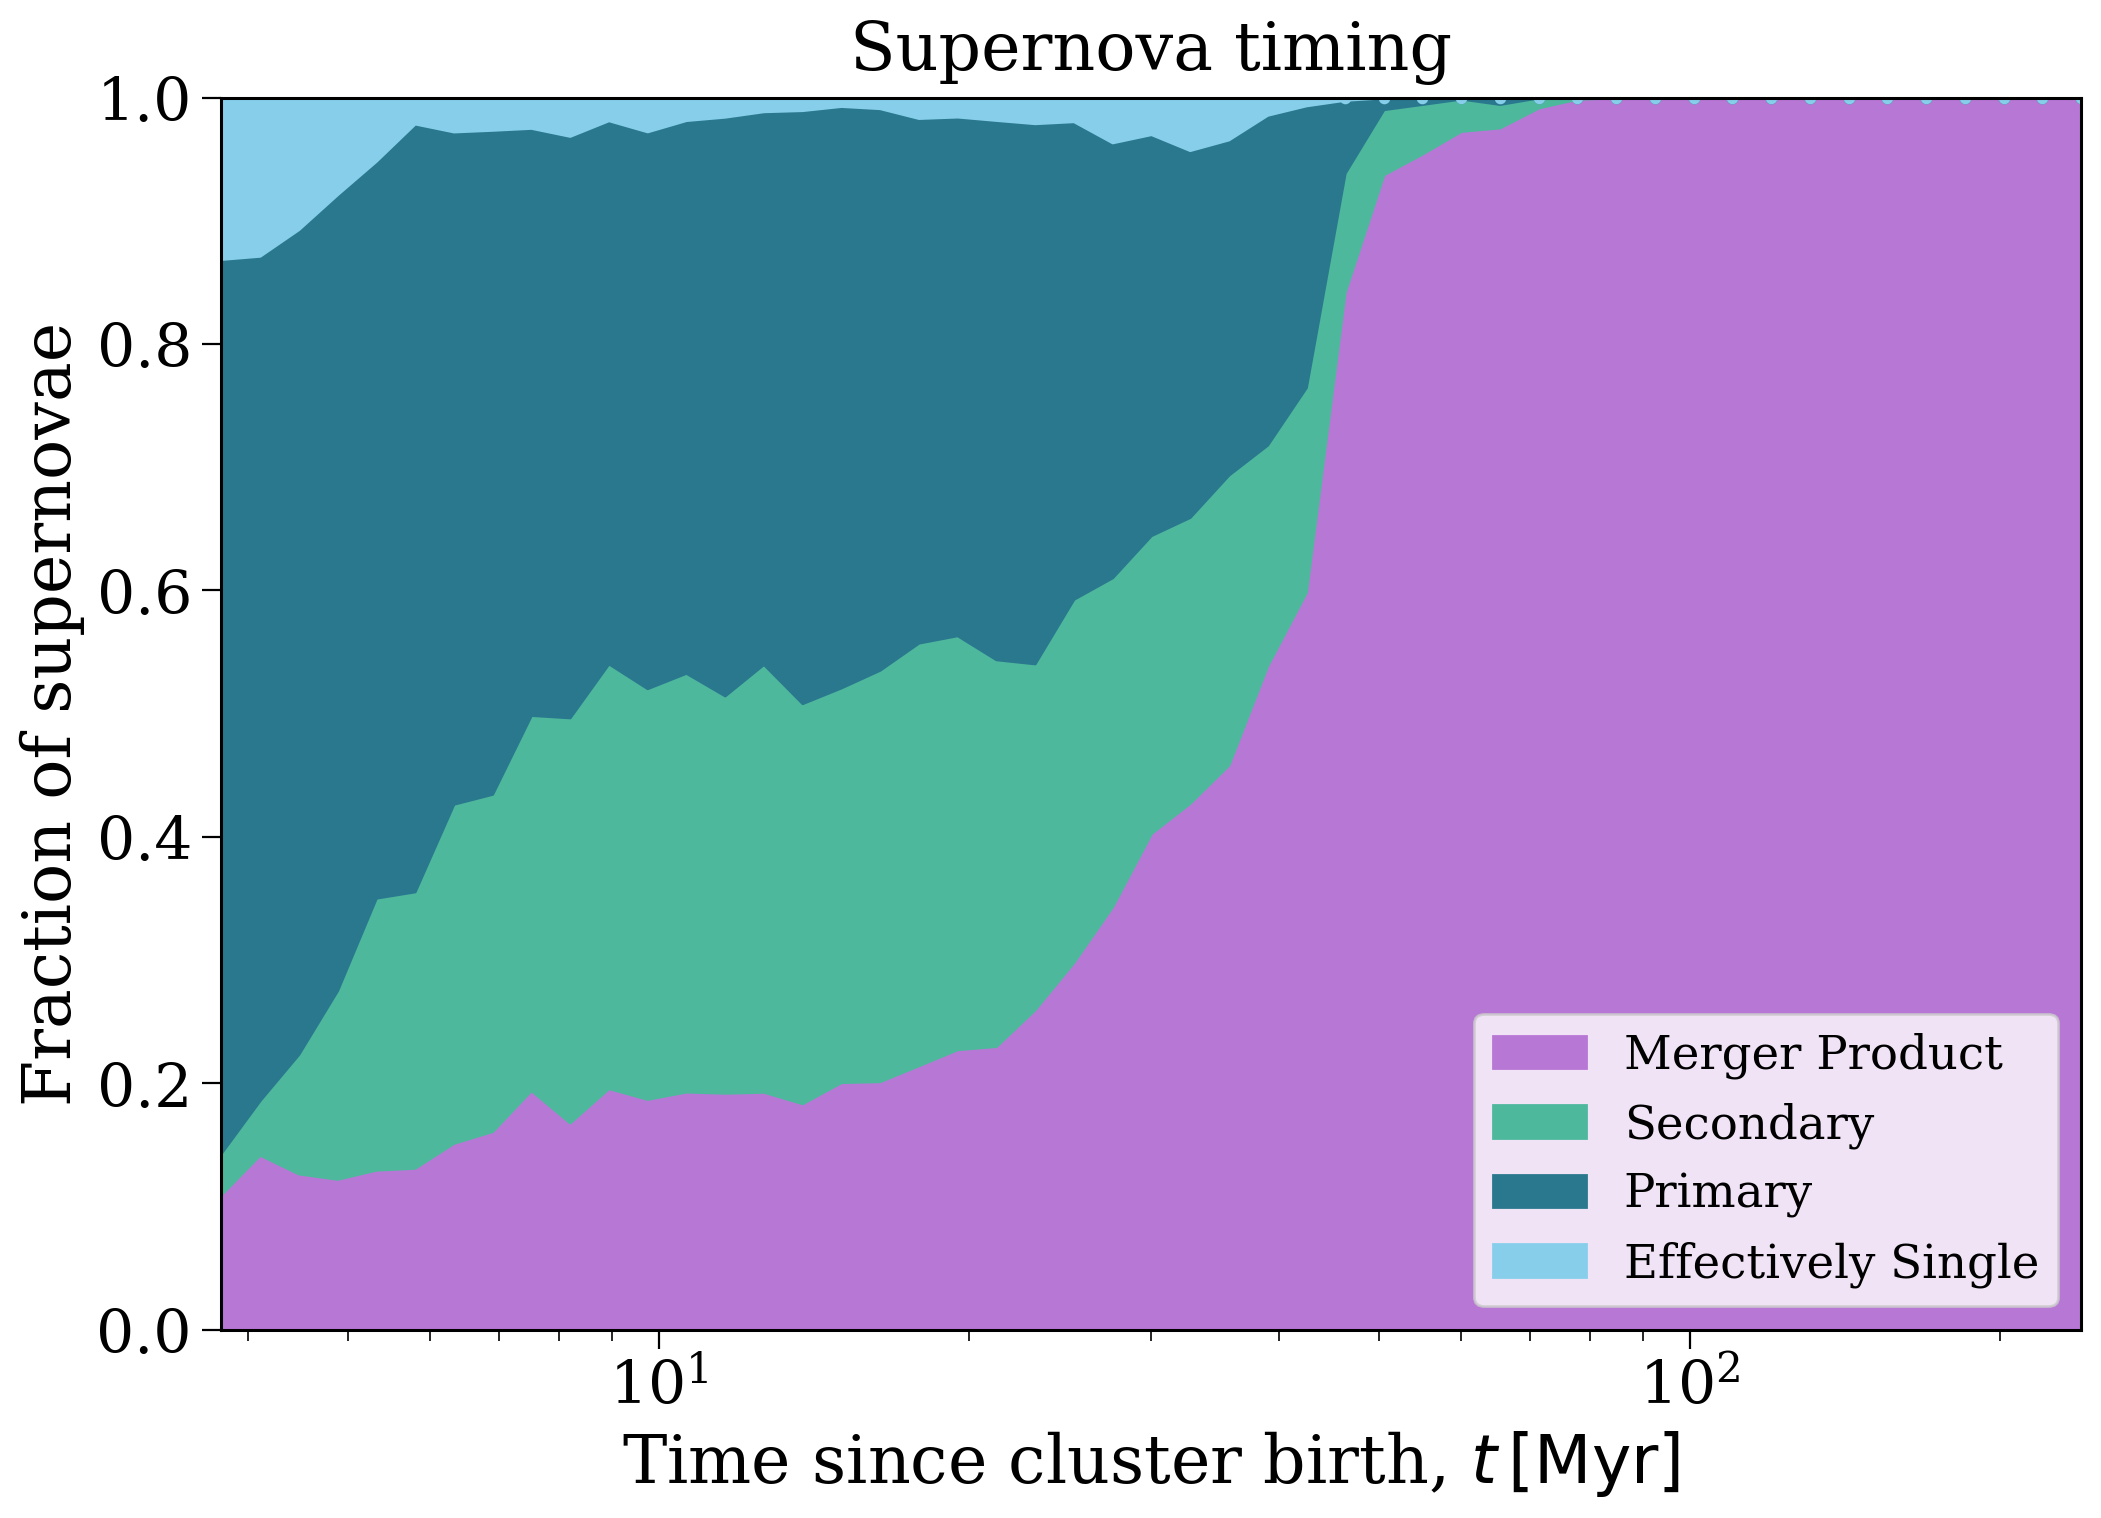

In [144]:
fig, ax = plt.subplots()

bins = np.geomspace(3.6, 250, 50)
bin_centres, widths = plotting.get_centres_widths(bins)

data, weights = plotting.get_data_and_weights(p, "time", widths)

hists = np.array([np.histogram(d, weights=w, bins=bins)[0].astype(float) for d, w in zip(data, weights)])
norm_hists = hists / hists.sum(axis=0)

bottom = np.zeros(hists.shape[1])
for h, c, l in zip(norm_hists, plotting.colours, plotting.labels):
    ax.fill_between(x=bin_centres, y1=bottom, y2=h + bottom, color=c, label=l, lw=1)
    ax.scatter(bin_centres, h + bottom, color=c, marker="o", s=10)
    bottom += h
ax.set(xscale="log", xlim=bin_centres[[0, -1]], ylim=(0, 1),
       xlabel=plotting.xlabel["time"], ylabel="Fraction of supernovae")
ax.set_title("Supernova timing", fontsize=fs, pad=10)
ax.legend(loc="lower right", fontsize=0.7*fs)
plt.show()

# CE Fractions

In [185]:
ce_rows = p.bpp[p.bpp["evol_type"] == 7].drop_duplicates(subset="bin_num", keep="first")

In [199]:
p.had_ce = np.isin(p.bin_nums, p.bpp[p.bpp["evol_type"] == 7]["bin_num"].unique())
p.had_ce_before_sn1 = np.isin(p.bin_nums, ce_rows[ce_rows["kstar_1"] < 13]["bin_num"])

In [200]:
min_m1s = np.linspace(3, 10, 50)
fractions = []

for min_m1 in min_m1s:
    m1_mask = np.isin(p.bin_nums, p.initC[p.initC["mass_1"] > min_m1].index.values)

    n_sn_1 = np.isin(sn_rows_1["bin_num"], p.bin_nums[m1_mask]).sum()
    n_sn_1_ce = np.isin(sn_rows_1["bin_num"], p.bin_nums[p.had_ce_before_sn1 & m1_mask]).sum()

    n_sn_2 = np.isin(sn_rows_2["bin_num"], p.bin_nums[m1_mask]).sum()
    n_sn_2_ce = np.isin(sn_rows_2["bin_num"], p.bin_nums[p.had_ce & m1_mask]).sum()

    fractions.append((n_sn_1_ce + n_sn_2_ce) / (n_sn_1 + n_sn_2))

Text(0, 0.5, 'Fraction of supernova progenitors\nthat experienced CEs')

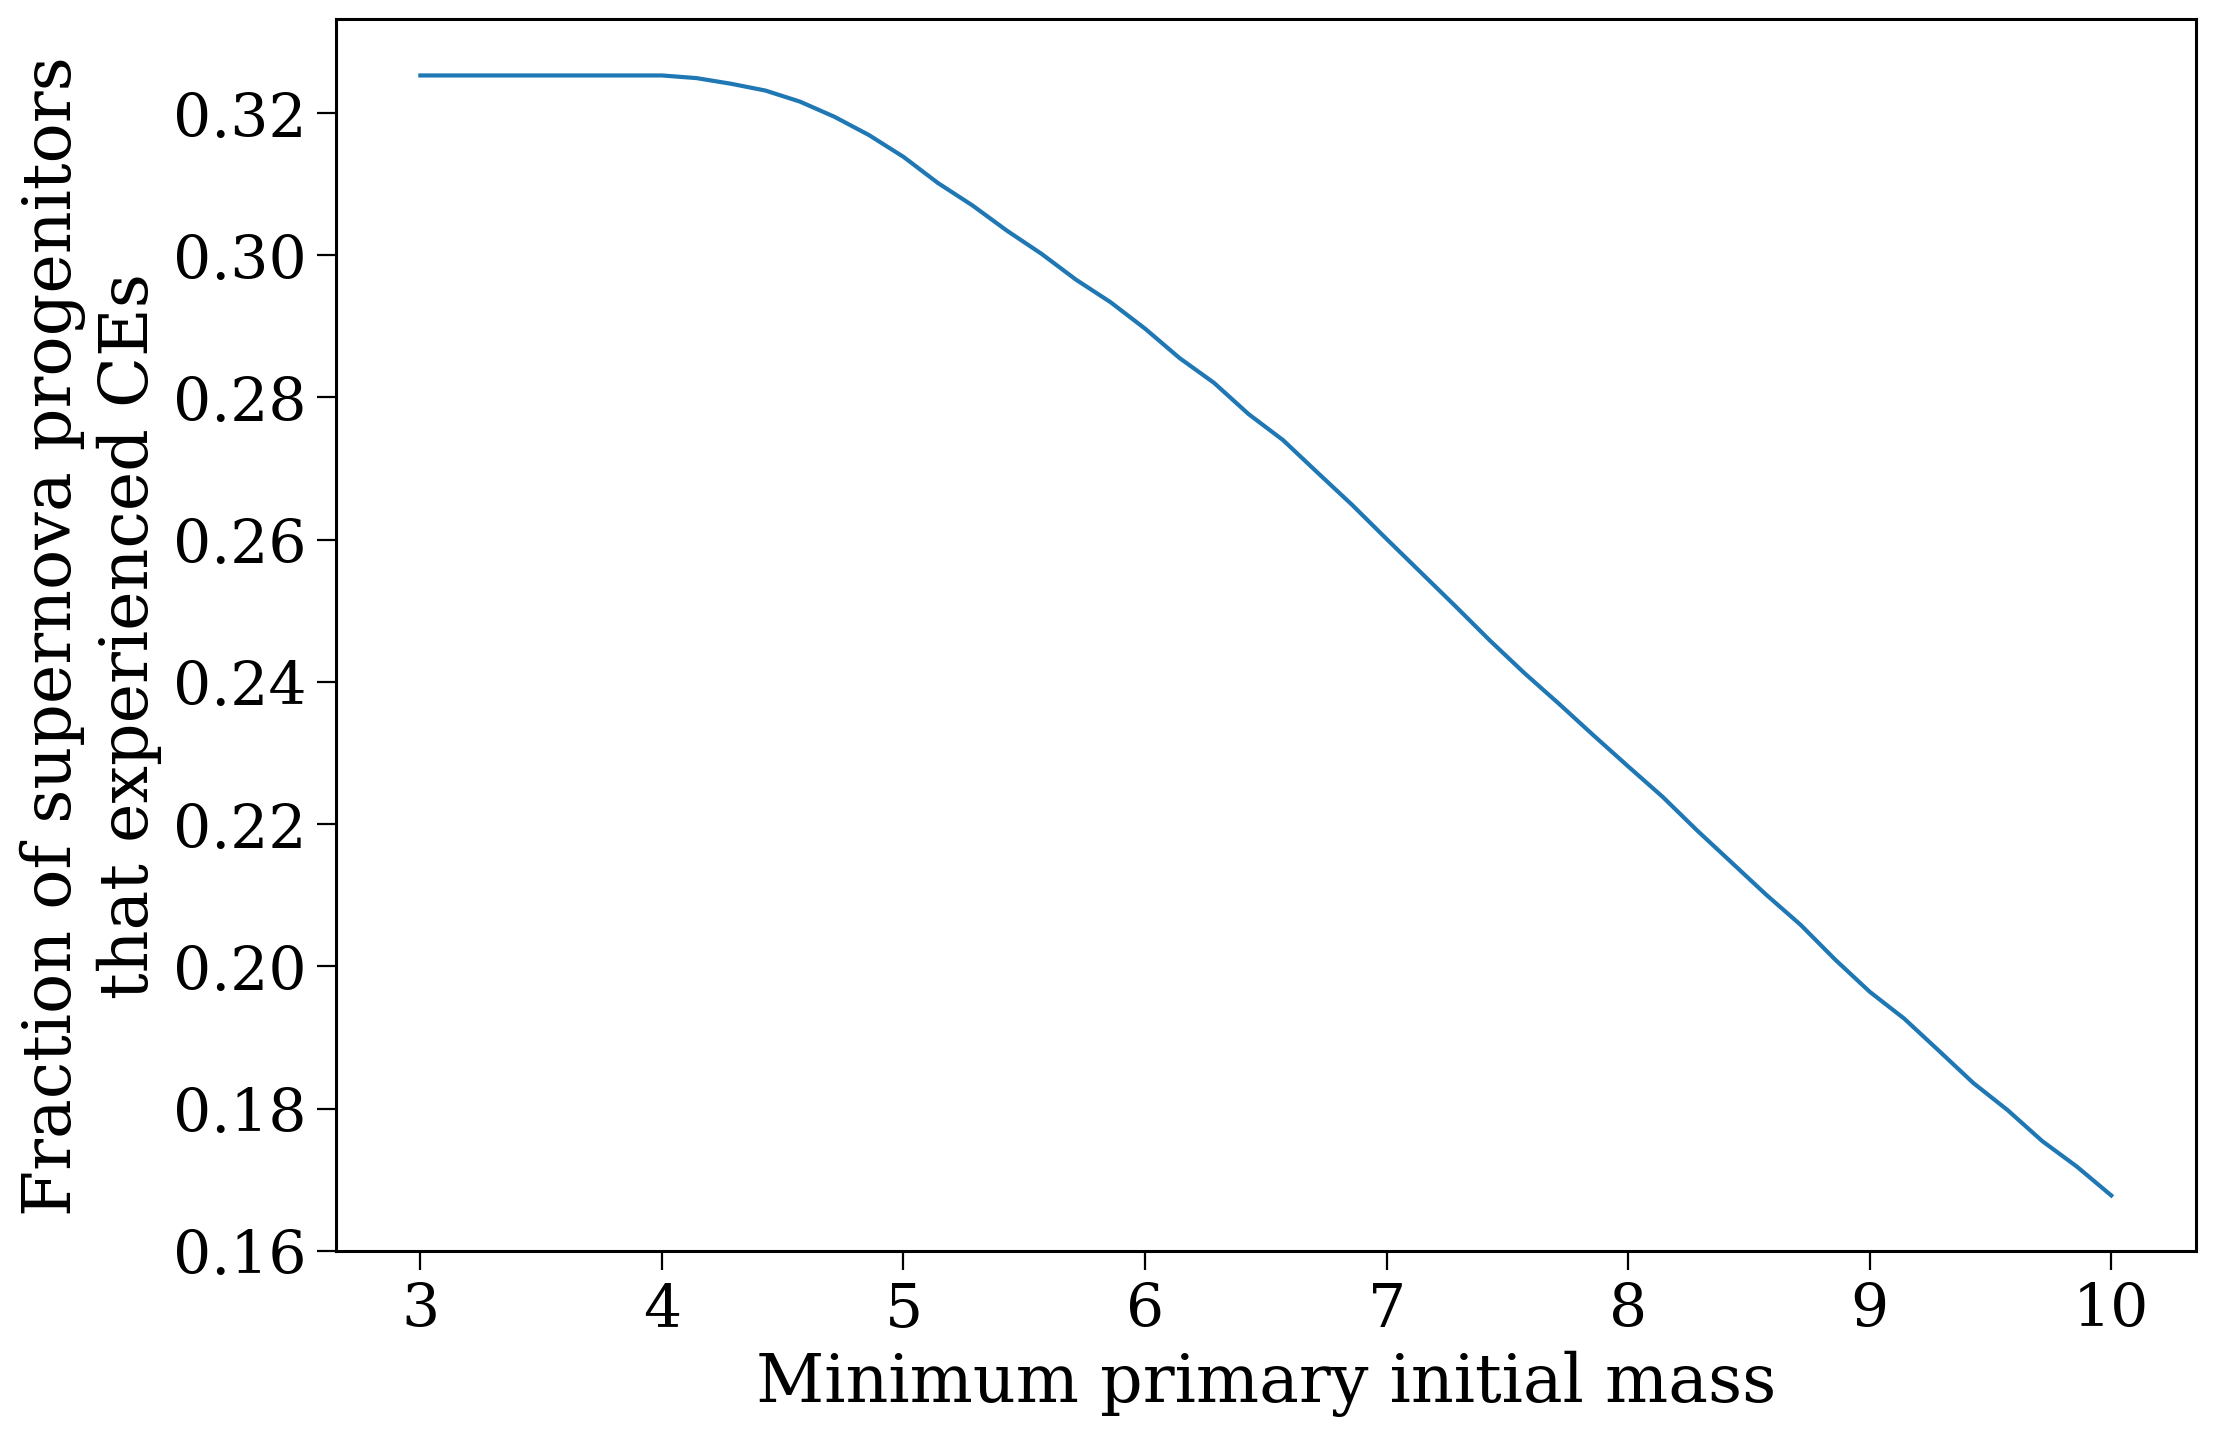

In [201]:
plt.plot(min_m1s, fractions)
plt.xlabel("Minimum primary initial mass")
plt.ylabel("Fraction of supernova progenitors\nthat experienced CEs")

# Effectively single stuff

In [15]:
no_rlof = p[p.bin_nums[~np.isin(p.bin_nums, p.bpp[(p.bpp["evol_type"] >= 3) & (p.bpp["evol_type"] <= 8)]["bin_num"].unique())]]

In [16]:
def get_relative_mass_gain(p, which_star="mass_1"):
    mass_change = p.bpp.groupby("bin_num")[which_star].diff().fillna(0.0)
    mass_change[mass_change < 0] = 0
    relative_mass_gain = mass_change.groupby(mass_change.index).sum() / p.initC[which_star]
    return relative_mass_gain * 100

(array([1.2329e+04, 2.6100e+02, 1.3300e+02, 7.4000e+01, 7.0000e+01,
        3.3000e+01, 2.2000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([0.        , 0.17499994, 0.34999989, 0.52499983, 0.69999977,
        0.87499972, 1.04999966, 1.2249996 , 1.39999955, 1.57499949,
        1.74999943]),
 <BarContainer object of 10 artists>)

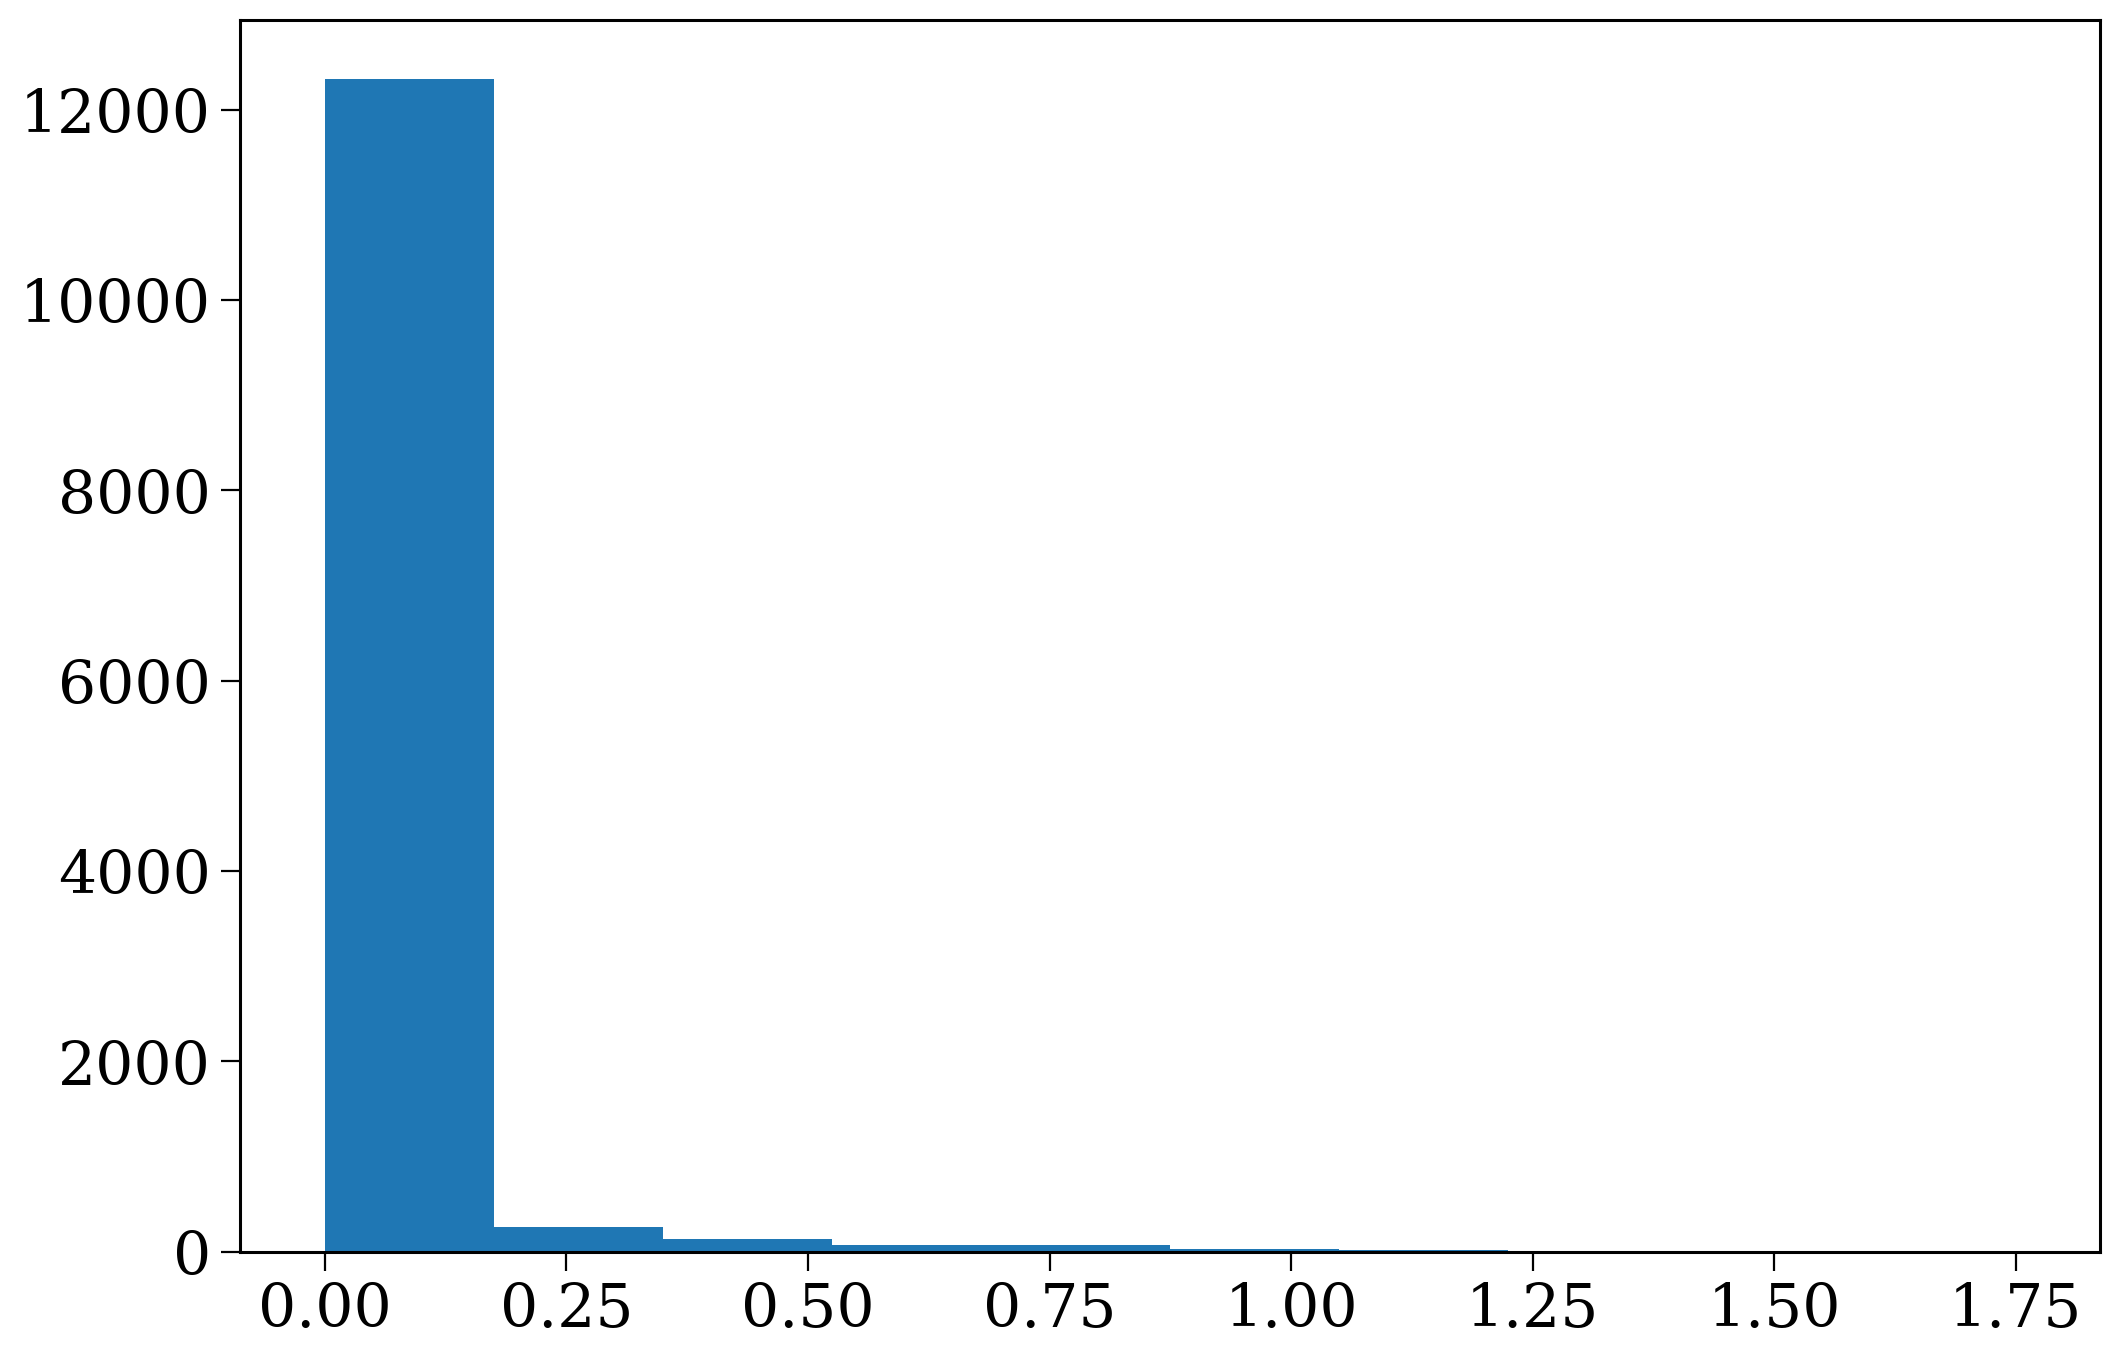

In [17]:
plt.hist(get_relative_mass_gain(no_rlof))

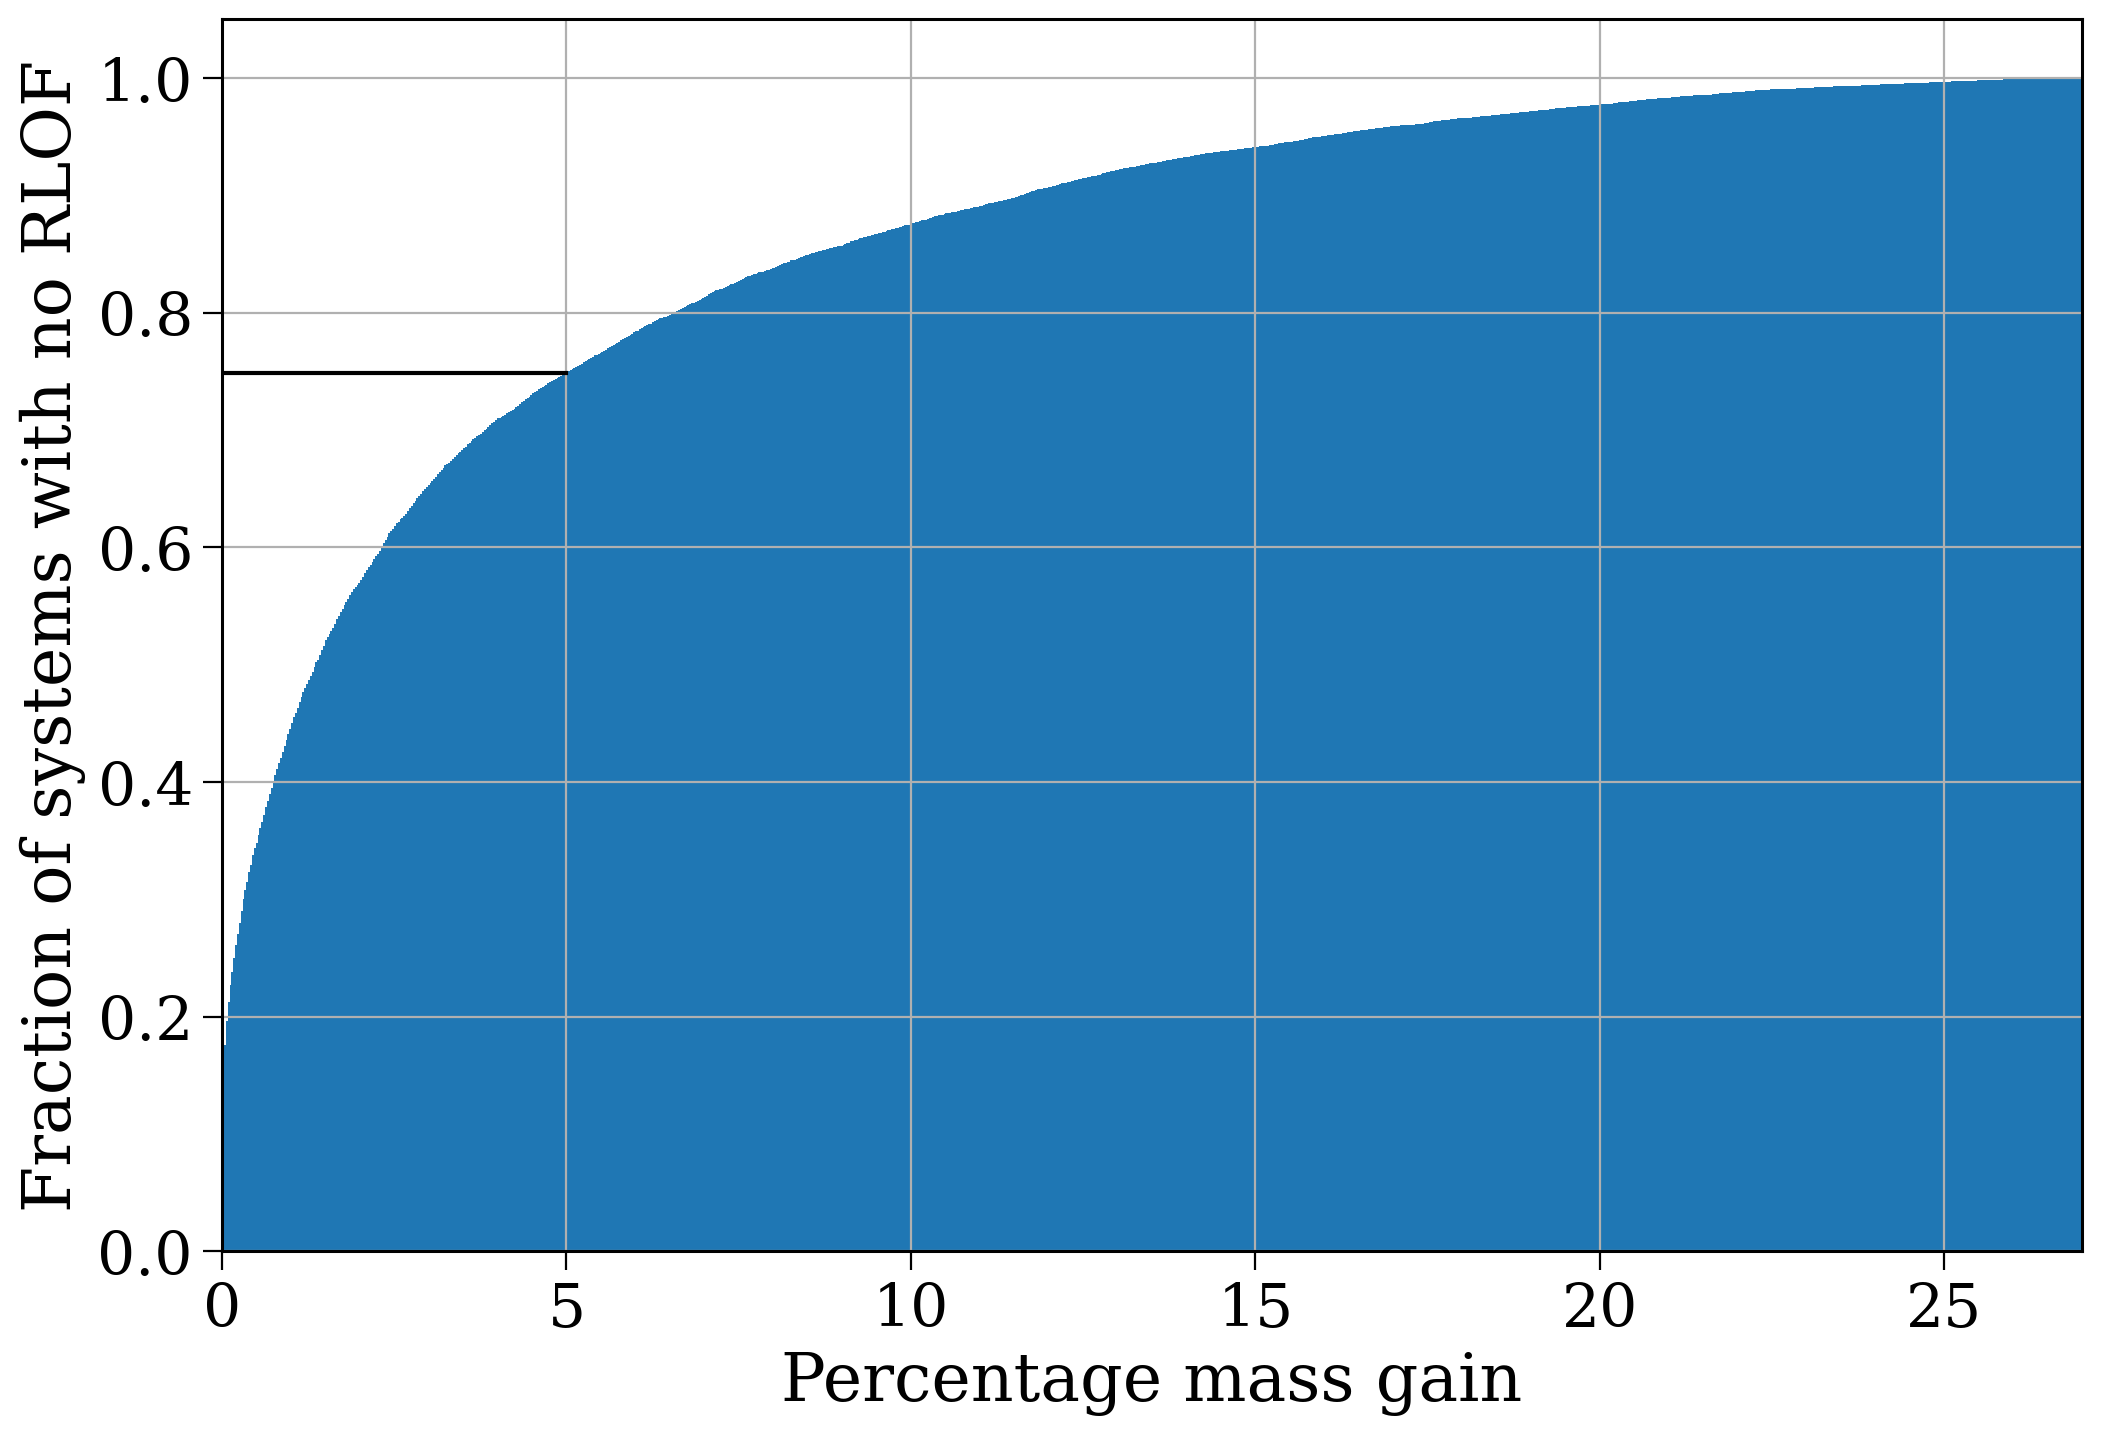

In [18]:
fig, ax = plt.subplots()

rmg = get_relative_mass_gain(no_rlof, "mass_2")
ax.hist(rmg, bins=1000, cumulative=True, density=True)
ax.plot([0, 5], [1 - len(rmg[rmg > 5]) / len(rmg), 1 - len(rmg[rmg > 5]) / len(rmg)], color="black")

ax.set(xlabel="Percentage mass gain", ylabel="Fraction of systems with no RLOF", xlim=(0, 27))

ax.grid()

plt.show()

In [19]:
def non_interacting_fraction(p):
    rlof_nums = p.bpp[(p.bpp["evol_type"] >= 3) & (p.bpp["evol_type"] <= 8)]["bin_num"].unique()
    interaction_nums = np.concatenate((rlof_nums, p.bpp["bin_num"][(p.bpp.groupby("bin_num")["mass_1"].diff().fillna(0.0) > 0.0)
                                                                   | (p.bpp.groupby("bin_num")["mass_2"].diff().fillna(0.0) > 0.0)].unique()))
    return 1 - len(np.unique(rlof_nums)) / len(p)

In [20]:
non_interacting_fraction(p)

0.17027774121363692

# RLOF stellar type

In [112]:
rlof_rows = p.bpp[p.bpp["evol_type"] == 3].copy()
rlof_onto_2 = rlof_rows[rlof_rows["RRLO_1"] >= 1.0]
rlof_onto_1 = rlof_rows[rlof_rows["RRLO_2"] >= 1.0]

for rows, label, key in zip([rlof_onto_2, rlof_onto_1], ["secondary", "primary"], ["kstar_2", "kstar_1"]):
    print(f"RLOF onto {label} ({len(rows)} RLOF events)")
    init_stuff = p.initC.loc[rows.bin_num]
    init_q = init_stuff["mass_2"] / init_stuff["mass_1"]
    rlof_kstars = rows[key].value_counts()
    for i in range(len(rlof_kstars)):
        print(f'\t{cogsworth.utils.kstar_translator[rlof_kstars.index[i].astype(int)]["short"]}      \t{rlof_kstars.values[i] / len(rlof_onto_2) * 100:1.2f}%\t{np.mean(init_q[rows[key] == rlof_kstars.index[i]]):1.3f}')

RLOF onto secondary (83950 RLOF events)
	MS      	95.18%	0.572
	MS < 0.7      	2.07%	0.128
	COWD      	0.96%	0.870
	CHeB      	0.86%	0.967
	HeMS      	0.33%	0.830
	NS      	0.23%	0.908
	ONeWD      	0.16%	0.927
	HG      	0.09%	0.934
	HeHG      	0.03%	0.874
	EAGB      	0.03%	0.998
	FGB      	0.02%	0.943
	BH      	0.02%	0.561
	TPAGB      	0.01%	0.999
RLOF onto primary (28195 RLOF events)
	HeMS      	13.76%	0.804
	COWD      	12.13%	0.649
	ONeWD      	3.68%	0.636
	NS      	2.07%	0.631
	HeHG      	1.13%	0.775
	BH      	0.64%	0.653
	CHeB      	0.09%	0.697
	MS      	0.06%	0.815
	HG      	0.02%	0.782
	HeGB      	0.00%	0.879
	TPAGB      	0.00%	1.000


In [302]:
rlof_rows = p.bpp[p.bpp["evol_type"] == 3].copy()
rlof_onto_2 = rlof_rows[rlof_rows["RRLO_1"] >= 1.0]
rlof_onto_1 = rlof_rows[rlof_rows["RRLO_2"] >= 1.0]

for rows, label, key in zip([rlof_onto_2, rlof_onto_1], ["secondary", "primary"], ["kstar_1", "kstar_2"]):
    print(f"RLOF onto {label} ({len(rows)} RLOF events)")
    init_stuff = p.initC.loc[rows.bin_num]
    init_q = init_stuff["mass_2"] / init_stuff["mass_1"]
    rlof_kstars = rows[key].value_counts()
    for i in range(len(rlof_kstars)):
        print(f'\t{cogsworth.utils.kstar_translator[rlof_kstars.index[i].astype(int)]["short"]}      \t{rlof_kstars.values[i] / len(rlof_onto_2) * 100:1.2f}%\t{np.mean(init_q[rows[key] == rlof_kstars.index[i]]):1.3f}')

RLOF onto secondary (83950 RLOF events)
	HG      	38.61%	0.583
	MS      	23.81%	0.558
	HeHG      	18.05%	0.575
	EAGB      	7.05%	0.551
	FGB      	6.11%	0.548
	TPAGB      	5.21%	0.592
	CHeB      	0.88%	0.563
	HeGB      	0.14%	0.791
	COWD      	0.07%	0.814
	HeMS      	0.04%	0.886
	BH      	0.02%	0.561
	NS      	0.01%	0.679
	ONeWD      	0.01%	0.630
RLOF onto primary (28195 RLOF events)
	HG      	20.04%	0.705
	HeHG      	4.06%	0.747
	FGB      	3.40%	0.721
	MS      	2.84%	0.681
	HeMS      	2.03%	0.728
	TPAGB      	0.70%	0.845
	CHeB      	0.37%	0.796
	COWD      	0.08%	0.678
	EAGB      	0.03%	0.637
	MS < 0.7      	0.03%	0.133
	ONeWD      	0.01%	0.524
	NS      	0.01%	0.733
	BH      	0.01%	0.929
	HeGB      	0.00%	0.834


# CE Information

In [160]:
ce_rows = p.bpp[p.bpp["evol_type"] == 7].copy()
kstars = [4]
ce_rows = p.bpp[(p.bpp["evol_type"] == 3) & (((p.bpp["RRLO_1"] >= 1) & (p.bpp["kstar_1"].isin(kstars))) | ((p.bpp["RRLO_2"] >= 1) & (p.bpp["kstar_2"].isin(kstars))))].copy()
first_ce = ce_rows.drop_duplicates(subset="bin_num", keep="first")
second_ce = ce_rows.drop_duplicates(subset="bin_num", keep="last")

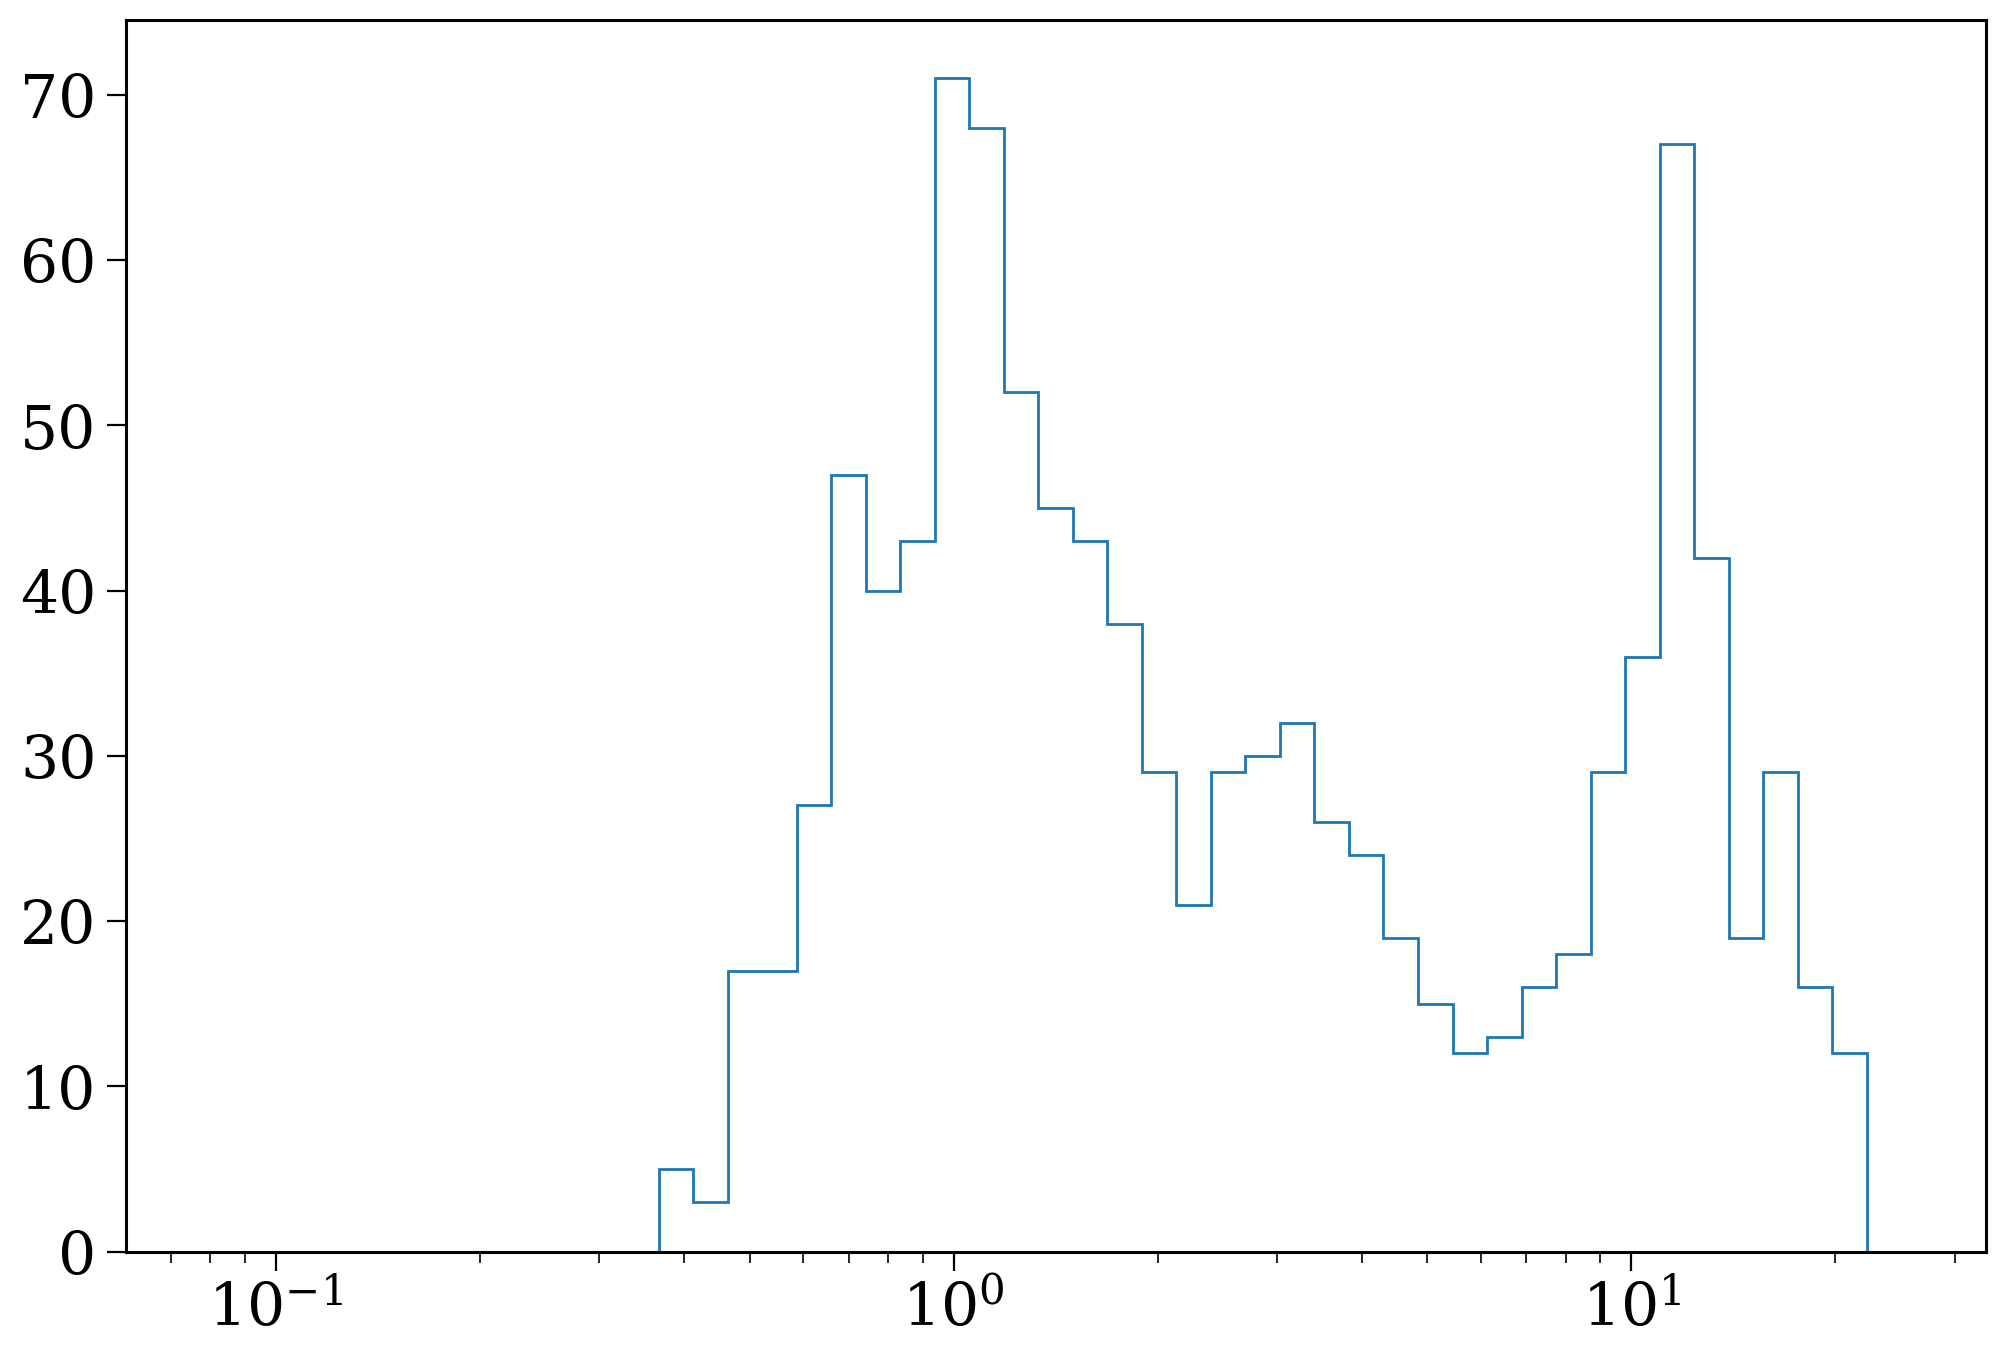

In [161]:
for rows in [ce_rows]:
    ce_donor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_1"], rows["mass_2"])
    ce_accretor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_2"], rows["mass_1"])
    q = ce_donor_mass / ce_accretor_mass
    plt.hist(q, bins=np.geomspace(0.08, 25, 50), histtype="step");
plt.xscale('log')
plt.show()

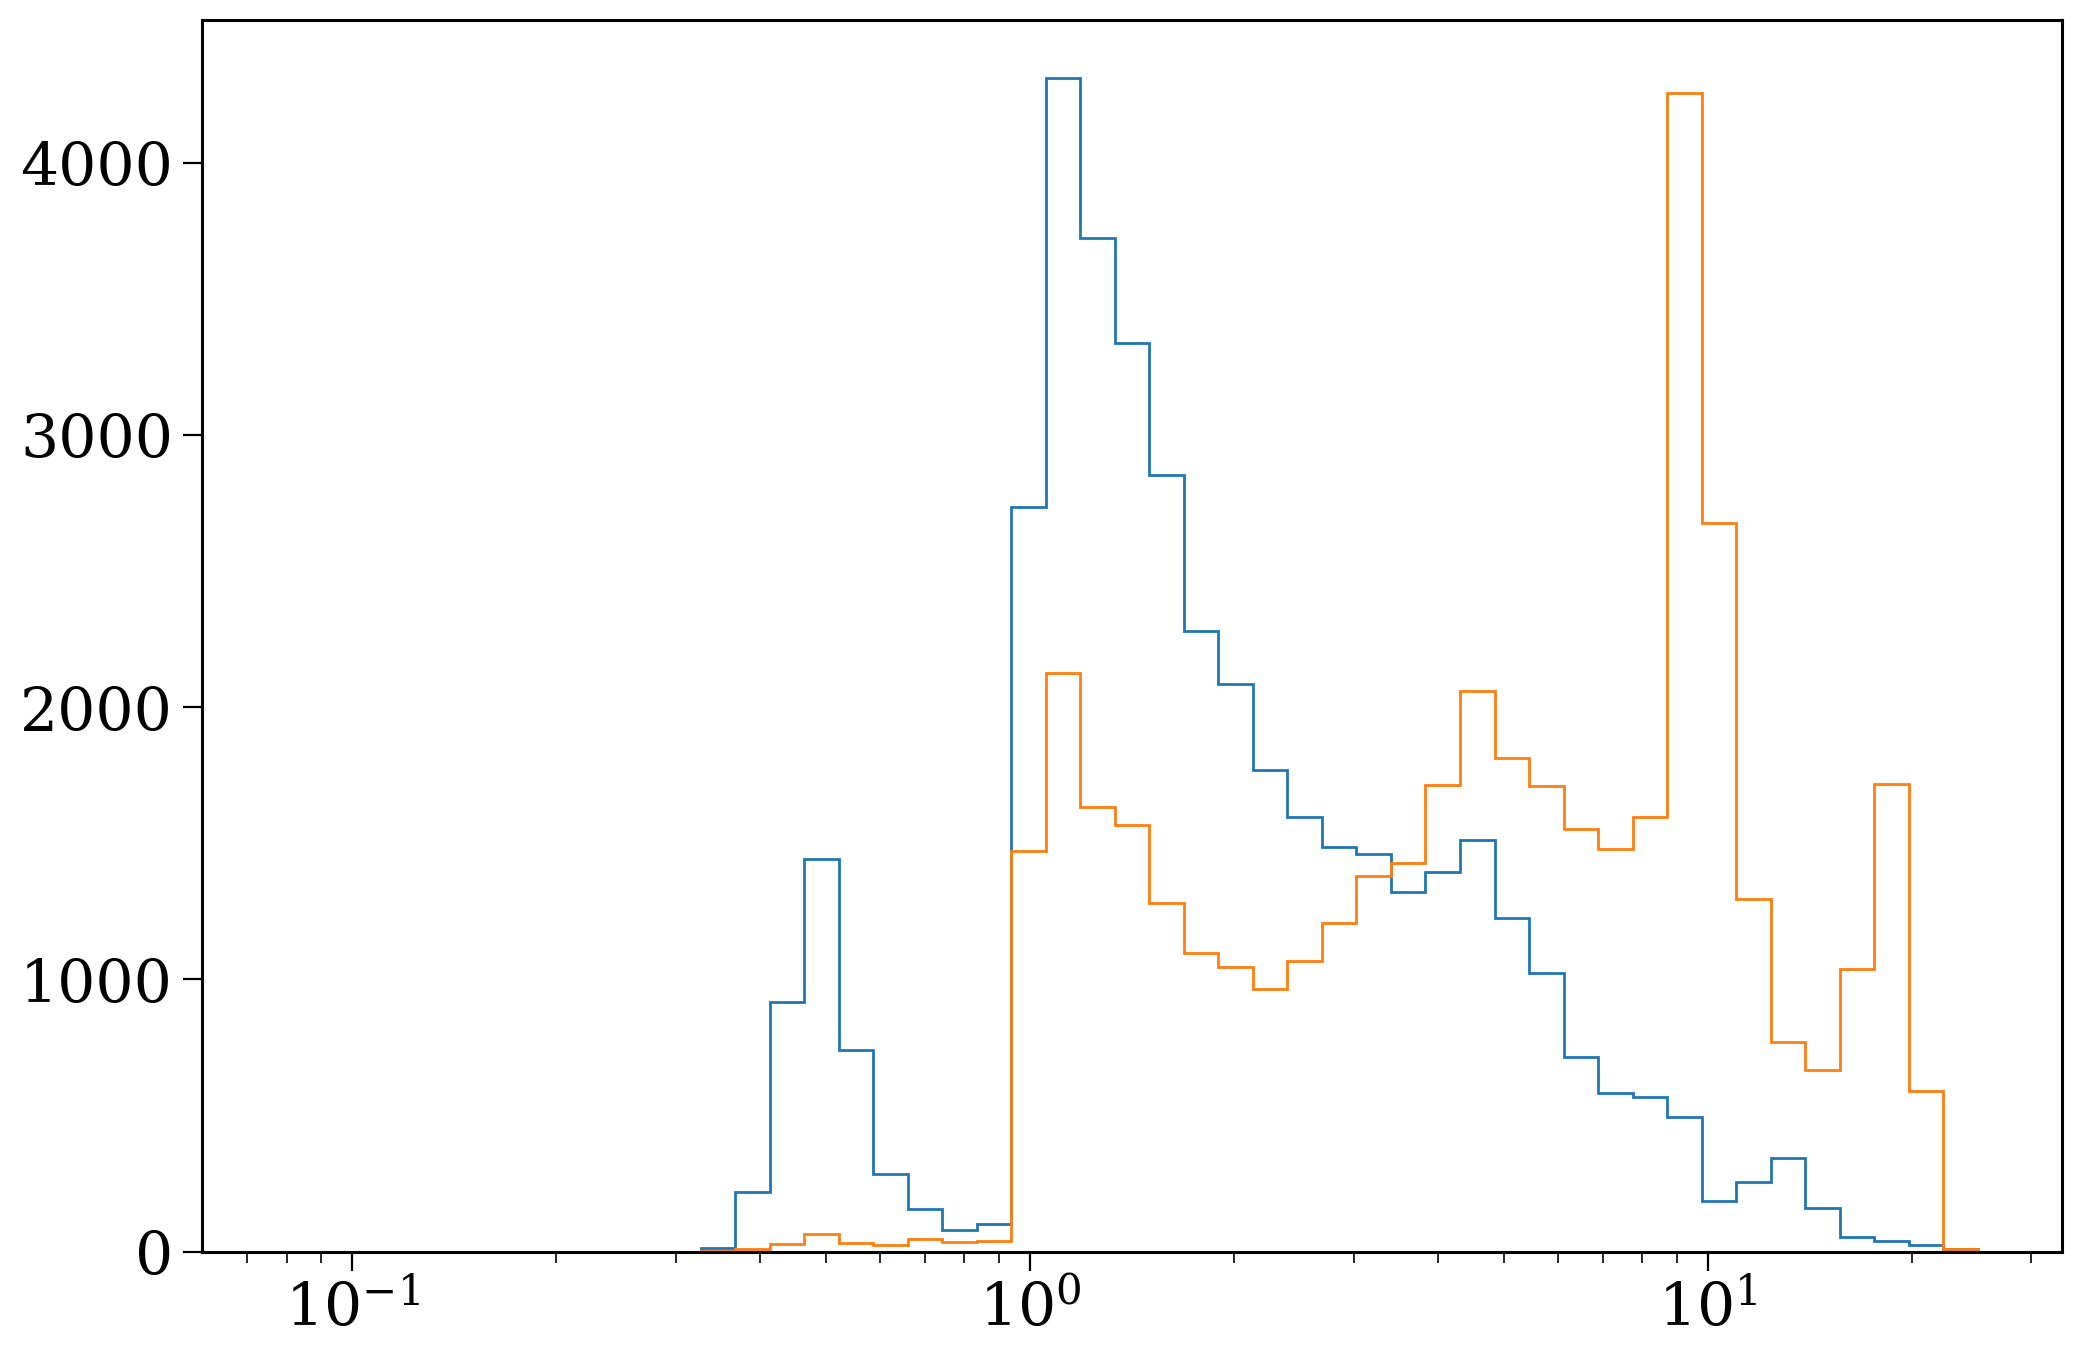

In [154]:
for rows in [first_ce, second_ce]:
    ce_donor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_1"], rows["mass_2"])
    ce_accretor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_2"], rows["mass_1"])
    q = ce_donor_mass / ce_accretor_mass
    plt.hist(q, bins=np.geomspace(0.08, 25, 50), histtype="step");
plt.xscale('log')
plt.show()

0.08677802227054428


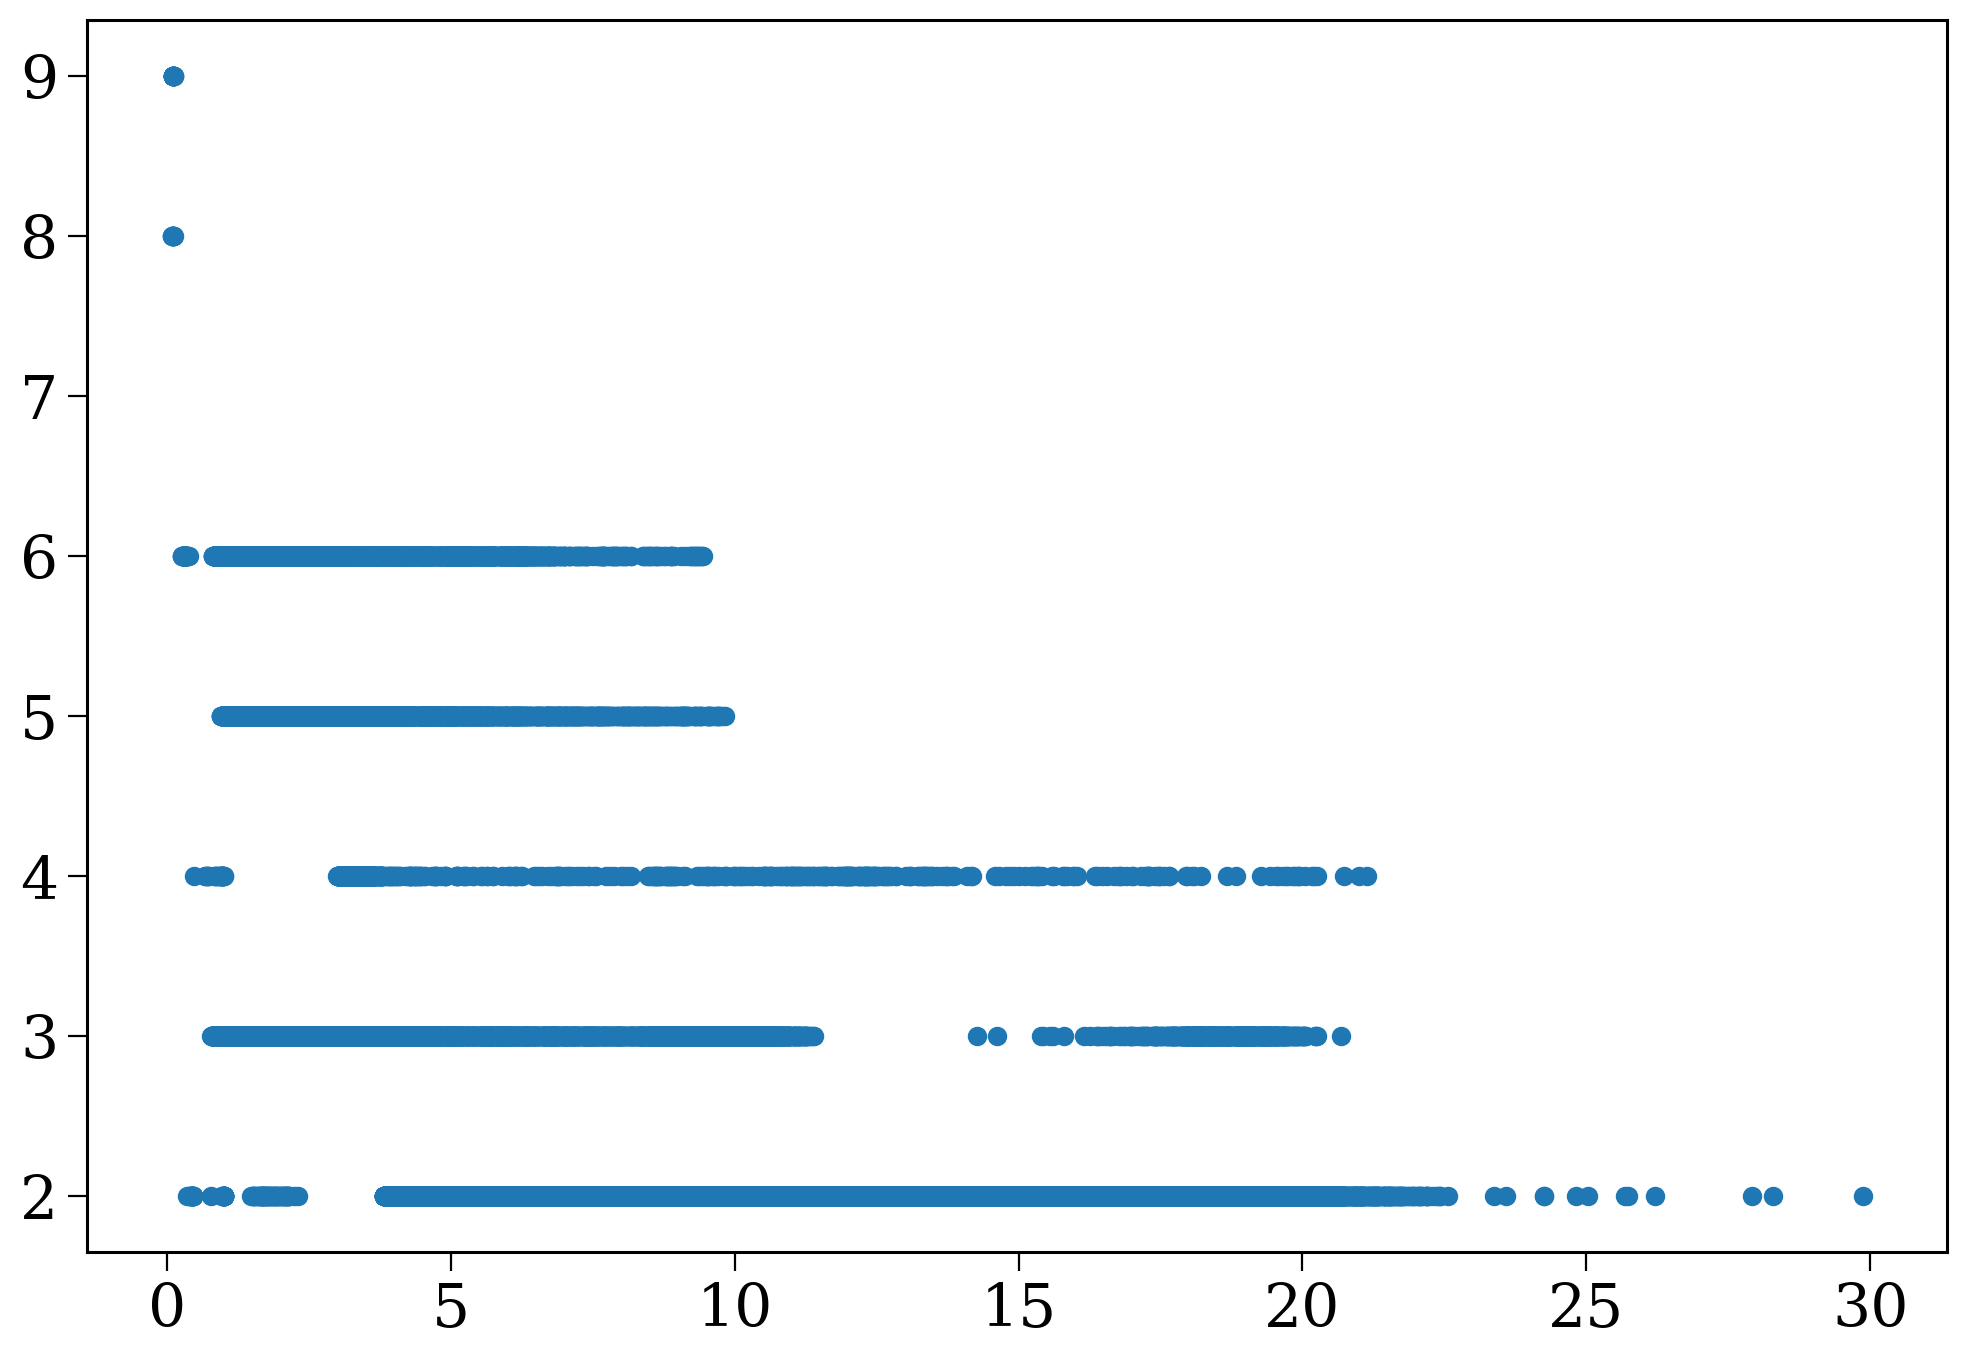

0.08677802227054428


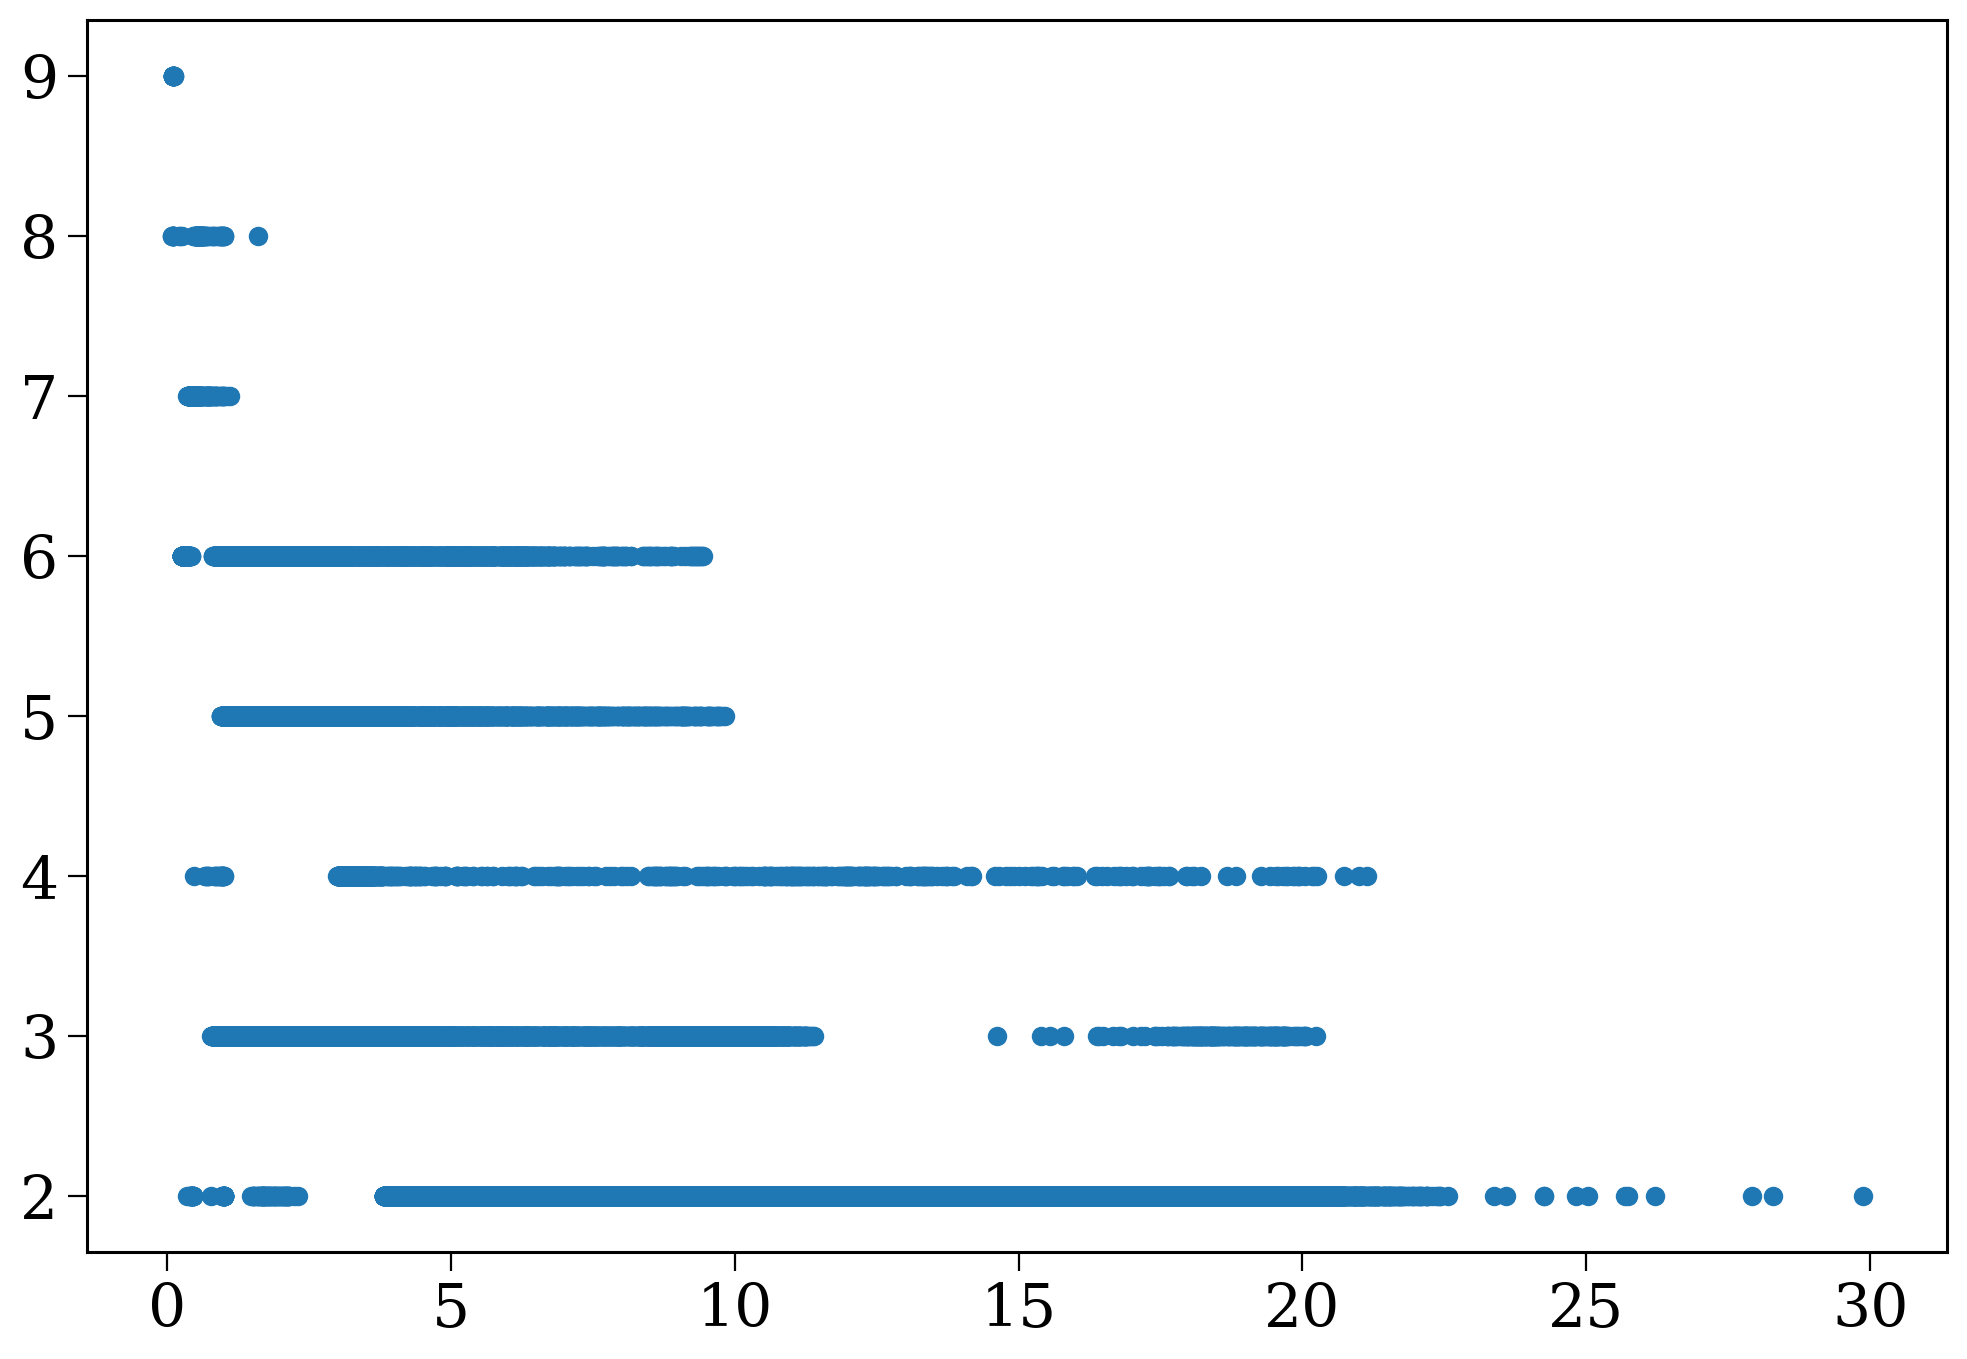

In [150]:
for rows in [first_ce, second_ce]:
    ce_donor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_1"], rows["mass_2"])
    ce_accretor_mass = np.where(rows["RRLO_1"] > 1, rows["mass_2"], rows["mass_1"])
    donor_kstar = np.where(rows["RRLO_1"] > 1, rows["kstar_1"], rows["kstar_2"])
    q = ce_donor_mass / ce_accretor_mass
    print(min(q))
    plt.scatter(ce_donor_mass / ce_accretor_mass, donor_kstar);
    plt.show()

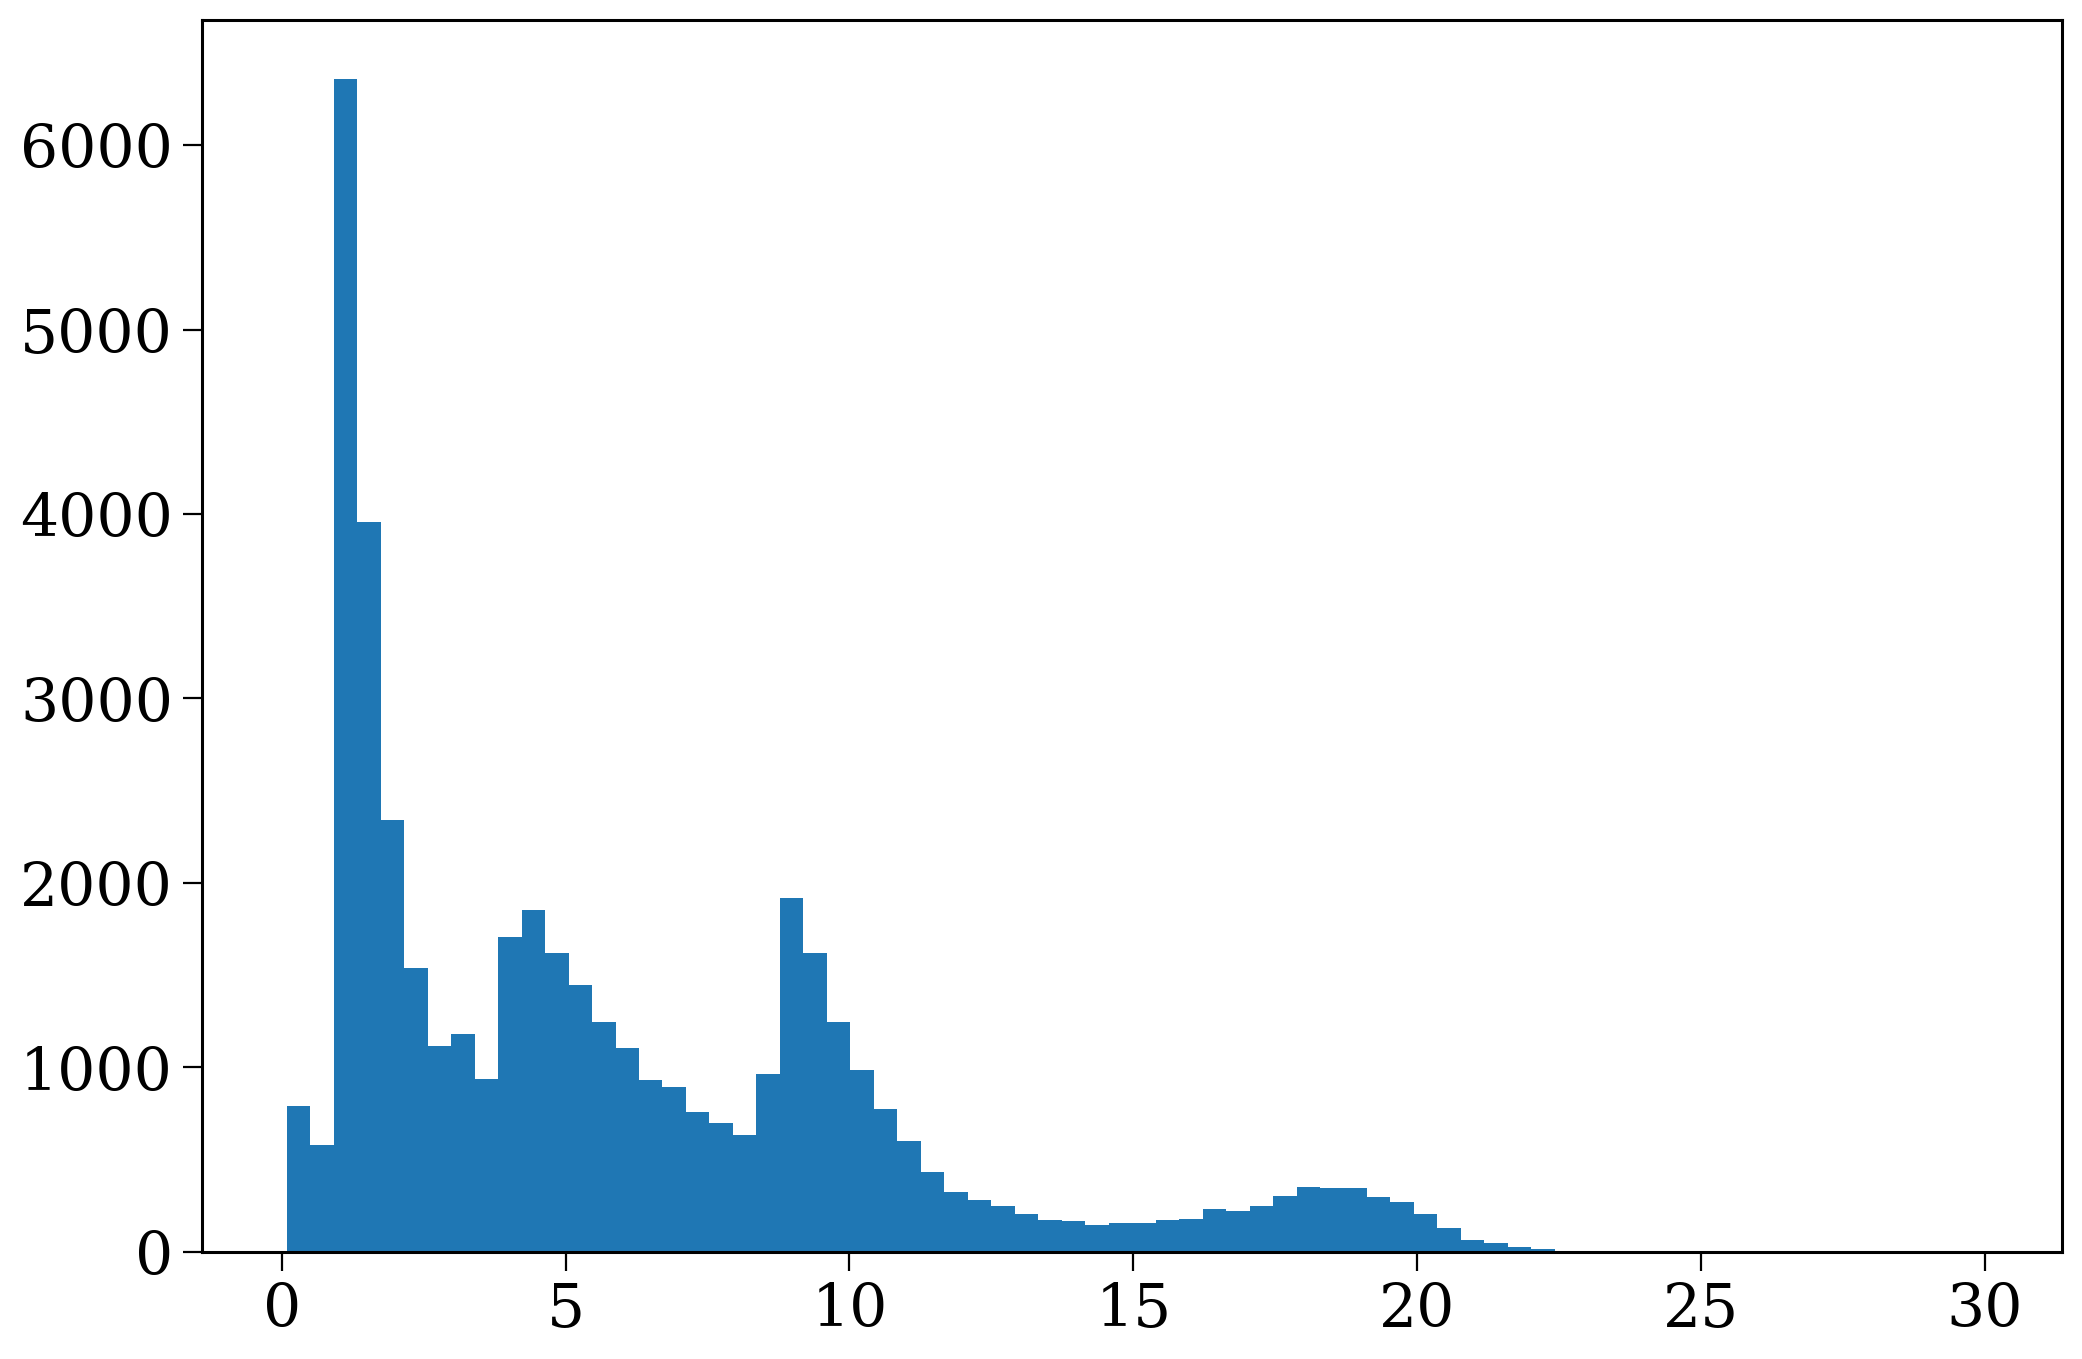

In [122]:
ce_rows["bin_num"].value_counts()

bin_num
205110    2
191949    2
191224    2
605250    2
191233    2
         ..
283806    1
283801    1
283800    1
283797    1
776964    1
Name: count, Length: 39796, dtype: int64

# Plotly data

In [87]:
bins = np.linspace(0, 3.5, 201)
bin_centres, bin_widths = plotting.get_centres_widths(bins)
max_times = np.concatenate((np.arange(4, 50, 0.5), np.arange(50, 200 + 5, 5)))

In [88]:
plotly_histograms = np.zeros((4, len(max_times), len(bin_centres)))

In [91]:
sn_dists = plotting.get_data_and_weights(p, "distance")[0]
sn_times = plotting.get_data_and_weights(p, "time", [1])[0]

In [92]:
for i in range(len(sn_dists)):
    for j in range(len(max_times)):
        plotly_histograms[i][j] = np.histogram(np.log10(sn_dists[i])[sn_times[i] < max_times[j]], bins=bins)[0]

In [102]:
plotly_histograms_q = np.zeros((4, len(max_times), len(bin_centres)))

In [103]:
sn_dists_q = plotting.get_data_and_weights(q, "distance")[0]
sn_times_q = plotting.get_data_and_weights(q, "time", [1])[0]

In [104]:
for i in range(len(sn_dists_q)):
    for j in range(len(max_times)):
        plotly_histograms_q[i][j] = np.histogram(np.log10(sn_dists_q[i])[sn_times_q[i] < max_times[j]], bins=bins)[0]

In [109]:
max_times

array([  4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,
         8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,
        13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,
        17.5,  18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,
        22. ,  22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,
        26.5,  27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,
        31. ,  31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,
        35.5,  36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,
        40. ,  40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,
        44.5,  45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,
        49. ,  49.5,  50. ,  55. ,  60. ,  65. ,  70. ,  75. ,  80. ,
        85. ,  90. ,  95. , 100. , 105. , 110. , 115. , 120. , 125. ,
       130. , 135. , 140. , 145. , 150. , 155. , 160. , 165. , 170. ,
       175. , 180. , 185. , 190. , 195. , 200. ])

In [108]:
pd.read_hdf("../data/variation_stats.h5")["file"].values

array(['fiducial', 'ce-0.1', 'ce-10.0', 'qcritB-0.0', 'qcritB-1000.0',
       'beta-0.0', 'beta-0.5', 'beta-1.0', 'ccsn-20', 'ecsn-265',
       'no-fallback', 'singles', 'imf-1.9', 'imf-2.7', 'porb-0',
       'porb-minus1', 'q-plus1', 'q-minus1', 'Z-0.5', 'Z-0.2', 'Z-0.1',
       'Z-0.05', 'v-disp-0.5', 'v-disp-5', 'r442-Zx2'], dtype=object)

In [110]:
with h5.File("../data/plotly-feedback-sn-dists-by-time.h5", "w") as f:
    f.create_dataset("bin_centres", data=bin_centres)
    f.create_dataset("bin_widths", data=bin_widths)
    f.create_dataset("max_times", data=max_times)

In [111]:
with h5.File("../data/plotly-feedback-sn-dists-by-time.h5", "a") as f:
    f.create_dataset("fiducial", data=plotly_histograms)
    f.create_dataset("ce-10.0", data=plotly_histograms_q)

<BarContainer object of 200 artists>

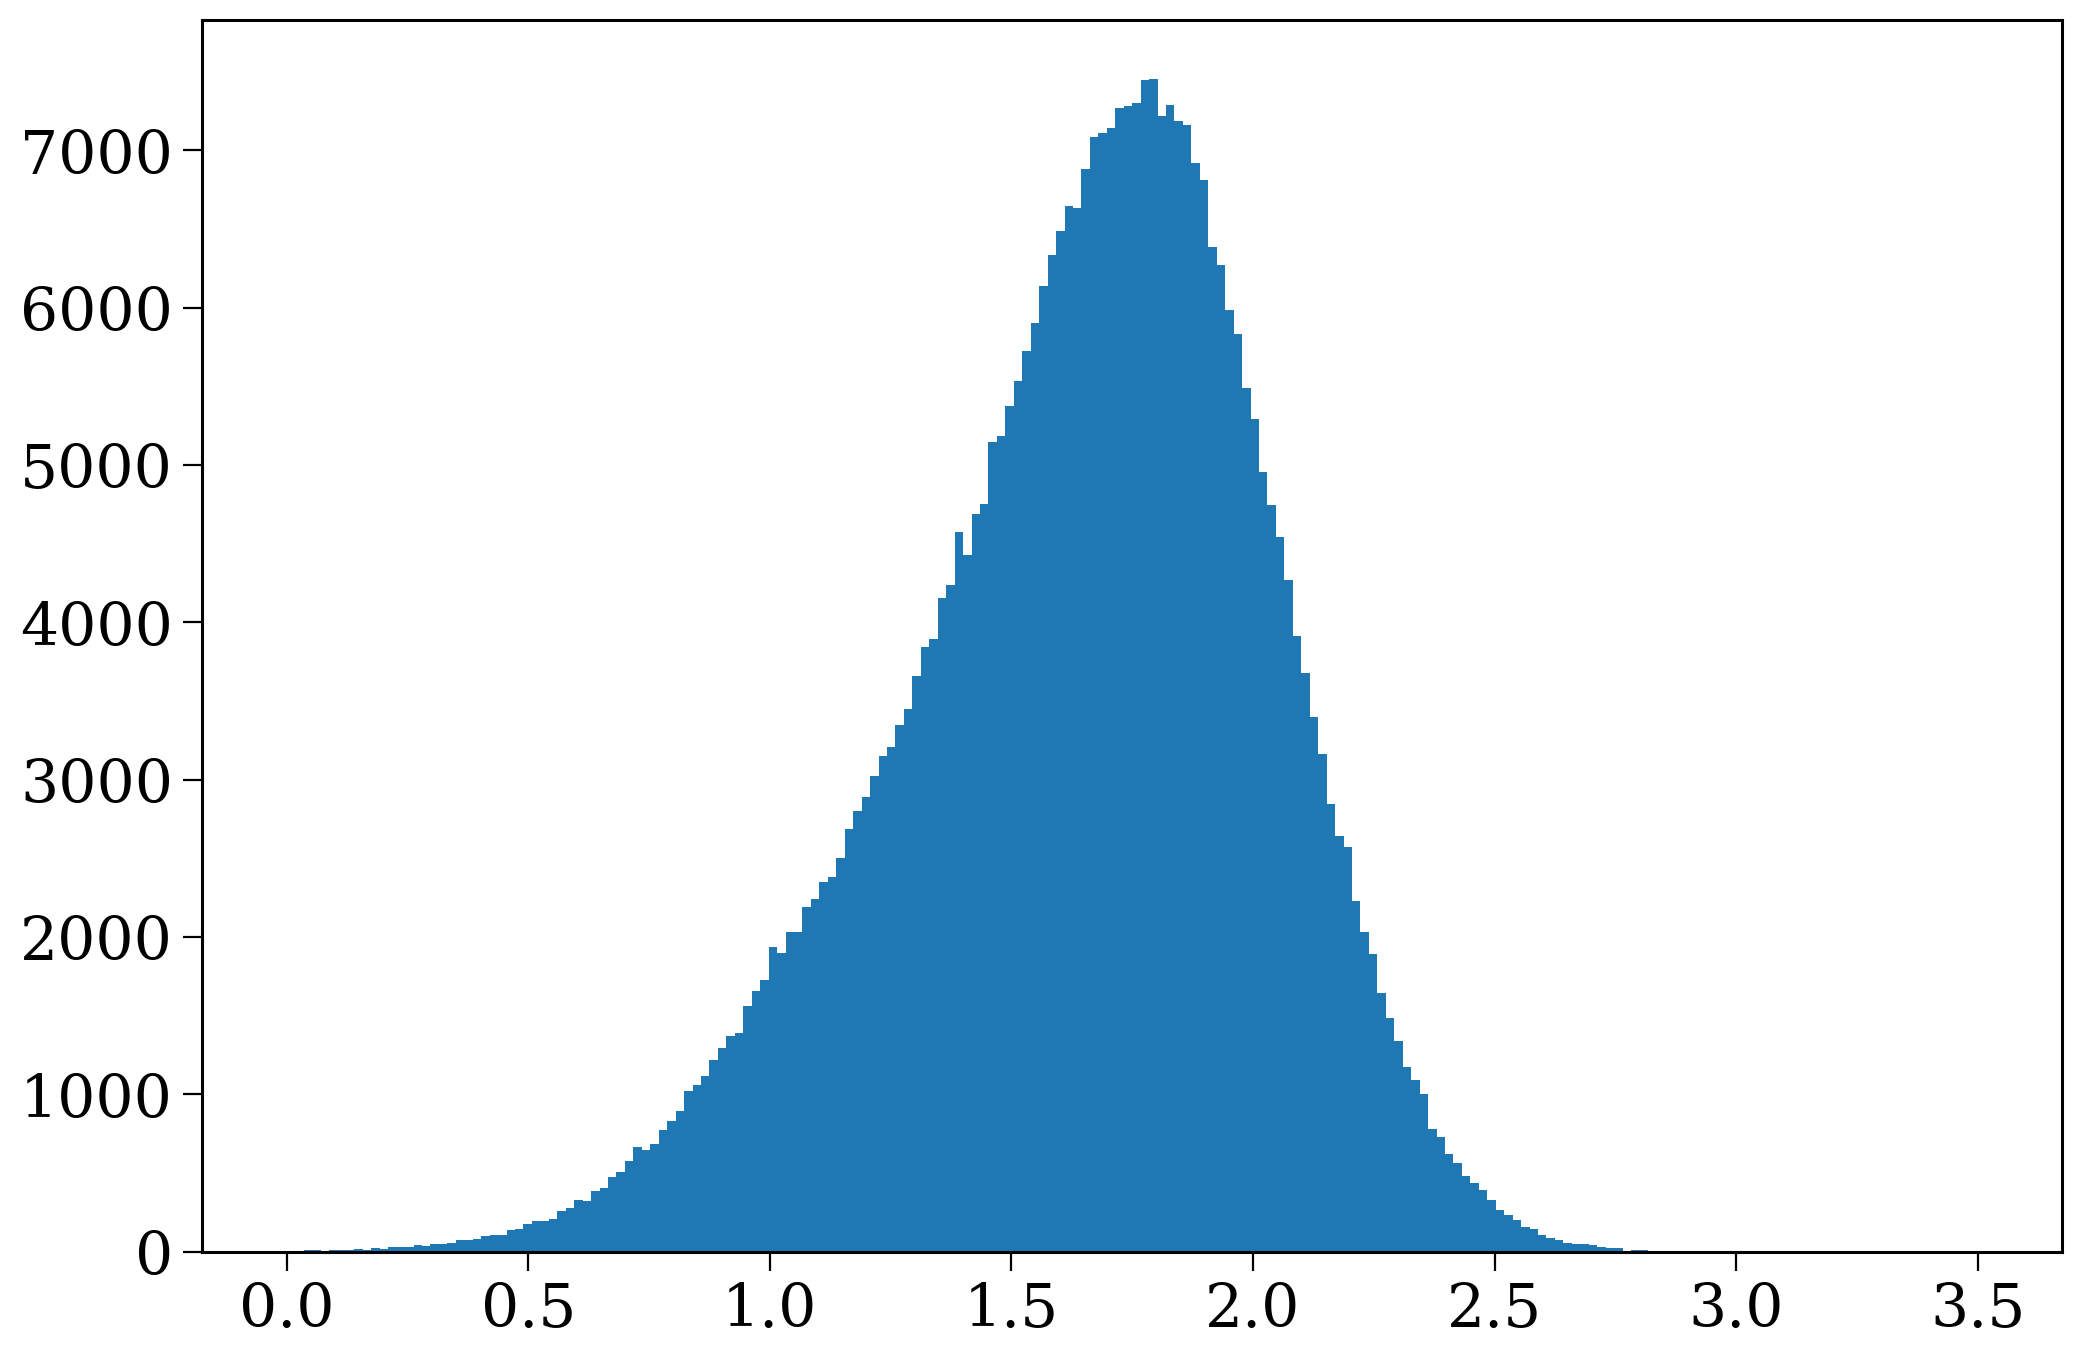

In [94]:
plt.bar(bin_centres, plotly_histograms[0][-1], width=bin_widths)

In [10]:
fid_data = {
    "dist": np.concatenate(sn_dists),
    "time": np.concatenate(sn_times),
    "type": np.concatenate([[i] * len(sn_dists[i]) for i, label in zip(range(len(sn_dists)), plotting.labels)])
}

In [481]:
pd.DataFrame(fid_data).to_hdf("dists_times.h5", key="fiducial")

In [498]:
fid_data["type"]

array([0, 0, 0, ..., 3, 3, 3])

In [11]:
with h5.File("dists_times.h5", "w") as f:
    g = f.create_group("fiducial")
    g.create_dataset("dist", data=fid_data["dist"])
    g.create_dataset("time", data=fid_data["time"])
    g.create_dataset("type", data=fid_data["type"])

In [490]:
pd.read_hdf("dists_times.h5", key="fiducial")

dist        time                type
0       3.923895    5.002936      Merger Product
1      62.878171   49.670533      Merger Product
2      16.753811    6.522662      Merger Product
3      10.437509   11.456510      Merger Product
4      65.745107  221.137362      Merger Product
...          ...         ...                 ...
51822   4.631329    4.656781  Effectively Single
51823   8.469214    4.656783  Effectively Single
51824  21.283588   17.697613  Effectively Single
51825   4.053506    4.138112  Effectively Single
51826  15.846998    4.150197  Effectively Single

[51827 rows x 3 columns]